Beer3 Positive Results
============

1. LDA
-------

In [1]:
from lda_for_fragments import run_lda, plot_lda_fragments
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import sys

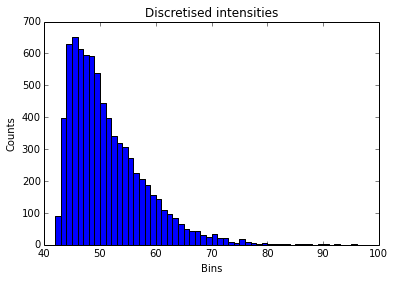

Data shape (856, 1404)
Fitting model...
DONE!
Writing topics to results/beer3_pos/beer3_pos_fragments_topics.csv
Writing fragments x topics to results/beer3_pos/beer3_pos_fragments_all.csv
Writing topic docs to results/beer3_pos/beer3_pos_fragments_docs.csv


In [2]:
n_topics = 50
n_samples = 500
fragments_data, fragments_model, fragments_topicdf, fragments_docdf = run_lda('beer3_pos', 
                                                                              'fragments', 
                                                                              'input/Beer_3_T10_POS_fragments.csv', 
                                                                              n_topics, n_samples)

LDA results can be found in the three files generated above.

2. PCA
-------

Here we use PCA to project the topics to lower-dimensional space for visualisation purposes. First ensure the variables are scaled.

In [3]:
from sklearn import preprocessing
# df = fragments_docdf # topics x documents matrix
df = fragments_topicdf.transpose() # topics x words matrix
print df.shape

# normalise and scale the variables
scaled_mat = preprocessing.scale(df, axis=0)
# print scaled_mat.mean(axis=0)
# print scaled_mat.std(axis=0)

(50, 1404)


Then run PCA

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_mat)
X_r = pca.transform(scaled_mat)

But the explained variances by the first two principal components are too low ..??

In [5]:
print X_r.shape
print('explained variance by the first two principal components: %s' % str(pca.explained_variance_ratio_))

(50, 2)
explained variance by the first two principal components: [ 0.03526296  0.0344514 ]


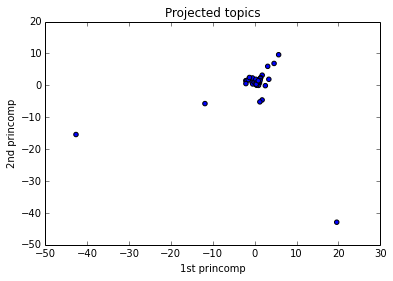

In [6]:
plt.figure()
plt.scatter(X_r[:, 0], X_r[:, 1])
plt.xlabel('1st princomp')
plt.ylabel('2nd princomp')
plt.title('Projected topics')

3. Network
------------

We can try to put the topics on a network too.

In [7]:
# df = fragments_topicdf.transpose() # topic x terms matrix
df = fragments_docdf.transpose() # documents x topic matrix
print df.shape 

(856, 50)


(856, 856)


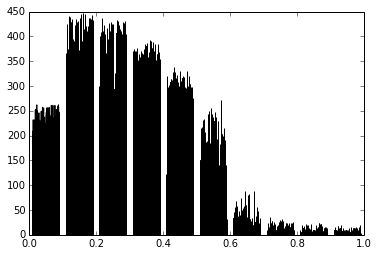

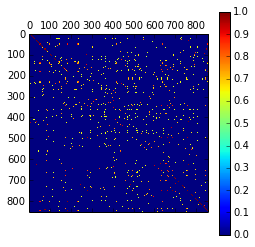

In [8]:
# create adjacency matrix A

# first compute euclidean distance between the topics
from scipy.spatial.distance import cdist
A = cdist(df, df, 'euclidean')
print A.shape

# crudely convert to similarities
maxval = A.max()
A = 1-(A/maxval)
plt.hist(A)

# set a threshold of 0.6 for the similarity values for the network graph
for i in xrange(A.shape[0]):
    for j in xrange(A.shape[1]):
        if A[i, j] < 0.60:
            A[i, j] = 0

plt.matshow(A)
plt.colorbar()
plt.show()

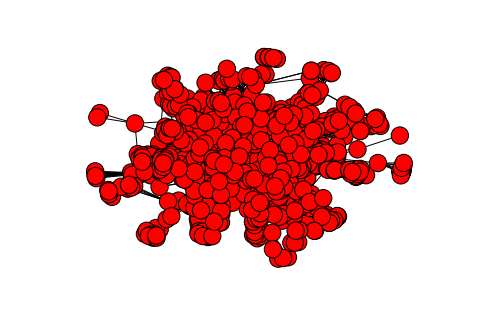

In [9]:
import networkx as nx
from networkx.readwrite import json_graph
dt = [('len', float)]
A = A.view(dt)
G = nx.from_numpy_matrix(A)
pos = nx.spring_layout(G)
nx.draw(G, pos, font_size=8)

Impossible to conclude anything from the graph above ... need to export this out to cytoscape or other tools to zoom in the details.

4. Document-Topics Distribution
----------------------------------

Visualise the document-topic distributions

(856, 50)


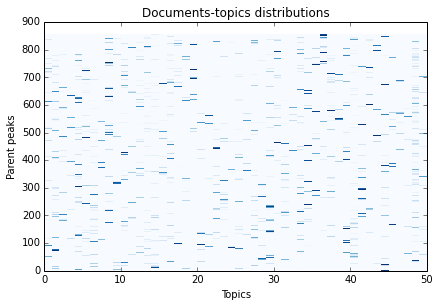

In [10]:
df = fragments_docdf.transpose()
print df.shape
plt.pcolor(df, norm=None, cmap='Blues')
plt.tight_layout()
plt.xlabel('Topics')
plt.ylabel('Parent peaks')
plt.title('Documents-topics distributions')
plt.show()

5. Shared Fragments within a Topic
--------------------------------------

For every topic, we visualise the words shared in common across the parent peaks.

In [11]:
ms1_file = 'input/Beer_3_T10_POS_ms1.csv'
ms2_file = 'input/Beer_3_T10_POS_ms2.csv'
ms1 = pd.read_csv(ms1_file, index_col=0)
ms2 = pd.read_csv(ms2_file, index_col=0)

Topic 0

Parent peaks

     peakID	mz		rt		int		prob
1    1674 	382.22217	231.552		6.558e+05	0.992
2    2630 	369.20378	248.128		5.472e+06	0.968
3    620  	457.22196	208.697		5.832e+05	0.939
4    1376 	354.19100	243.181		9.973e+05	0.925
5    916  	439.12830	208.697		2.042e+06	0.902
6    953  	489.22746	228.159		4.075e+05	0.638
7    3935 	135.11680	268.114		3.826e+05	0.635
8    9638 	318.16867	730.481		2.863e+05	0.625
9    1161 	336.21679	208.697		6.586e+05	0.538
10   3885 	105.06974	241.536		7.094e+05	0.486

Fragments

1    fragment_91.05413 (0.205)
 peakID  MSnParentPeakID  mz         rt       intensity   
 12941    620             91.054113  208.577  11714.164062
 13201    953             91.054105  227.060   9398.865234
 13315   1161             91.054099  206.358   9922.904297
 13441   1376             91.054248  240.715  32612.078125
 13691   1674             91.054179  229.059  18043.933594
 14680   2630             91.054137  237.411  10435.964844
 15834   3935             91.05

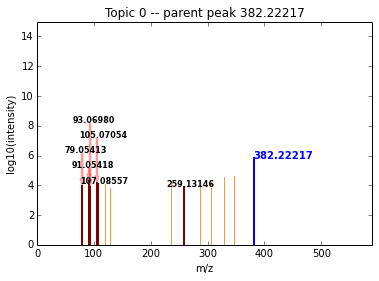

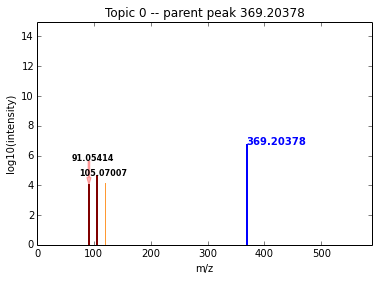

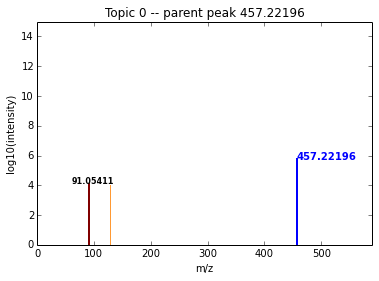

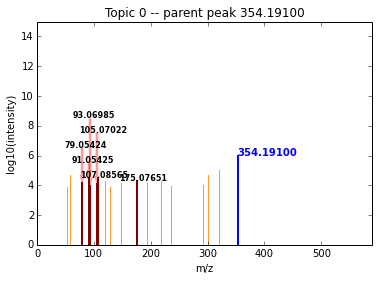

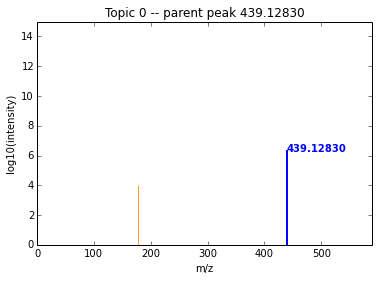

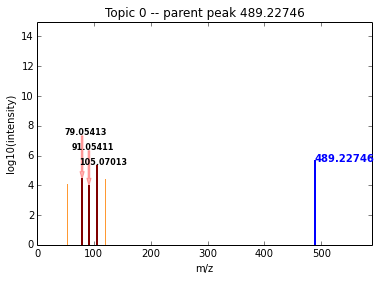

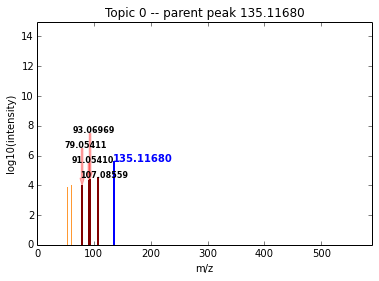

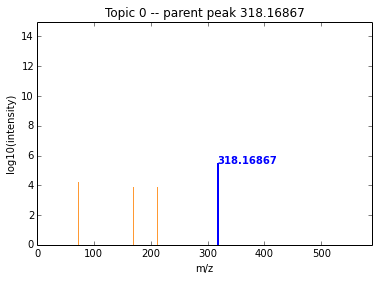

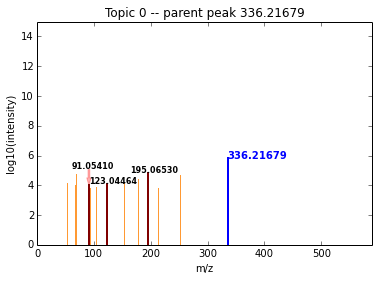

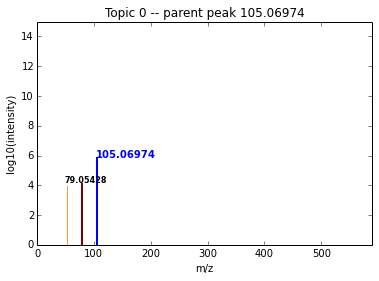

Topic 1

Parent peaks

     peakID	mz		rt		int		prob
1    9114 	527.15870	668.607		7.643e+06	0.978
2    12383	131.12912	1037.050		1.068e+07	0.976
3    12388	131.12913	850.604		1.165e+07	0.965
4    12389	131.12915	872.604		1.176e+07	0.964
5    12381	131.12913	630.413		8.863e+06	0.961
6    12387	131.12912	825.457		1.448e+07	0.936
7    8889 	90.05496	630.413		7.314e+06	0.909
8    12379	131.12913	775.167		1.532e+07	0.783
9    6134 	73.06479	468.549		1.047e+06	0.779
10   7766 	132.10192	380.610		3.734e+06	0.671

Fragments

1    fragment_72.08072 (0.571)
 peakID  MSnParentPeakID  mz        rt        intensity 
 21163    7766            72.08077   353.808   124357.80
 22802    8889            72.08066   624.880    20298.17
 25157   12379            72.08067   775.924  2120692.00
 25167   12381            72.08066   604.201   318663.70
 25171   12383            72.08066  1039.240  1538342.00
 25180   12387            72.08066   821.891  2081806.00
 25181   12388            72.08069   853.050  

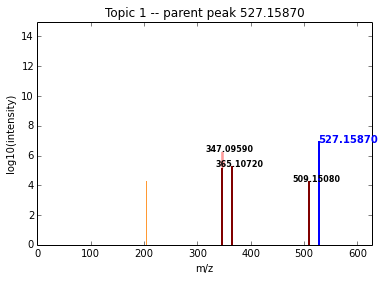

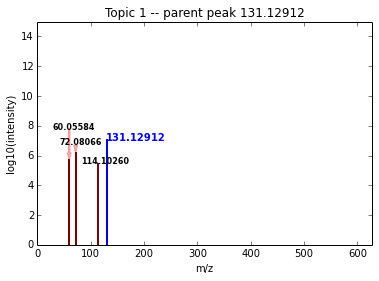

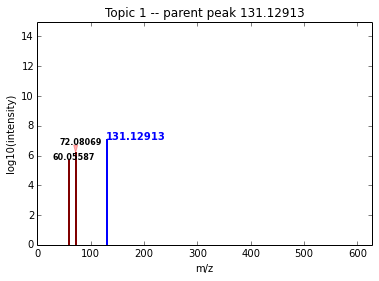

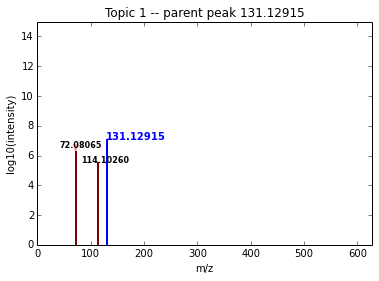

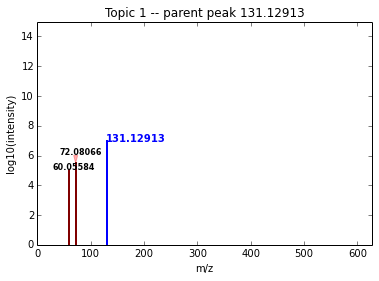

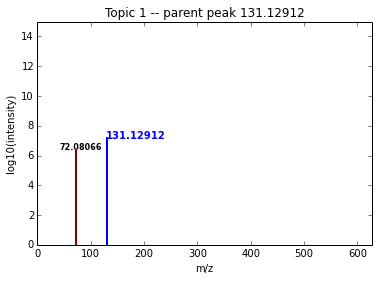

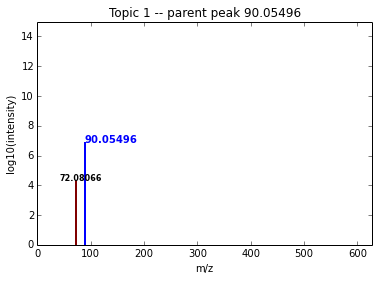

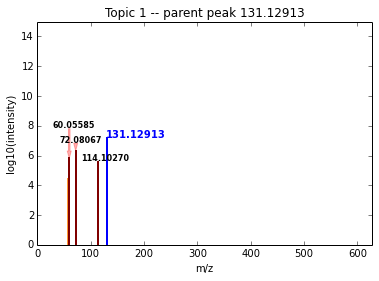

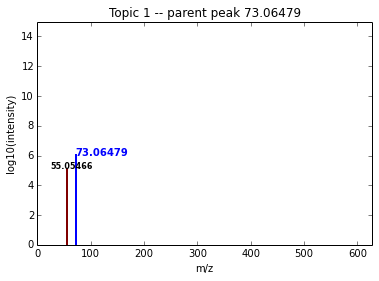

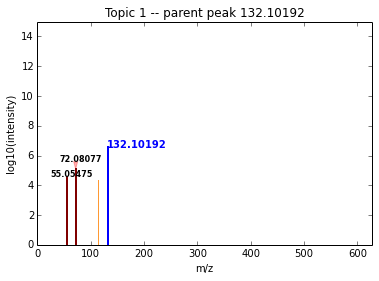

Topic 2

Parent peaks

     peakID	mz		rt		int		prob
1    2098 	293.13821	205.410		3.040e+06	0.897
2    1370 	319.15411	231.552		4.909e+05	0.854
3    9261 	175.02367	705.821		2.527e+05	0.672
4    2435 	265.10696	228.159		4.362e+05	0.648
5    6055 	342.15476	304.187		3.516e+05	0.626
6    6380 	198.11248	387.071		3.185e+06	0.587
7    6791 	221.09196	513.775		7.504e+05	0.541
8    7115 	166.08624	499.470		1.505e+07	0.501
9    6058 	342.15481	332.055		4.321e+05	0.494
10   3323 	363.21632	208.697		5.793e+07	0.483

Fragments

1    fragment_120.08041 (0.192)
 peakID  MSnParentPeakID  mz          rt       intensity     
 13948   2098             120.080408  218.204     9115.150391
 18937   6380             120.080600  386.121    57276.300000
 20216   7115             120.080300  498.171  3831986.000000
2    fragment_83.01292 (0.066)
 peakID  MSnParentPeakID  mz         rt       intensity   
 13428   1370             83.012986  229.618  25158.416016
 13945   2098             83.012978  218.204  

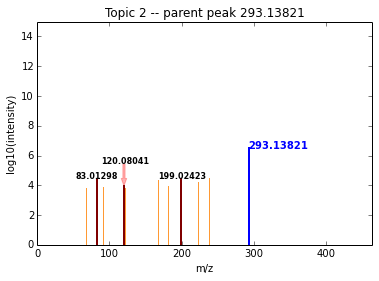

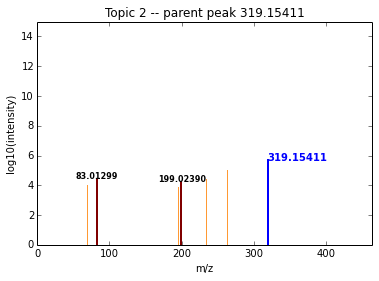

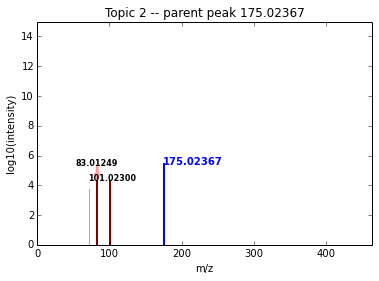

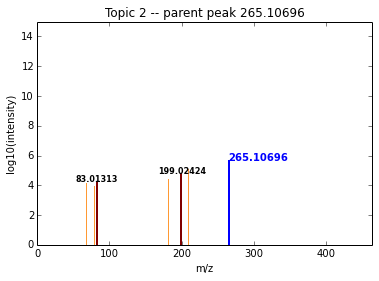

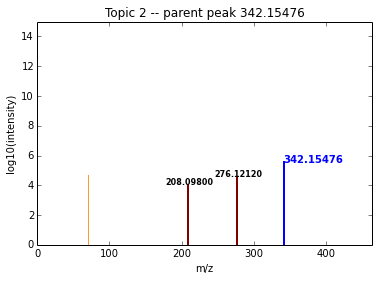

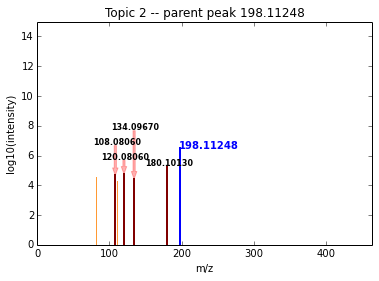

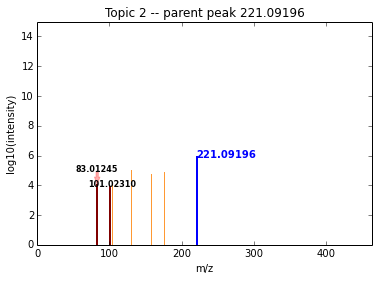

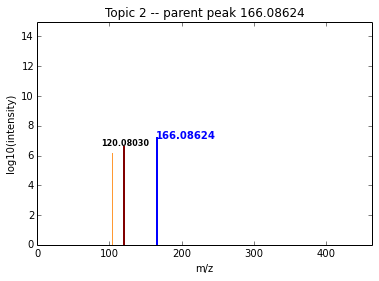

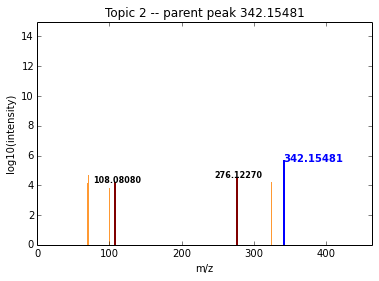

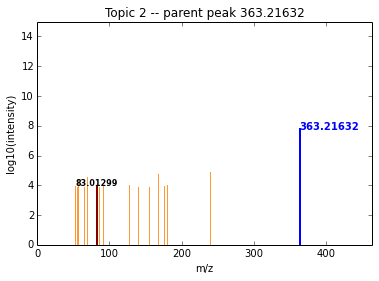

Topic 3

Parent peaks

     peakID	mz		rt		int		prob
1    4521 	222.11246	286.004		2.699e+06	0.774
2    5777 	310.12846	372.653		7.748e+05	0.771
3    6593 	490.19215	452.947		5.970e+05	0.691
4    5002 	245.16483	409.811		1.280e+06	0.644
5    6592 	490.19202	491.538		2.827e+06	0.628
6    3995 	277.11822	290.983		7.819e+05	0.588
7    6387 	240.12291	382.238		7.140e+05	0.543
8    1323 	292.19063	221.946		5.747e+05	0.486
9    5688 	169.09715	387.071		1.937e+06	0.461
10   6041 	237.08692	468.549		2.044e+06	0.280

Fragments

1    fragment_120.08041 (0.077)
 peakID  MSnParentPeakID  mz          rt       intensity    
 13377   1323             120.080319  220.990  169138.390625
 15853   3995             120.080354  291.669  236747.234375
 16410   4521             120.080296  286.324   11386.847656
 17991   5777             120.080462  370.349   43705.054688
 18250   6041             120.080438  460.133   23409.500000
 18984   6387             120.080500  375.712   61550.400000
 19285   6592   

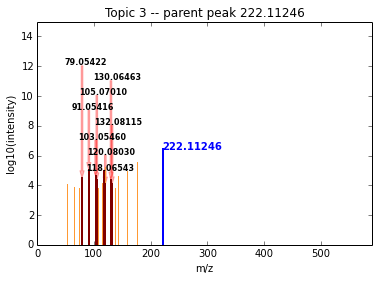

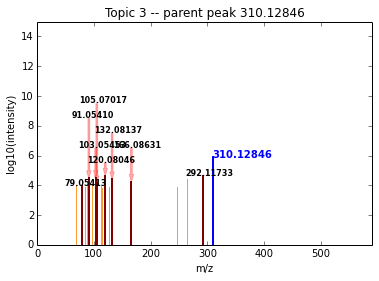

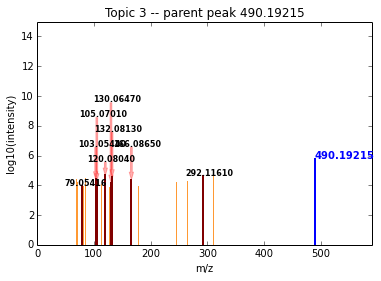

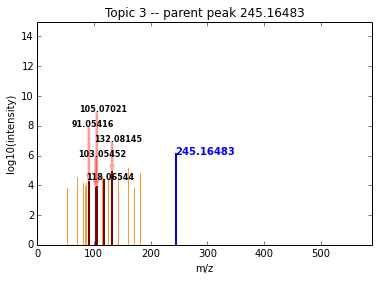

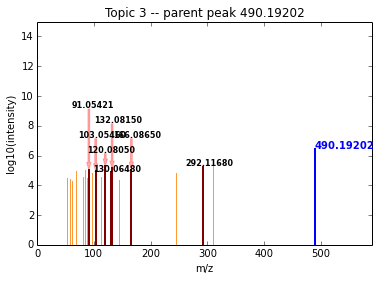

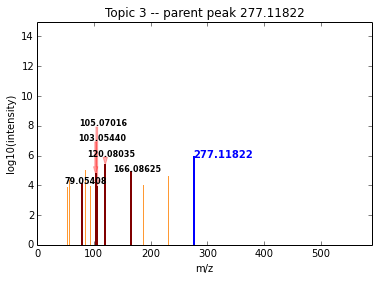

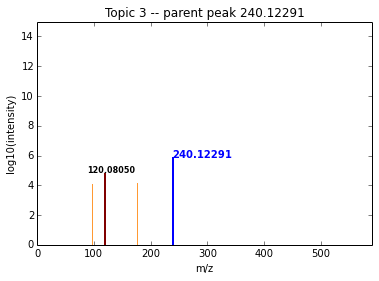

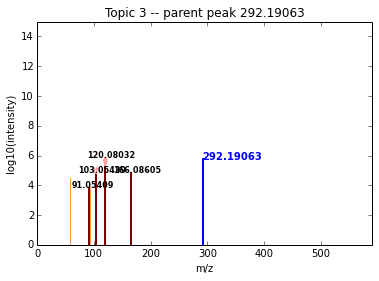

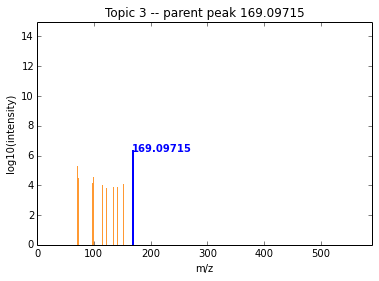

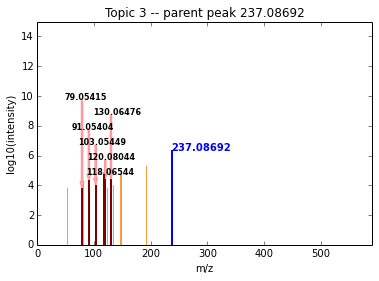

Topic 4

Parent peaks

     peakID	mz		rt		int		prob
1    6345 	259.09236	482.456		2.661e+07	0.989
2    7038 	130.04989	482.456		1.954e+08	0.965
3    8444 	205.06826	614.695		6.735e+07	0.958
4    693  	371.16205	207.039		5.925e+05	0.904
5    6895 	158.08120	369.407		4.093e+06	0.903
6    6221 	355.16116	435.357		3.710e+06	0.877
7    1430 	301.21216	238.237		1.911e+06	0.862
8    5534 	453.19811	428.854		7.807e+05	0.831
9    6342 	227.10254	428.854		2.783e+07	0.826
10   5720 	324.15534	348.358		1.048e+06	0.799

Fragments

1    fragment_84.04422 (0.270)
 peakID  MSnParentPeakID  mz         rt       intensity      
 13498   1430             84.044227  234.193    172442.750000
 17325   5534             84.044171  438.541    140751.546875
 17801   5720             84.044750  345.788    146289.421875
 18584   6221             84.044770  439.076    704350.600000
 18788   6342             84.044780  432.388   3817094.000000
 18804   6345             84.044170  478.187   4347238.000000
 19706   6

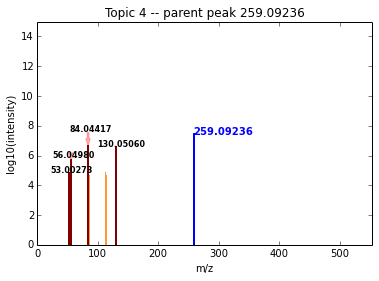

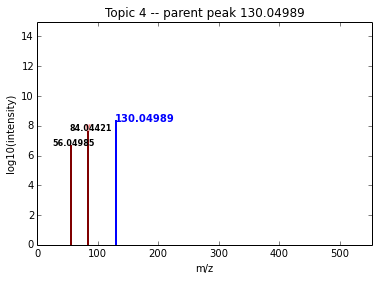

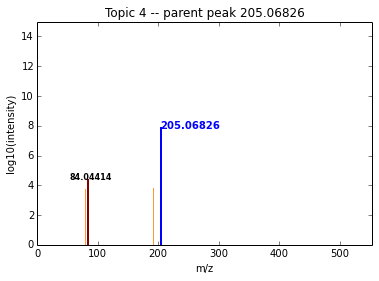

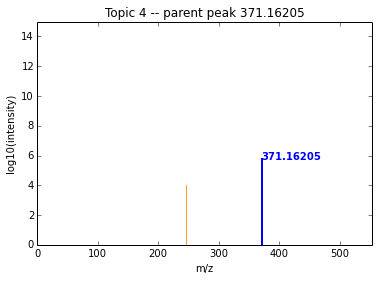

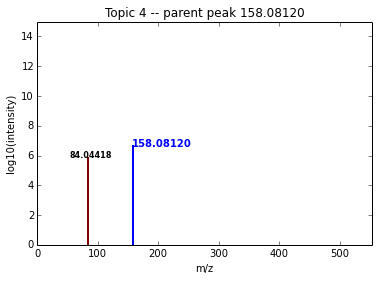

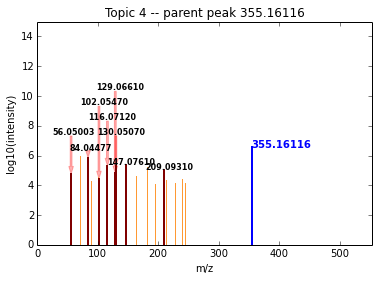

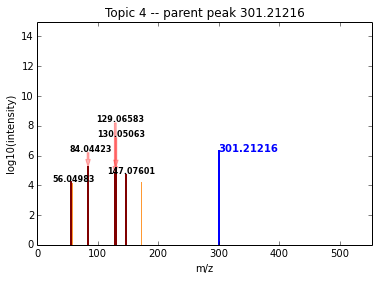

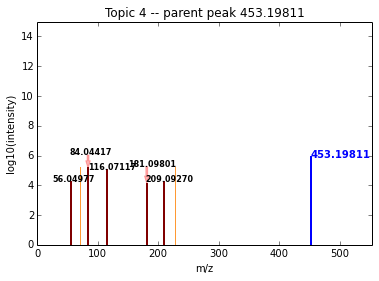

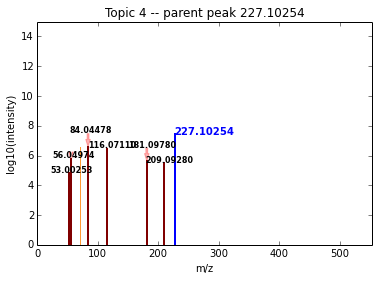

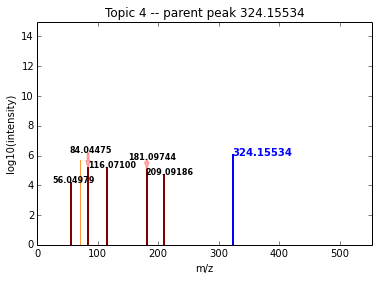

Topic 5

Parent peaks

     peakID	mz		rt		int		prob
1    4087 	184.06051	362.957		4.007e+05	0.969
2    2338 	264.14408	241.536		1.020e+06	0.946
3    7144 	393.13652	515.409		5.160e+06	0.918
4    4086 	184.06046	266.414		7.590e+06	0.822
5    6667 	110.06007	380.610		8.243e+06	0.632
6    6796 	255.13381	505.911		2.100e+06	0.511
7    4305 	149.02337	239.890		1.390e+06	0.486
8    676  	513.18886	210.369		6.764e+05	0.474
9    10182	277.16578	749.460		6.976e+06	0.434
10   6243 	153.06585	425.682		8.899e+05	0.390

Fragments

1    fragment_65.03877 (0.518)
 peakID  MSnParentPeakID  mz         rt       intensity    
 15921    4086            65.038898  276.574   80073.507812
 15926    4087            65.038855  364.169   19398.679688
 16135    4305            65.038877  232.963   24829.335938
 19370    6667            65.038810  392.215   38860.580000
 23850   10182            65.038780  761.477  129998.800000
2    fragment_148.03977 (0.043)
 peakID  MSnParentPeakID  mz          rt       inten

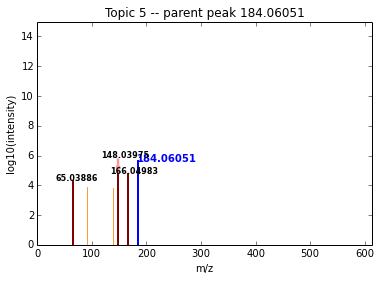

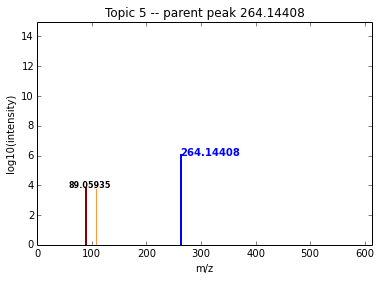

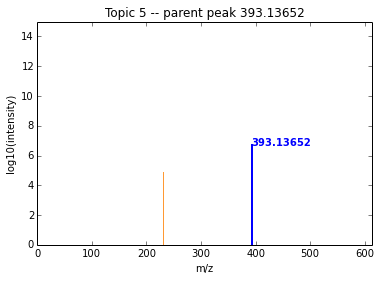

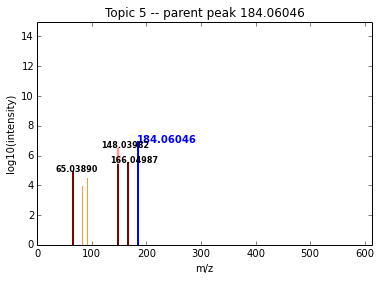

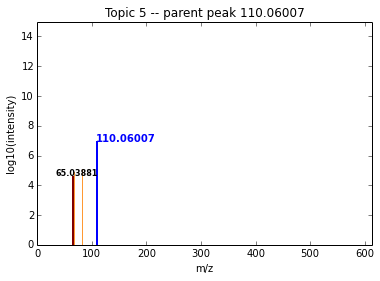

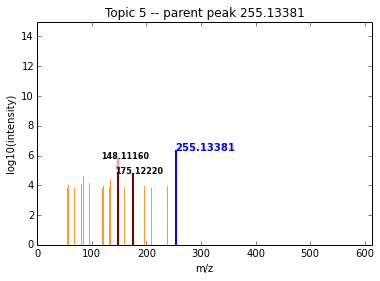

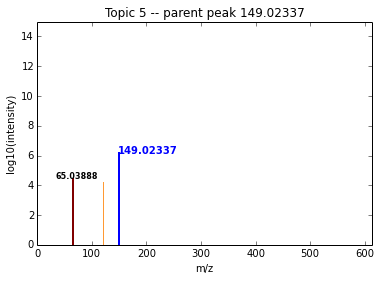

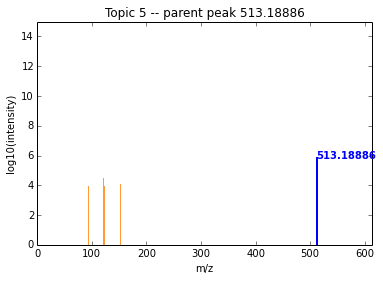

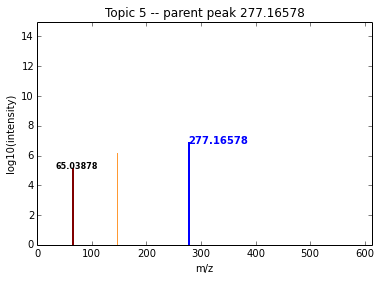

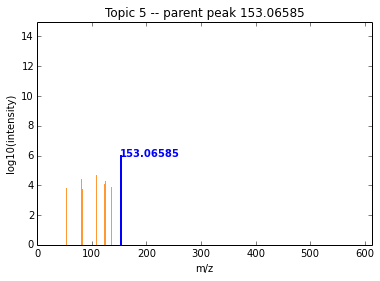

Topic 6

Parent peaks

     peakID	mz		rt		int		prob
1    4732 	196.13323	274.685		2.531e+06	0.890
2    7164 	184.06045	518.554		1.257e+06	0.794
3    6251 	196.09686	330.420		9.104e+05	0.742
4    6069 	150.09138	452.947		1.461e+07	0.725
5    6457 	344.09753	491.538		7.625e+05	0.677
6    5891 	140.07064	412.921		3.952e+06	0.677
7    5893 	140.07060	353.265		4.146e+05	0.665
8    6388 	240.12294	302.542		3.507e+05	0.583
9    7770 	138.05488	546.349		4.148e+08	0.555
10   6440 	361.12404	493.109		1.345e+06	0.525

Fragments

1    fragment_80.04949 (0.268)
 peakID  MSnParentPeakID  mz         rt       intensity    
 16549   4732             80.049631  284.910   10717.230469
 18044   5891             80.049711  412.434   25216.070312
 18397   6069             80.049570  458.052  188599.000000
 19022   6440             80.049470  489.215  205498.800000
 19081   6457             80.049420  489.766  223665.500000
 20309   7164             80.049470  517.580    8828.572000
2    fragment_108.04426 

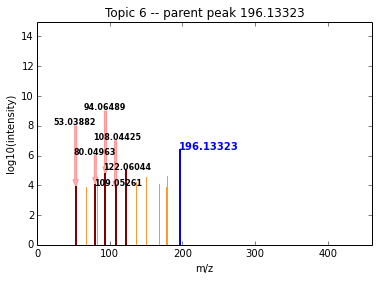

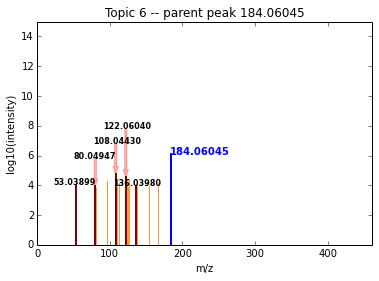

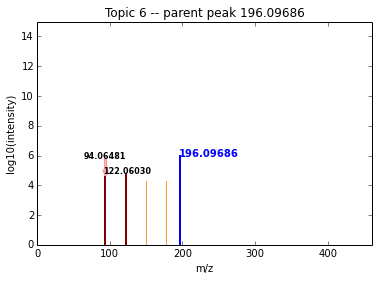

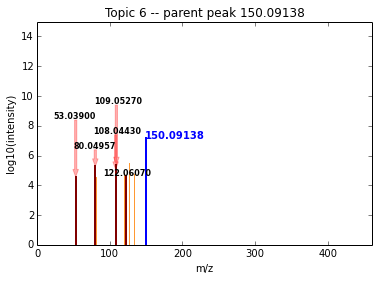

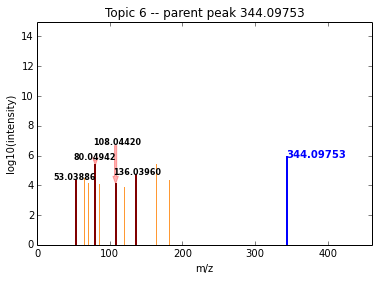

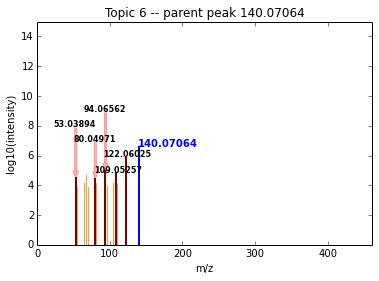

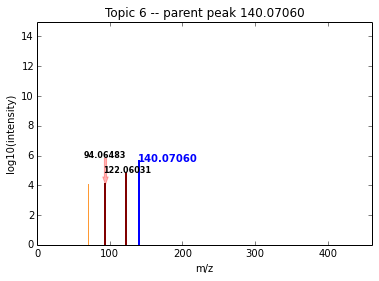

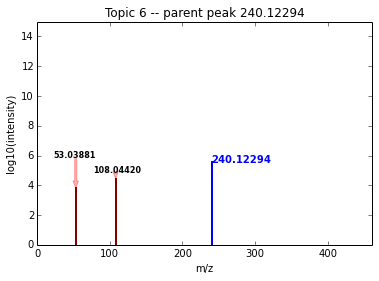

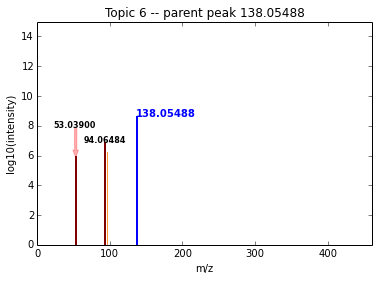

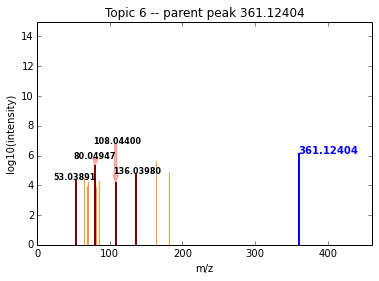

Topic 7

Parent peaks

     peakID	mz		rt		int		prob
1    6002 	201.05223	433.724		1.778e+06	0.960
2    7815 	239.15012	556.072		7.194e+05	0.893
3    3768 	236.11278	241.536		1.771e+07	0.843
4    4052 	234.13352	302.542		2.976e+05	0.771
5    8003 	239.15006	589.081		1.883e+06	0.683
6    10793	260.14908	955.832		3.927e+05	0.640
7    7298 	248.06100	543.289		1.111e+06	0.639
8    2107 	353.19594	218.622		3.729e+05	0.606
9    6001 	201.05226	460.808		3.224e+06	0.590
10   8632 	335.09473	628.893		6.897e+05	0.511

Fragments

1    fragment_98.98387 (0.094)
 peakID  MSnParentPeakID  mz         rt       intensity    
 18210   6001             98.983822  461.080  1198164.25000
 18217   6002             98.983791  426.729   367432.90625
 22454   8632             98.983810  625.574    41378.82000
2    fragment_62.92941 (0.075)
 peakID  MSnParentPeakID  mz         rt       intensity   
 15784   3768             62.929364  251.757   6216.884766
 15897   4052             62.929384  312.466  11522.803

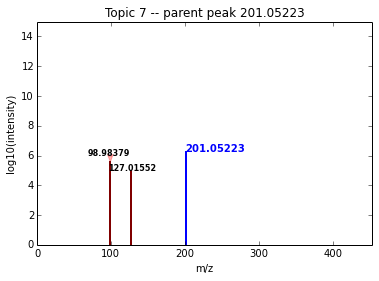

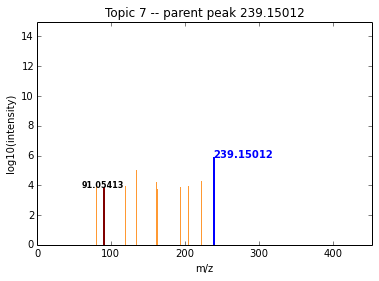

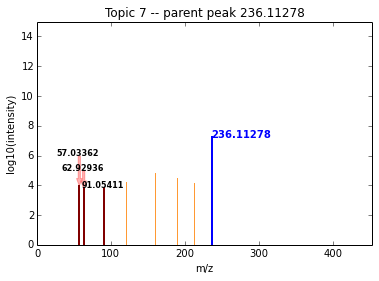

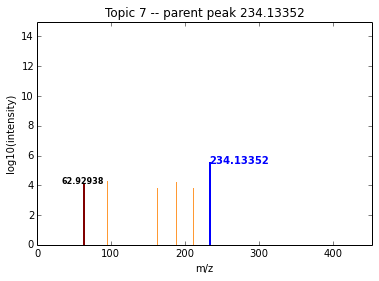

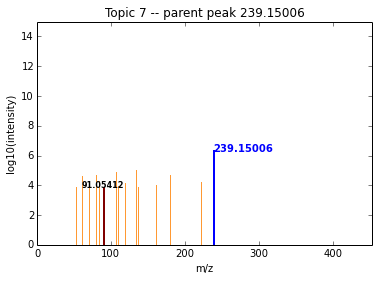

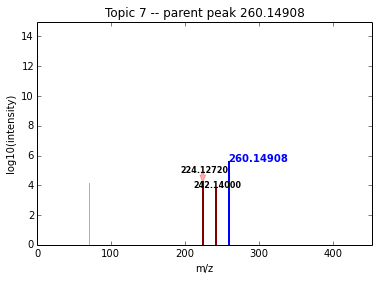

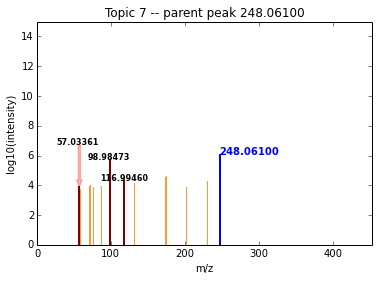

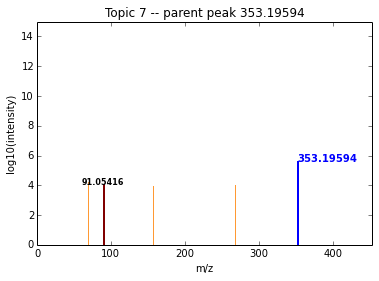

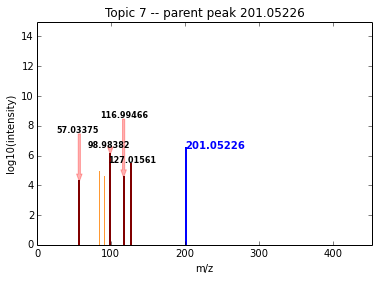

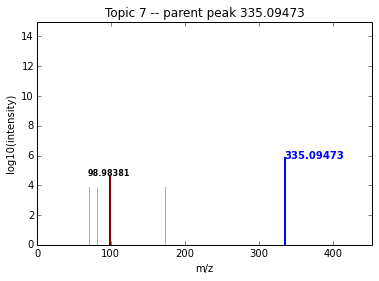

Topic 8

Parent peaks

     peakID	mz		rt		int		prob
1    6051 	320.13405	460.808		4.898e+06	0.988
2    9338 	360.14997	705.057		3.450e+05	0.986
3    7211 	432.20766	513.775		1.162e+06	0.985
4    9029 	829.28123	684.580		1.110e+06	0.983
5    9567 	324.12893	705.821		8.170e+05	0.976
6    9560 	168.06552	670.770		4.925e+05	0.963
7    7413 	270.11809	526.543		9.980e+05	0.937
8    9641 	342.13954	714.479		1.633e+06	0.925
9    9443 	325.11289	668.607		1.375e+07	0.925
10   5718 	289.06827	437.038		7.473e+06	0.914

Fragments

1    fragment_127.0387 (0.123)
 peakID  MSnParentPeakID  mz          rt       intensity    
 17796   5718             127.038906  438.936   39004.320312
 18287   6051             127.038700  455.346    8795.021000
 20519   7211             127.038600  506.953   33890.430000
 20723   7413             127.038800  522.996   12734.020000
 22971   9029             127.038500  676.640   82110.690000
 23166   9338             127.038900  704.488   13217.630000
 23219   9443    

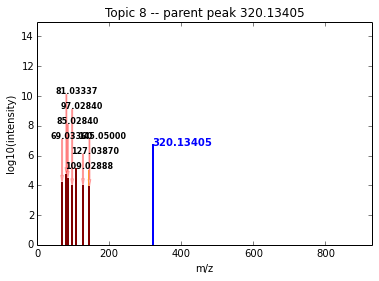

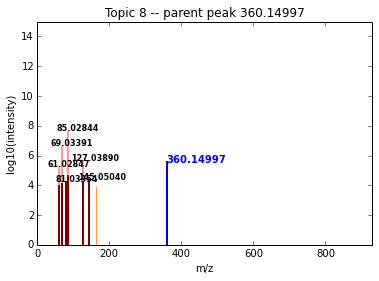

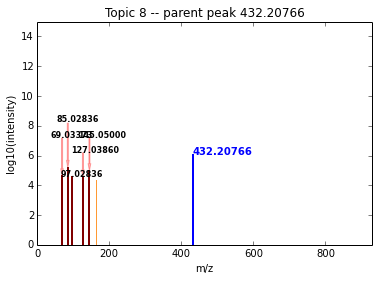

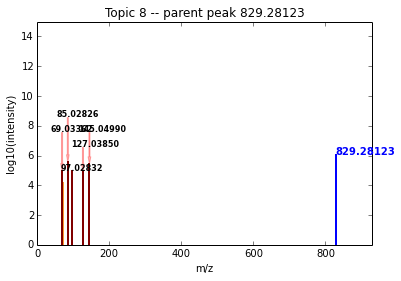

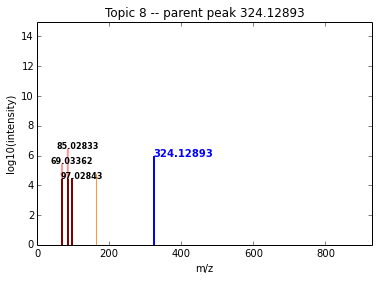

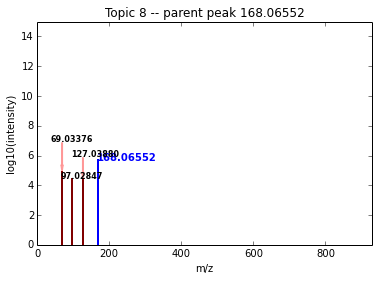

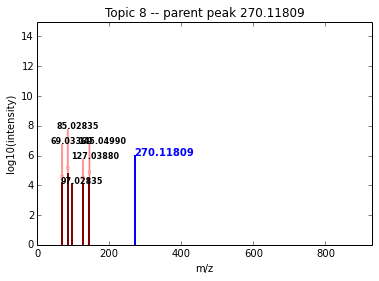

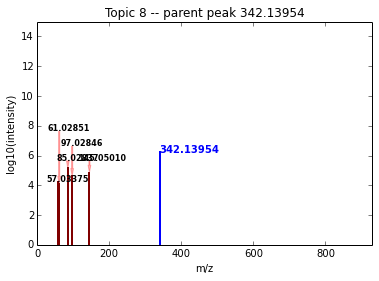

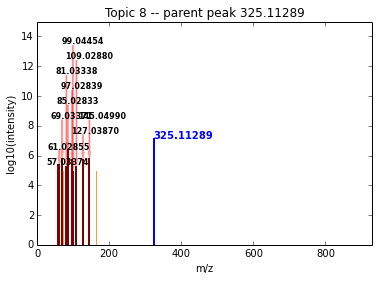

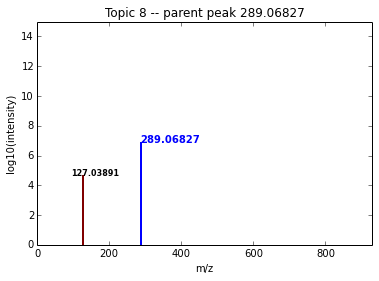

Topic 9

Parent peaks

     peakID	mz		rt		int		prob
1    10527	212.09507	649.151		3.917e+06	0.902
2    7778 	212.09513	557.680		7.742e+06	0.901
3    10525	212.09509	619.436		5.748e+06	0.847
4    7780 	212.09512	515.409		5.867e+06	0.841
5    10526	212.09505	593.907		5.924e+06	0.759
6    6377 	198.11249	459.215		1.452e+06	0.752
7    7758 	476.13764	564.091		9.748e+05	0.648
8    7779 	212.09533	456.158		3.811e+06	0.586
9    1663 	333.20596	207.039		4.866e+06	0.530
10   6357 	97.02843	466.972		1.099e+06	0.444

Fragments

1    fragment_53.0026 (0.220)
 peakID  MSnParentPeakID  mz         rt       intensity   
 13683    1663            53.002715  202.788  35206.347656
 18880    6357            53.002570  463.395   6156.900000
 21221    7778            53.002700  553.205  31277.580000
 21232    7779            53.002690  456.884  21012.600000
 21256    7780            53.002700  522.024  19416.670000
 24483   10525            53.002700  616.584  25186.860000
 24496   10526            53.0027

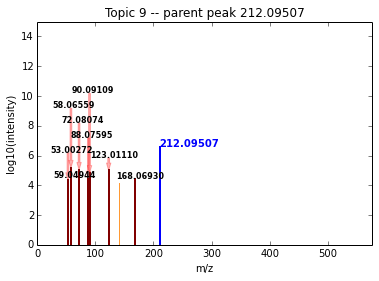

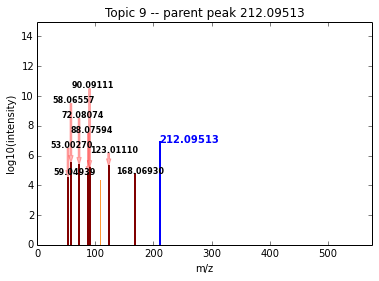

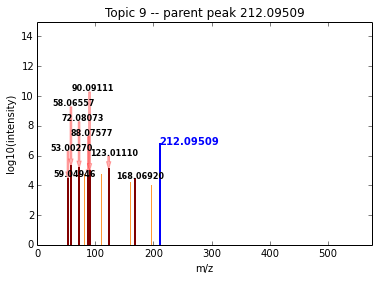

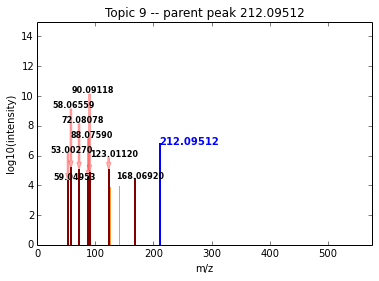

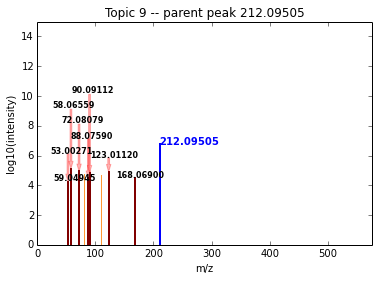

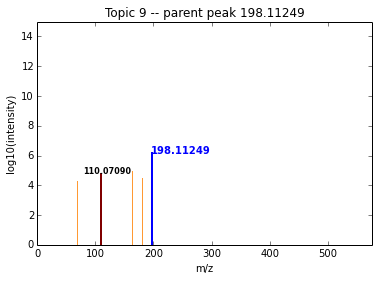

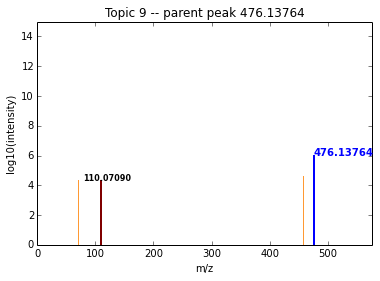

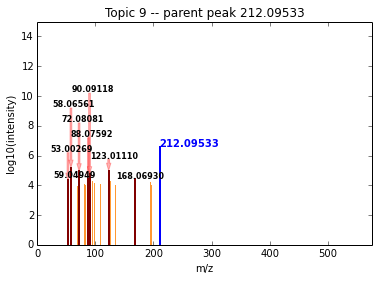

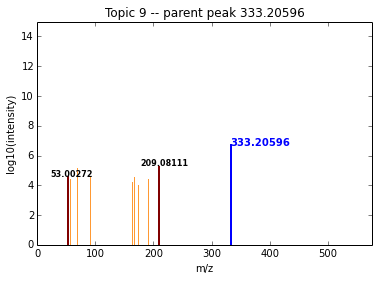

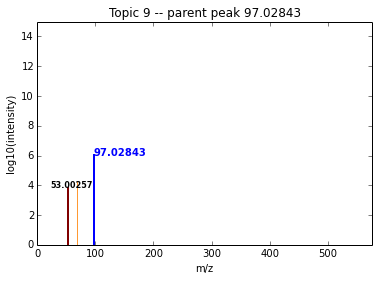

Topic 10

Parent peaks

     peakID	mz		rt		int		prob
1    6974 	99.04405	443.301		6.354e+05	0.918
2    5101 	86.06001	427.263		7.119e+05	0.909
3    3749 	250.05156	359.749		5.252e+05	0.906
4    9934 	97.02844	699.829		1.329e+06	0.884
5    10460	111.04405	593.907		3.439e+06	0.690
6    4375 	220.11798	374.230		2.018e+06	0.688
7    6546 	247.09232	502.727		9.222e+05	0.654
8    1354 	654.33223	223.606		1.381e+06	0.649
9    1119 	371.31567	226.502		3.998e+05	0.636
10   3063 	404.20673	241.536		1.337e+07	0.607

Fragments

1    fragment_69.03368 (0.351)
 peakID  MSnParentPeakID  mz         rt       intensity    
 15110   3063             69.033702  250.062  224844.812500
 16979   5101             69.033740  421.519   20467.970703
 19253   6546             69.033720  503.359   19991.330000
 19826   6974             69.033710  445.777   70918.280000
 23600   9934             69.033770  708.786   10314.070000
2    fragment_55.05468 (0.145)
 peakID  MSnParentPeakID  mz         rt       intensity

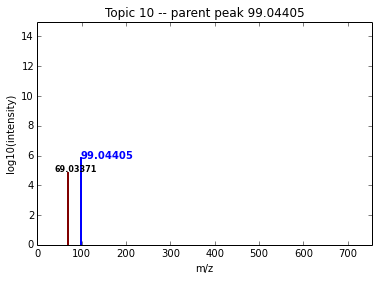

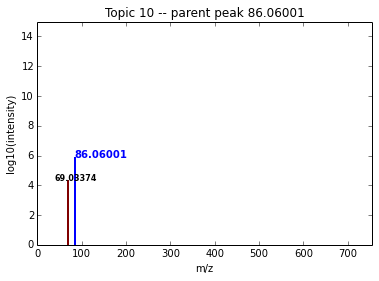

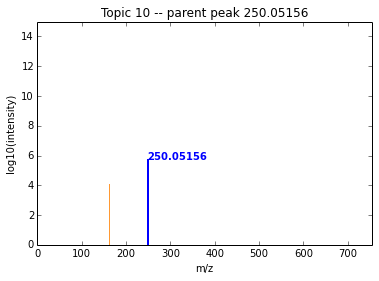

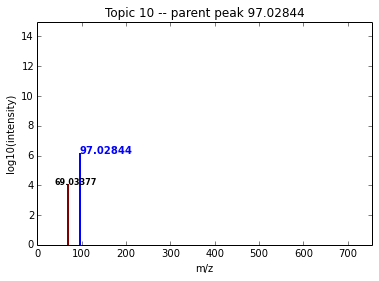

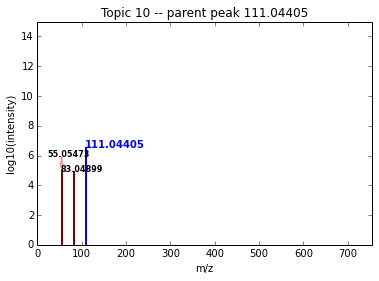

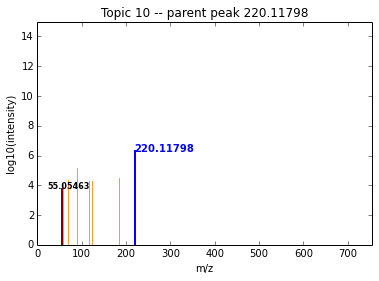

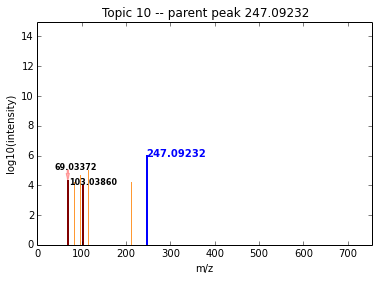

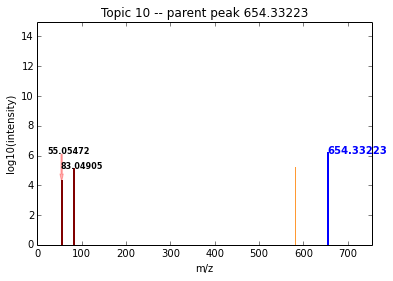

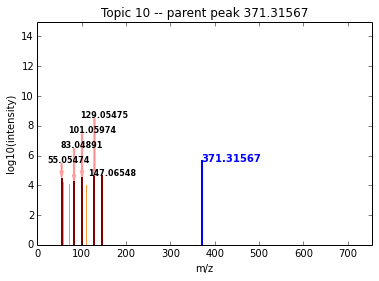

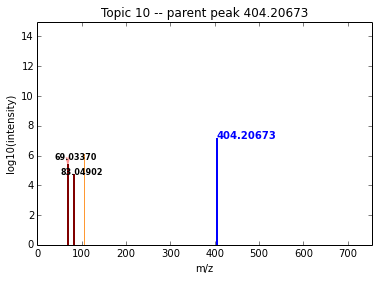

Topic 11

Parent peaks

     peakID	mz		rt		int		prob
1    3518 	515.41319	279.485		5.549e+05	0.657
2    3517 	515.41312	223.606		1.255e+07	0.642
3    10438	130.09752	685.551		4.971e+06	0.593
4    9795 	294.16420	756.510		8.001e+05	0.541
5    9790 	184.07331	617.886		2.333e+07	0.509
6    8318 	323.17141	565.722		1.952e+06	0.454
7    11026	257.16061	1139.270		2.612e+05	0.445
8    5678 	123.05532	414.504		8.612e+06	0.445
9    3761 	158.12879	187.957		7.088e+05	0.427
10   9791 	184.07328	729.738		2.551e+05	0.409

Fragments

1    fragment_112.08703 (0.125)
 peakID  MSnParentPeakID  mz          rt        intensity    
 15763    3761            112.086909   181.964   22189.798828
 21972    8318            112.087000   558.501   18396.280000
 23528    9795            112.087100   752.432    7635.864000
 24076   10438            112.086900   684.367  146541.800000
 24984   11026            112.087100  1138.430    7183.462000
2    fragment_60.0558 (0.087)
 peakID  MSnParentPeakID  mz        rt 

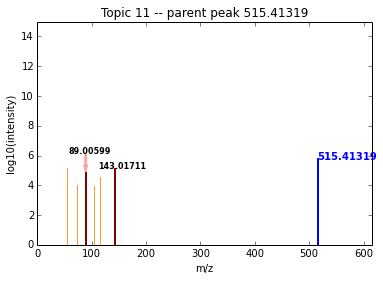

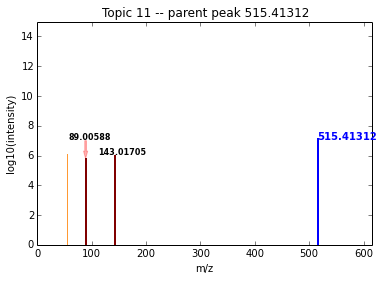

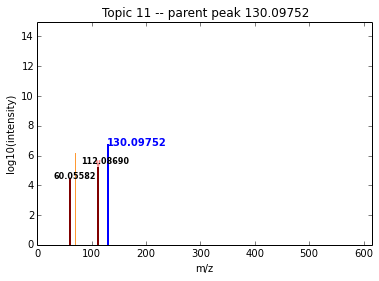

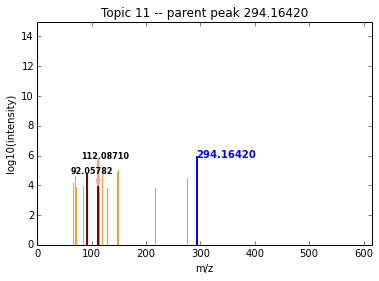

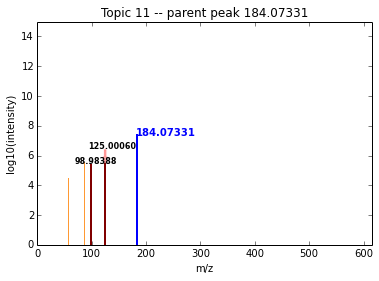

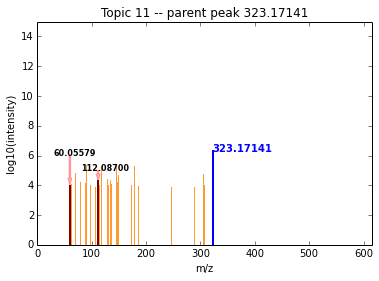

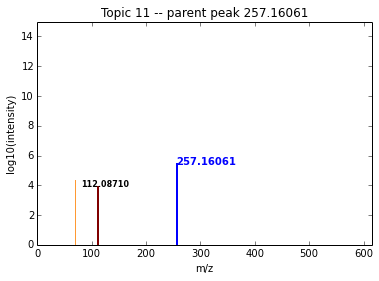

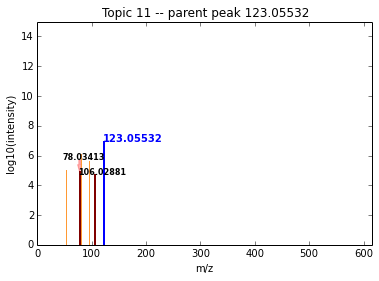

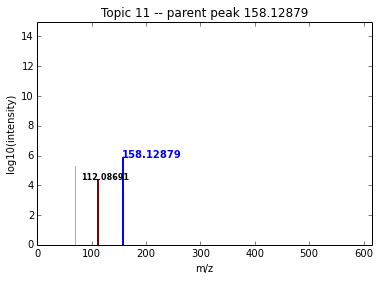

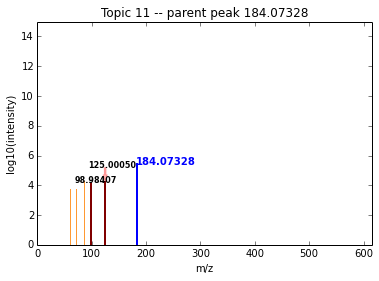

Topic 12

Parent peaks

     peakID	mz		rt		int		prob
1    6753 	148.06029	494.747		1.646e+06	0.955
2    9862 	246.13353	797.795		2.716e+05	0.912
3    9201 	203.05260	694.864		1.542e+06	0.900
4    9667 	471.21859	779.232		1.443e+06	0.791
5    10048	309.13776	846.264		3.148e+05	0.753
6    8060 	130.08629	567.280		1.677e+08	0.618
7    9997 	309.16551	736.276		4.482e+05	0.614
8    7119 	188.09171	441.780		1.108e+06	0.593
9    9668 	471.21861	712.790		1.625e+06	0.578
10   8944 	233.14949	674.743		3.214e+05	0.548

Fragments

1    fragment_84.08071 (0.314)
 peakID  MSnParentPeakID  mz        rt       intensity   
 21720    8060            84.08068  570.505  16519829.000
 22904    8944            84.08072  675.580     77323.730
 23030    9201            84.08071  690.589      7434.092
 23462    9667            84.08083  789.633    122033.600
 23467    9668            84.08079  711.957    281688.200
 23584    9862            84.08073  798.960     28240.100
 23690    9997            84.08073  7

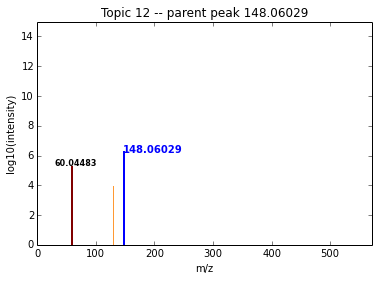

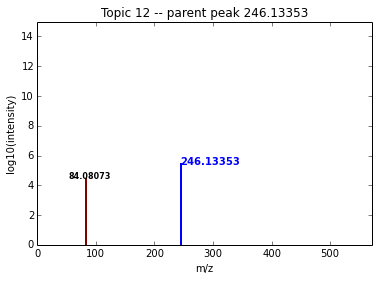

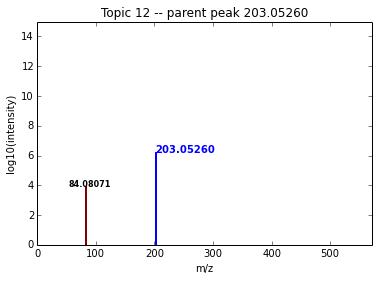

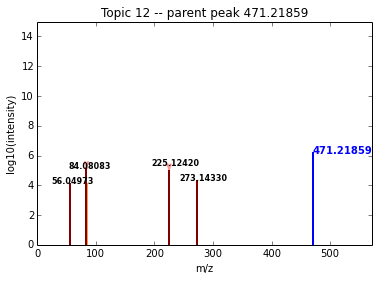

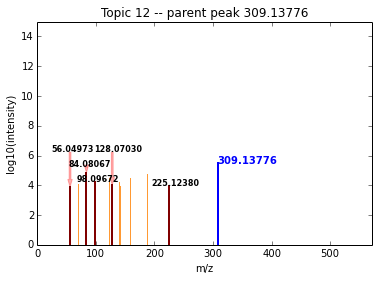

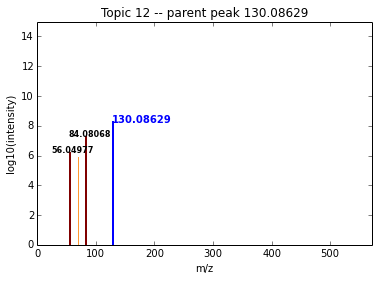

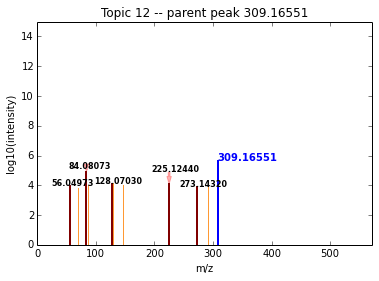

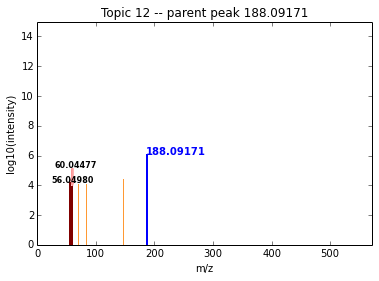

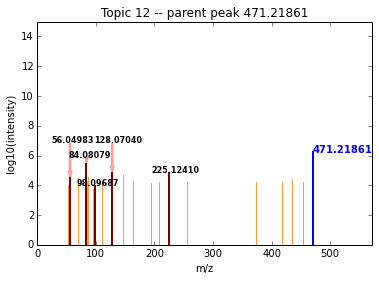

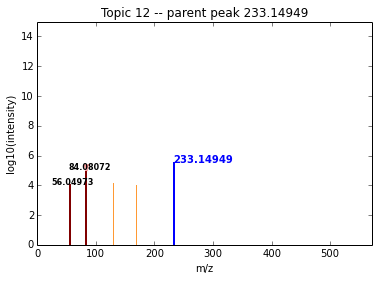

Topic 13

Parent peaks

     peakID	mz		rt		int		prob
1    9597 	85.02839	669.781		4.118e+06	0.917
2    3743 	532.43947	223.606		6.335e+07	0.689
3    2652 	560.47099	223.606		6.039e+06	0.661
4    1126 	401.17238	208.697		1.273e+07	0.515
5    2733 	383.20642	282.730		7.963e+05	0.384
6    3517 	515.41312	223.606		1.255e+07	0.335
7    9342 	109.02845	668.607		1.310e+06	0.298
8    6085 	132.06554	435.357		2.628e+06	0.284
9    7854 	229.15463	538.378		3.700e+06	0.205
10   7185 	145.04957	466.972		7.999e+06	0.189

Fragments

1    fragment_55.01824 (0.800)
 peakID  MSnParentPeakID  mz         rt       intensity     
 14756   2652             55.018353  232.131    31156.232422
 15587   3517             55.018207  231.872  1328412.250000
 15757   3743             55.018191  230.242  8572156.000000
 18420   6085             55.018340  437.448     9186.327000
 20376   7185             55.018240  467.330    59966.540000
 21440   7854             55.018200  543.562     9608.285000
 23185   9342    

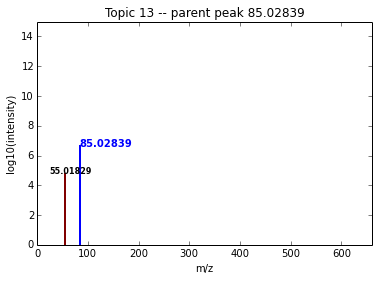

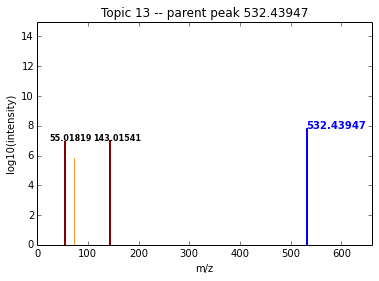

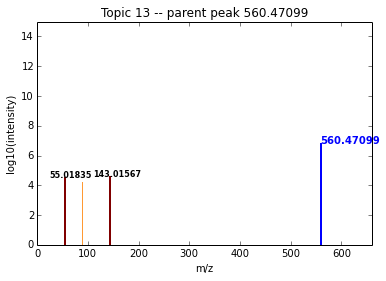

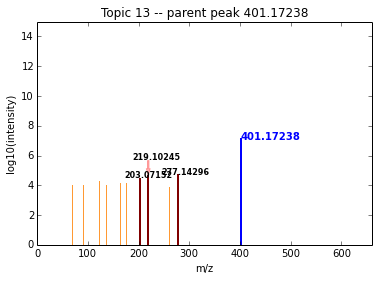

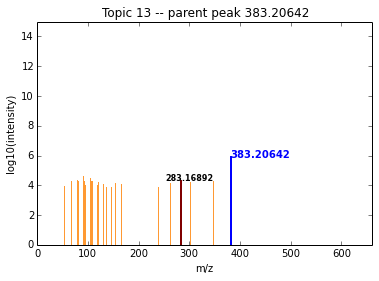

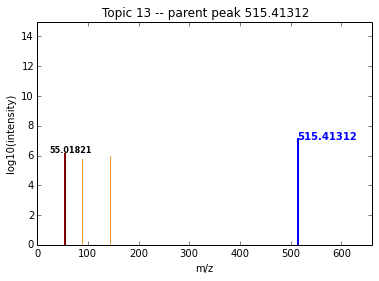

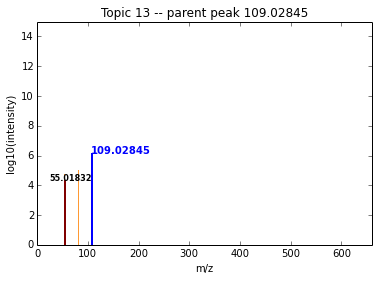

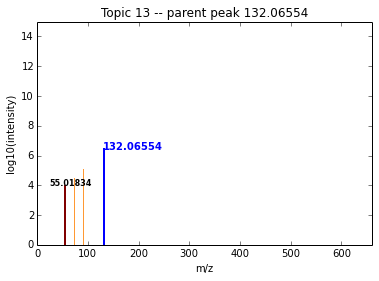

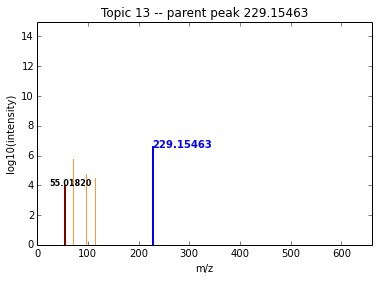

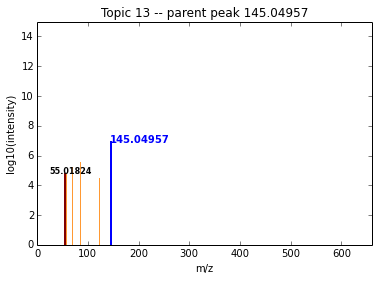

Topic 14

Parent peaks

     peakID	mz		rt		int		prob
1    9816 	234.10837	813.117		1.253e+06	0.832
2    6117 	109.02845	464.065		8.109e+05	0.510
3    7854 	229.15463	538.378		3.700e+06	0.478
4    7846 	229.15458	490.026		3.320e+07	0.424
5    7848 	229.15452	573.378		1.045e+07	0.377
6    8799 	668.26080	662.160		5.542e+05	0.373
7    7054 	168.06560	451.307		7.402e+05	0.364
8    9342 	109.02845	668.607		1.310e+06	0.346
9    10509	146.08118	660.522		1.754e+07	0.332
10   6418 	113.07092	452.947		3.020e+07	0.329

Fragments

1    fragment_68.0498 (0.366)
 peakID  MSnParentPeakID  mz        rt       intensity 
 19013   6418             68.04985  456.429  1144309.00
 19955   7054             68.04978  460.687     5794.66
 21401   7846             68.04970  495.096    87672.84
 21423   7848             68.04976  559.590    24030.34
2    fragment_81.03337 (0.322)
 peakID  MSnParentPeakID  mz        rt       intensity
 18453    6117            81.03342  461.490   54393.54
 22588    8799         

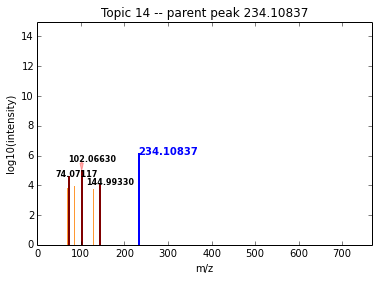

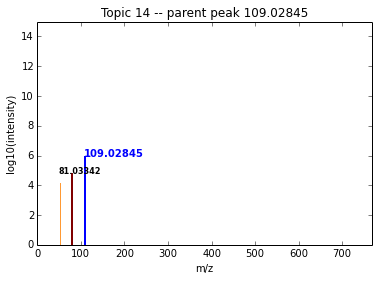

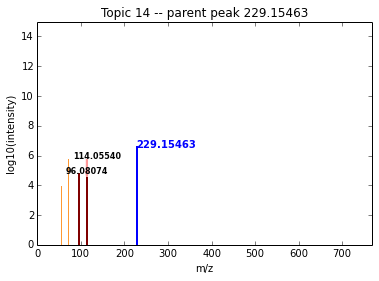

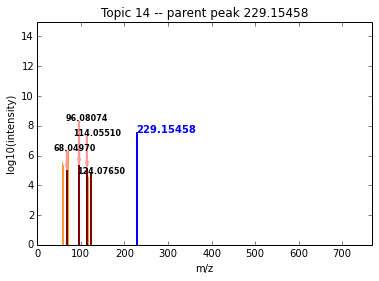

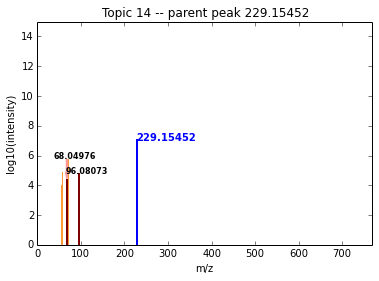

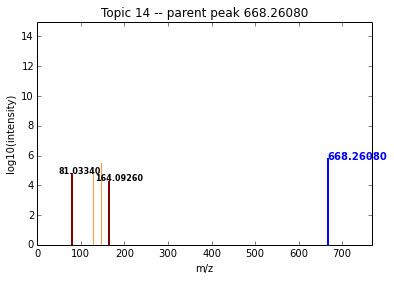

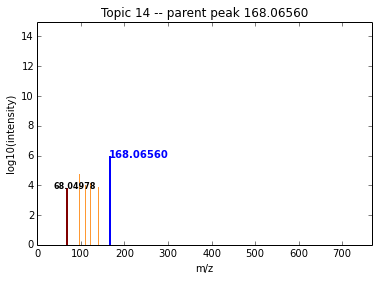

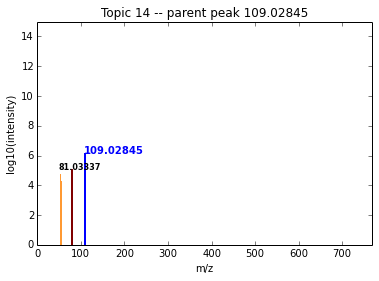

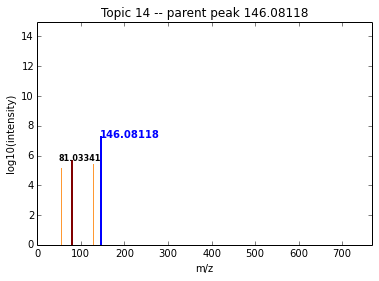

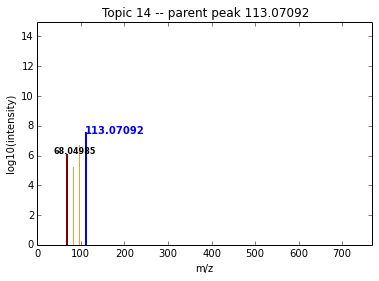

Topic 15

Parent peaks

     peakID	mz		rt		int		prob
1    2625 	355.15395	249.786		8.741e+06	0.875
2    7600 	170.09240	557.680		3.370e+06	0.656
3    10672	229.11822	955.832		7.091e+05	0.635
4    5559 	271.08110	349.996		8.397e+05	0.566
5    6199 	215.13902	457.696		7.871e+05	0.566
6    3424 	266.11347	294.270		5.031e+05	0.558
7    4305 	149.02337	239.890		1.390e+06	0.467
8    4607 	215.04844	310.690		4.331e+05	0.464
9    7724 	198.11248	554.431		1.700e+06	0.396
10   5952 	141.05462	462.438		3.093e+06	0.356

Fragments

1    fragment_125.07087 (0.199)
 peakID  MSnParentPeakID  mz          rt       intensity   
 16418   4607             125.070796  305.426  64379.078125
 18571   6199             125.070900  450.904  26365.760000
 20812   7600             125.071100  552.582   9614.485000
2    fragment_95.06076 (0.136)
 peakID  MSnParentPeakID  mz         rt       intensity   
 15455    3424            95.060499  294.823  17290.974609
 16423    4607            95.060721  305.426   9034.5

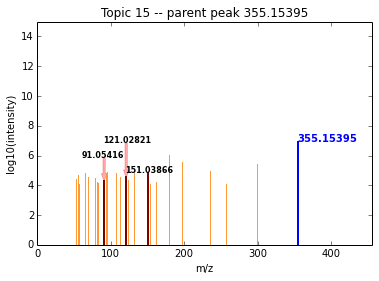

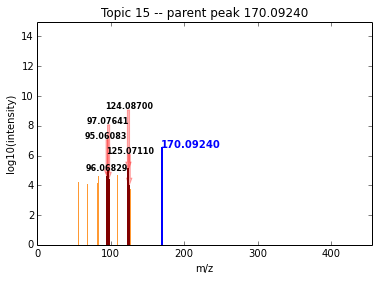

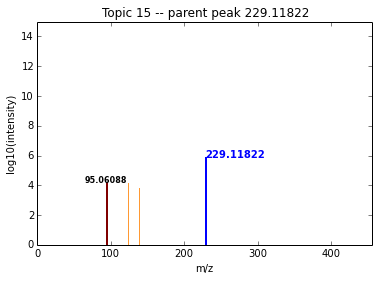

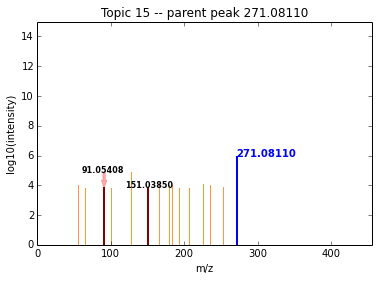

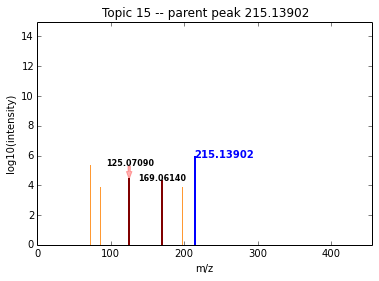

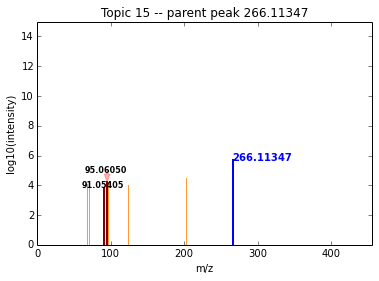

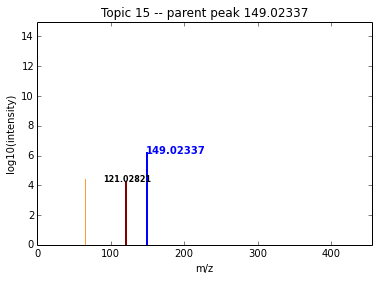

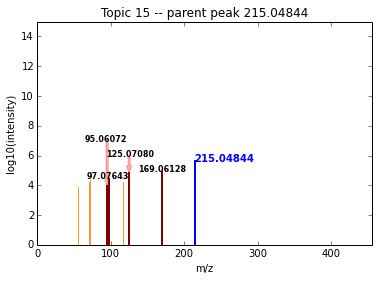

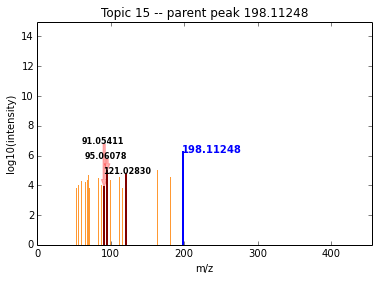

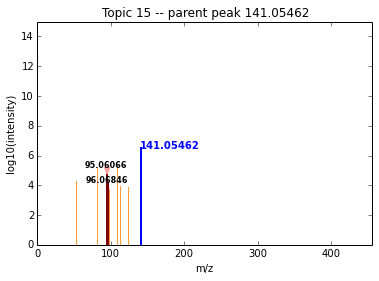

Topic 16

Parent peaks

     peakID	mz		rt		int		prob
1    3503 	553.36919	276.253		1.080e+06	0.896
2    7735 	244.09286	559.317		1.878e+07	0.719
3    3781 	371.14695	327.143		3.371e+05	0.658
4    5611 	321.05963	438.661		1.855e+06	0.639
5    2483 	257.18577	276.253		4.999e+05	0.617
6    7704 	112.05052	552.842		1.928e+07	0.554
7    2726 	359.10373	286.004		7.618e+05	0.499
8    5251 	300.08439	300.895		4.340e+05	0.491
9    1857 	273.21704	246.483		3.650e+05	0.437
10   4972 	275.16005	414.504		1.319e+06	0.417

Fragments

1    fragment_86.09652 (0.633)
 peakID  MSnParentPeakID  mz         rt       intensity    
 13828   1857             86.096624  245.801  112598.234375
 14443   2483             86.096644  274.284   13252.146484
 14849   2726             86.096489  283.686   58442.750000
 15569   3503             86.096483  279.908    5118.236328
 16784   4972             86.096529  414.108  206809.468750
 17051   5251             86.096620  300.210   25359.109375
2    fragment_84.04487 

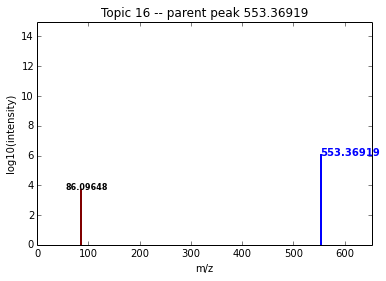

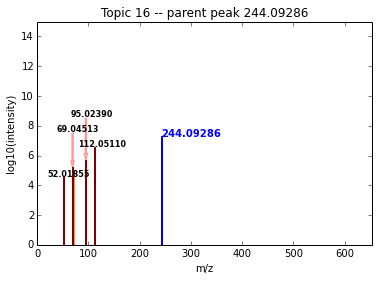

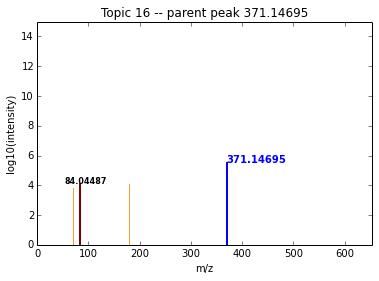

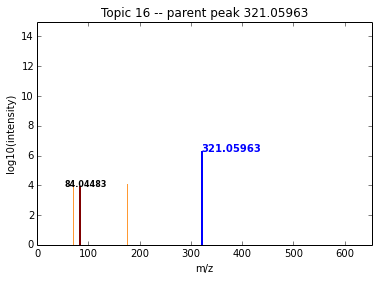

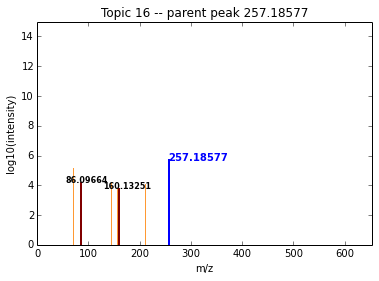

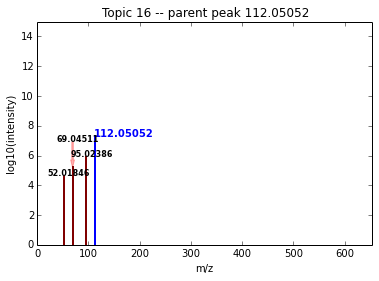

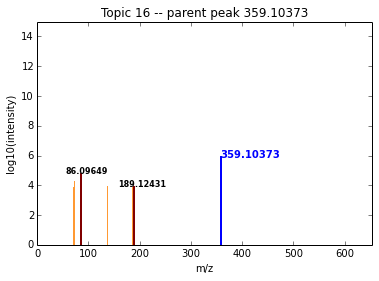

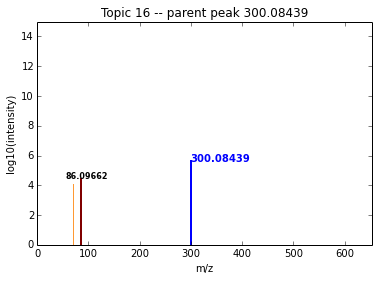

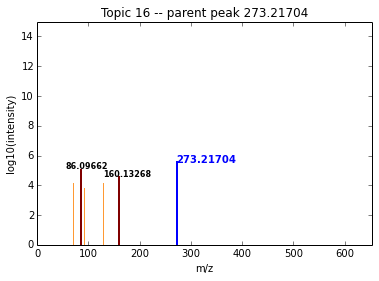

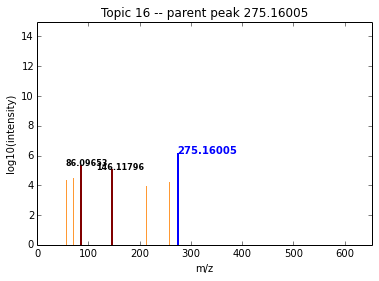

Topic 17

Parent peaks

     peakID	mz		rt		int		prob
1    2464 	650.39629	269.747		5.869e+05	0.991
2    2236 	672.40933	269.747		4.630e+05	0.955
3    4835 	137.05975	406.488		1.482e+06	0.918
4    2462 	606.37016	269.747		6.308e+05	0.908
5    2461 	584.35683	271.396		6.243e+05	0.845
6    2720 	344.22788	284.365		5.089e+05	0.752
7    1288 	352.30572	234.884		3.942e+05	0.664
8    2510 	388.25394	281.137		4.226e+05	0.655
9    2653 	560.47120	271.396		1.007e+06	0.490
10   6670 	120.08076	499.470		2.674e+06	0.299

Fragments

1    fragment_111.04429 (0.181)
 peakID  MSnParentPeakID  mz          rt       intensity   
 14362   2461             111.044224  267.989  24536.093750
 14389   2462             111.044345  267.709  31749.027344
 14410   2464             111.044512  267.564  21557.416016
2    fragment_95.04936 (0.127)
 peakID  MSnParentPeakID  mz         rt       intensity   
 14363   2461             95.049339  267.989  13452.778320
 14411   2464             95.049342  267.564  15771.0

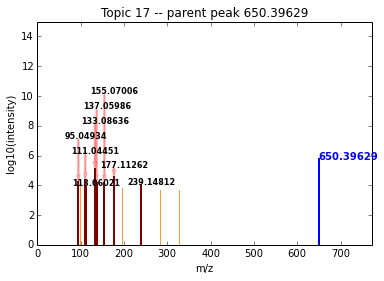

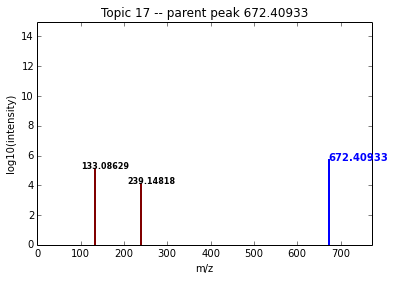

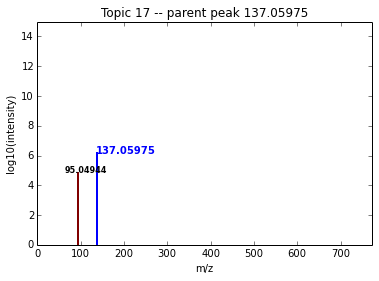

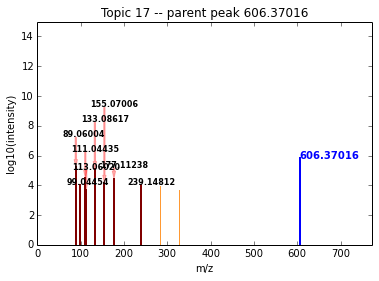

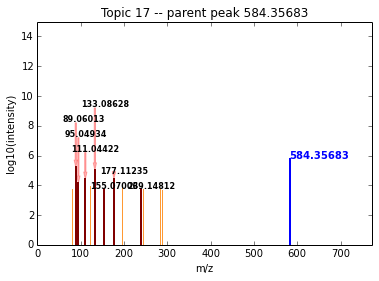

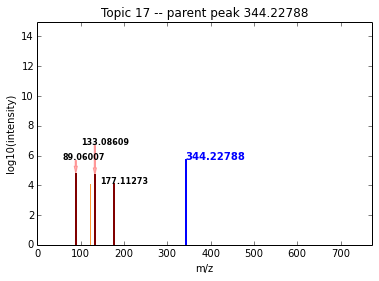

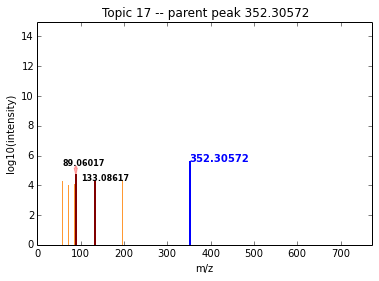

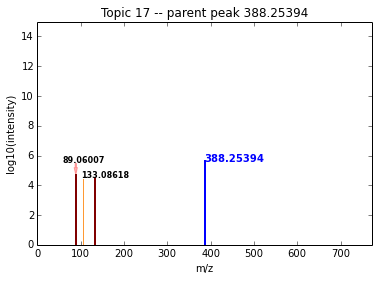

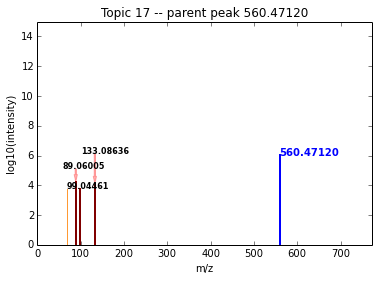

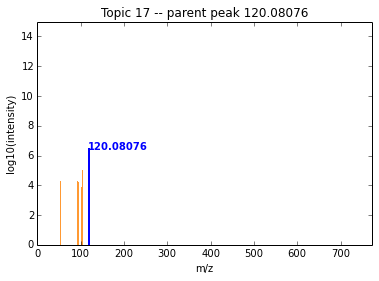

Topic 18

Parent peaks

     peakID	mz		rt		int		prob
1    11272	275.17112	947.136		6.910e+05	0.756
2    9113 	218.12476	691.613		4.311e+05	0.755
3    11379	175.11894	1027.770		3.669e+06	0.722
4    9501 	499.22482	711.245		3.067e+06	0.712
5    9664 	337.17170	736.276		9.892e+05	0.690
6    10505	319.16114	896.485		5.220e+06	0.642
7    10696	185.13967	973.218		5.919e+05	0.626
8    8393 	247.14007	616.311		1.427e+06	0.618
9    9663 	337.17161	710.377		1.150e+07	0.617
10   11380	175.11897	1050.210		9.611e+05	0.581

Fragments

1    fragment_71.0494 (0.110)
 peakID  MSnParentPeakID  mz        rt        intensity 
 22078    8393            71.04944   611.332   11652.640
 23393    9663            71.04936   710.653  112988.400
 23422    9664            71.04940   741.417    7875.126
 24272   10505            71.04932   896.165   36534.460
 25120   11379            71.04932  1033.000   10352.570
2    fragment_100.07534 (0.090)
 peakID  MSnParentPeakID  mz        rt       intensity
 23424   9664

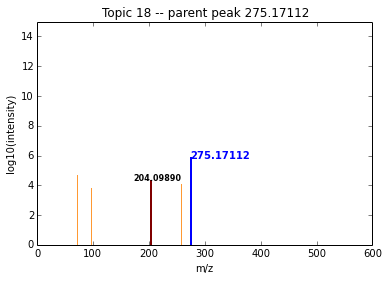

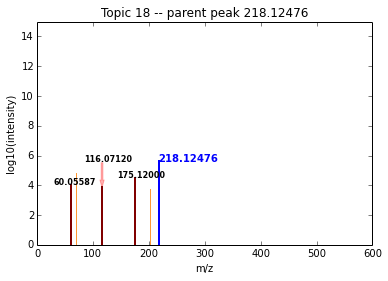

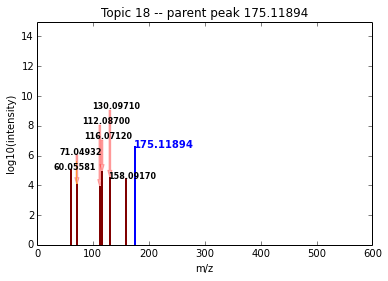

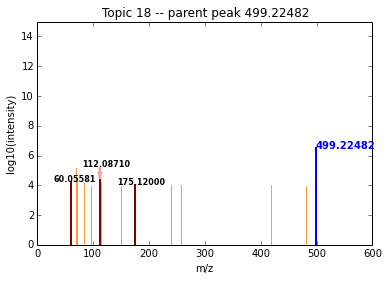

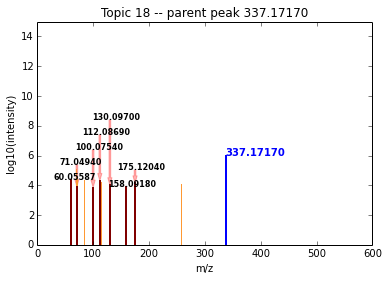

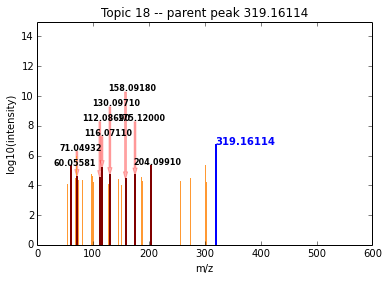

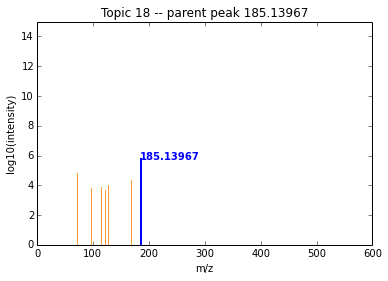

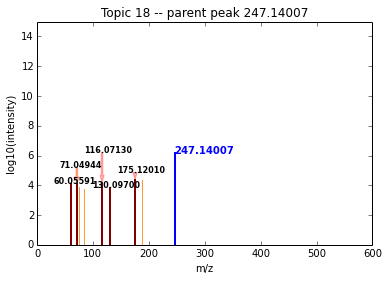

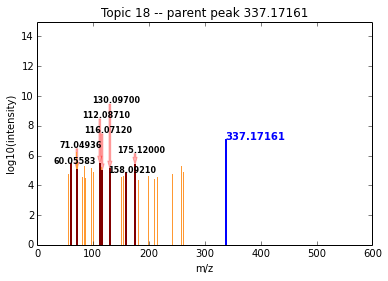

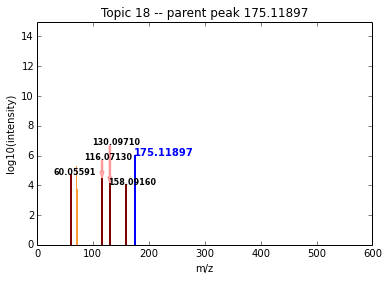

Topic 19

Parent peaks

     peakID	mz		rt		int		prob
1    1733 	398.21725	231.552		3.862e+05	0.979
2    1168 	366.19963	224.227		5.821e+05	0.972
3    1515 	366.22731	210.369		2.972e+06	0.961
4    1018 	387.15665	208.697		8.009e+06	0.900
5    3501 	553.36897	223.606		1.358e+07	0.896
6    3661 	237.14843	216.950		6.623e+05	0.870
7    735  	435.12384	213.692		6.674e+05	0.822
8    3397 	349.20080	210.369		4.867e+07	0.780
9    1870 	331.19034	210.369		7.099e+06	0.578
10   2628 	365.19595	225.881		2.922e+06	0.548

Fragments

1    fragment_225.07566 (0.056)
 peakID  MSnParentPeakID  mz          rt       intensity    
 13334   1168             225.075783  211.483   43572.960938
 13561   1515             225.075985  204.581   17433.609375
 14648   2628             225.075709  214.488   12403.213867
 15403   3397             225.075902  215.595  260653.687500
2    fragment_69.07013 (0.050)
 peakID  MSnParentPeakID  mz         rt       intensity    
 13030    735             69.070117  211.763  

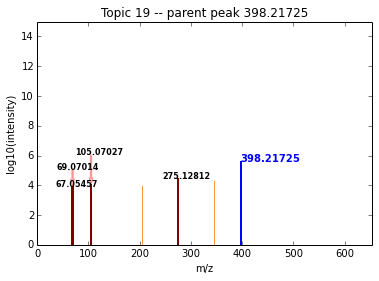

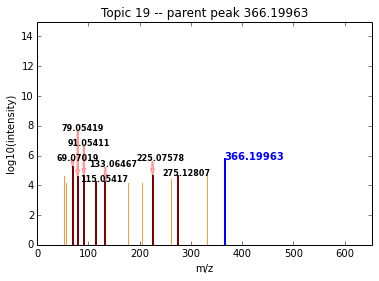

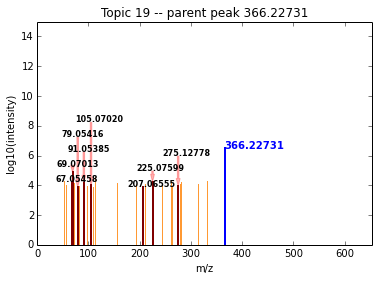

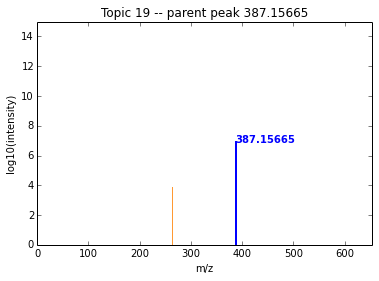

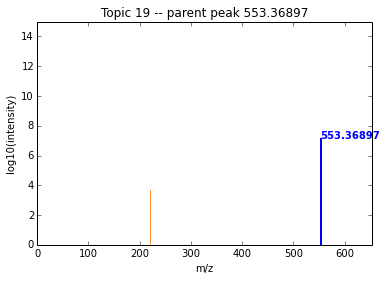

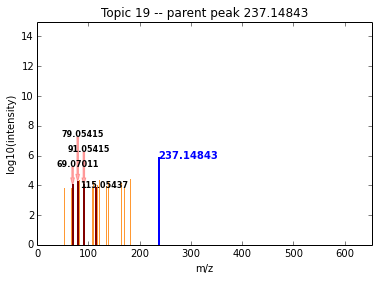

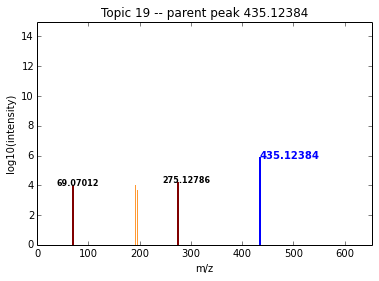

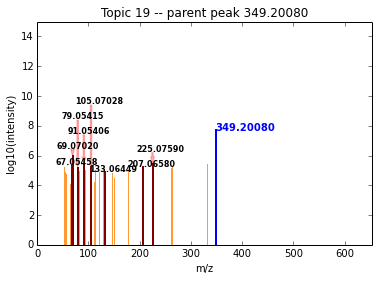

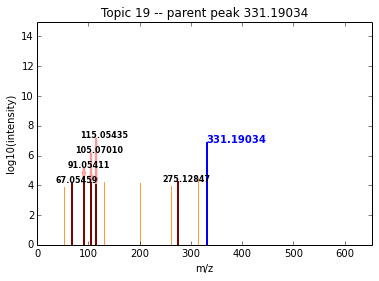

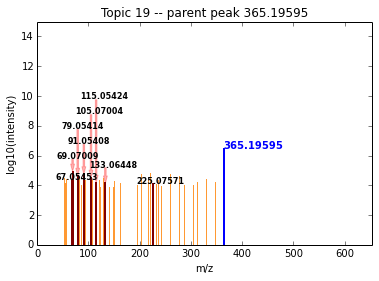

Topic 20

Parent peaks

     peakID	mz		rt		int		prob
1    7179 	137.04578	512.170		5.750e+07	0.989
2    7216 	136.06172	496.313		5.973e+08	0.988
3    8968 	282.11955	657.338		5.294e+06	0.987
4    7181 	137.04581	482.456		4.707e+07	0.932
5    8971 	446.15175	677.129		7.945e+05	0.921
6    7510 	487.17874	559.317		1.266e+06	0.854
7    7180 	137.04582	438.661		6.213e+06	0.847
8    7963 	267.11969	585.875		1.540e+07	0.734
9    5953 	150.07745	438.661		1.751e+07	0.723
10   4961 	164.09316	409.811		1.323e+07	0.712

Fragments

1    fragment_94.03985 (0.090)
 peakID  MSnParentPeakID  mz         rt       intensity     
 16763   4961             94.039842  408.715    16898.125000
 18140   5953             94.040451  445.091    83697.335938
 20353   7179             94.039620  515.680   769935.100000
 20525   7216             94.039640  495.018  5061413.000000
 20801   7510             94.039830  558.781    21166.560000
 22924   8968             94.039630  665.796    19345.370000
2    fragment_55

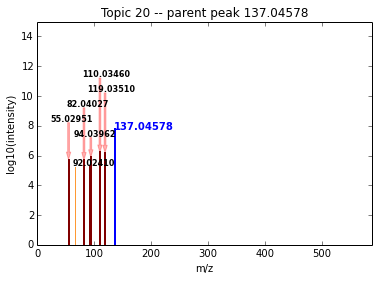

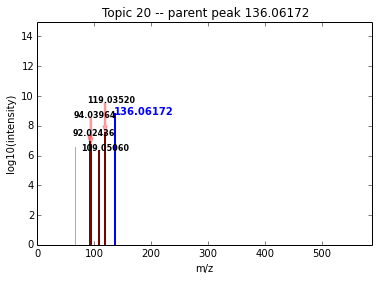

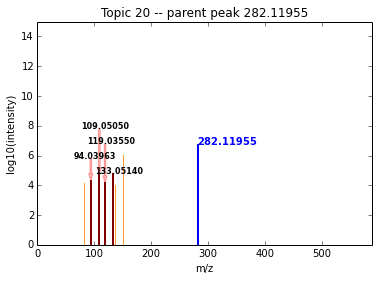

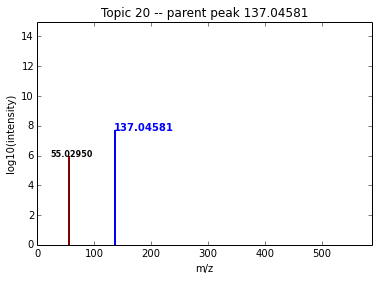

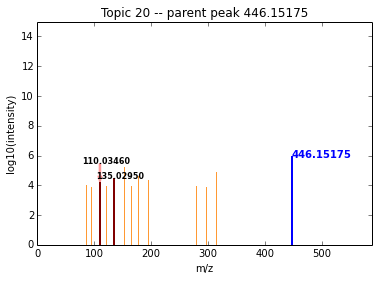

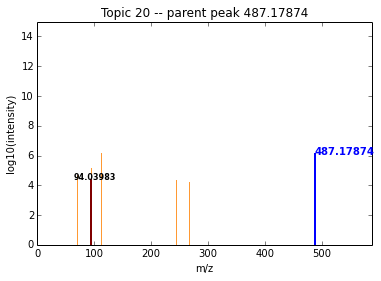

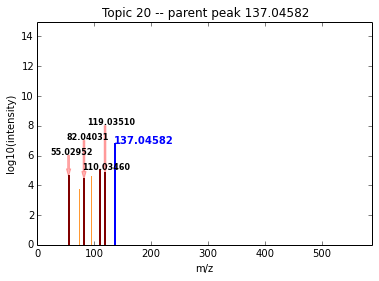

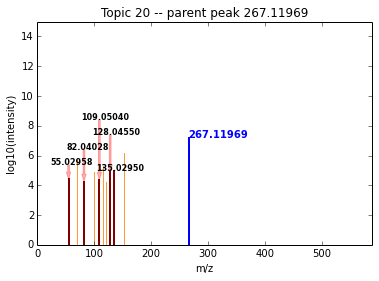

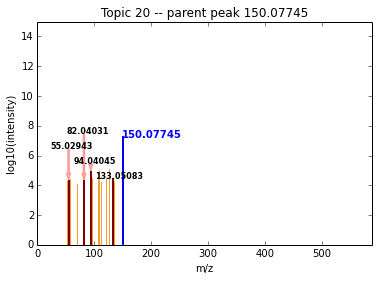

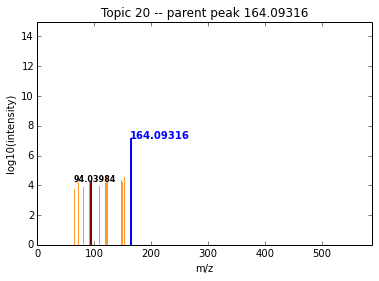

Topic 21

Parent peaks

     peakID	mz		rt		int		prob
1    8012 	295.11348	589.081		8.320e+06	0.845
2    7738 	252.10766	567.280		1.612e+06	0.834
3    8396 	296.09760	624.196		3.083e+06	0.791
4    8046 	234.09711	592.308		1.819e+07	0.790
5    7626 	264.10764	552.842		2.453e+06	0.749
6    8162 	457.16641	613.130		7.006e+05	0.630
7    7968 	282.11815	554.431		1.383e+07	0.613
8    8900 	252.10771	619.436		1.053e+06	0.609
9    8049 	252.10761	592.308		3.563e+07	0.568
10   5842 	134.08115	383.864		4.145e+06	0.537

Fragments

1    fragment_74.06037 (0.064)
 peakID  MSnParentPeakID  mz         rt       intensity  
 18025   5842             74.060395  385.983  402600.1875
 20866   7626             74.060360  548.944    8753.4340
 21111   7738             74.060390  565.188    6399.9300
 21488   7968             74.060370  556.347  148782.4000
2    fragment_56.04978 (0.043)
 peakID  MSnParentPeakID  mz         rt       intensity   
 18026   5842             56.049812  385.983  240527.59375
 208

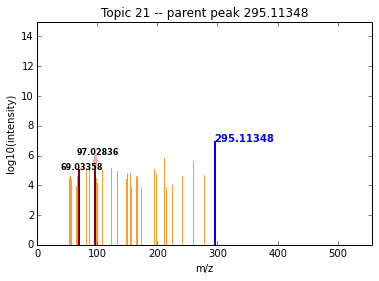

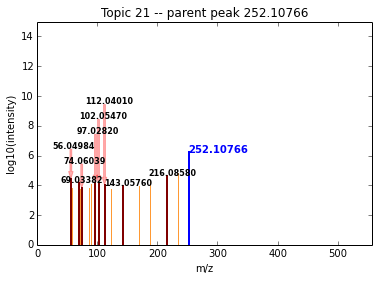

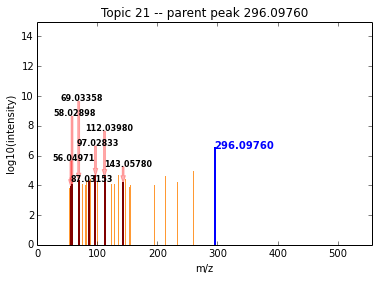

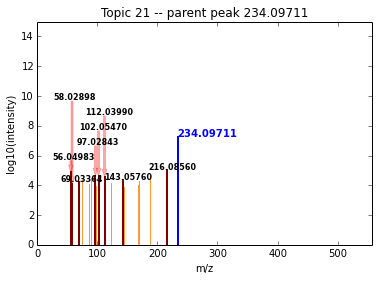

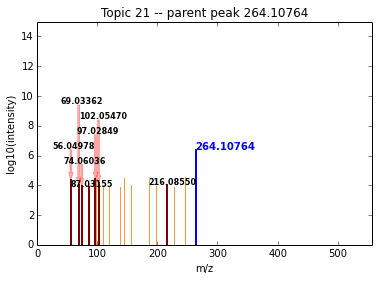

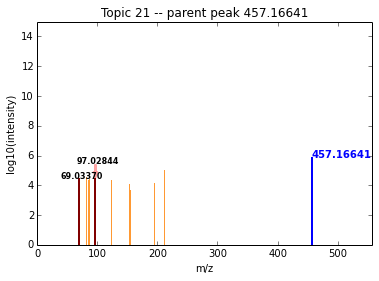

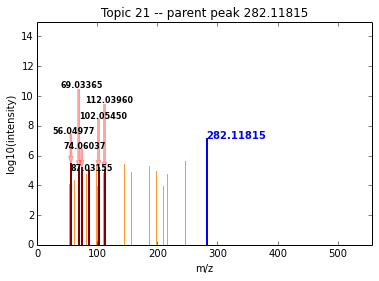

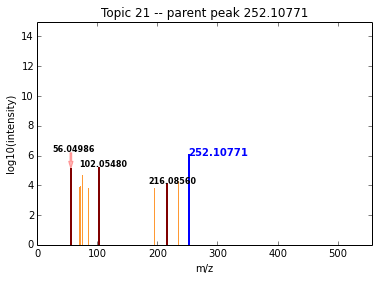

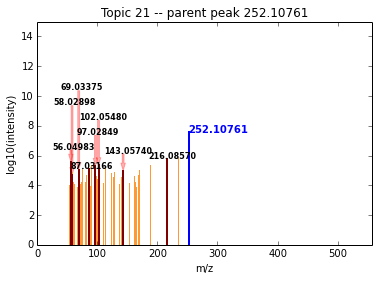

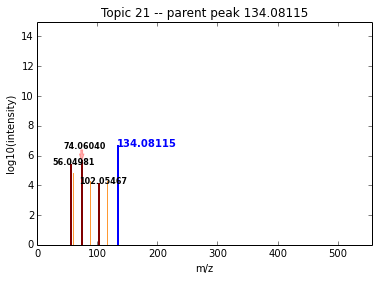

Topic 22

Parent peaks

     peakID	mz		rt		int		prob
1    5604 	254.10218	330.420		7.728e+05	0.979
2    5602 	254.10219	372.653		1.255e+06	0.908
3    5601 	254.10218	419.222		1.980e+06	0.903
4    7937 	138.05249	578.163		1.900e+07	0.894
5    7727 	205.09718	554.431		3.592e+07	0.885
6    5603 	254.10221	294.270		4.091e+05	0.763
7    6044 	237.08689	443.301		9.559e+05	0.759
8    7316 	334.13967	541.633		9.199e+05	0.665
9    6041 	237.08692	468.549		2.044e+06	0.637
10   6186 	170.08113	435.357		3.969e+07	0.560

Fragments

1    fragment_118.06547 (0.070)
 peakID  MSnParentPeakID  mz          rt       intensity     
 17468   5601             118.065456  415.544     7103.250488
 17535   5602             118.065466  375.337     7321.582031
 17606   5604             118.065428  326.053     6068.848633
 18246   6041             118.065441  460.133    48399.578125
 18271   6044             118.065536  442.767    23708.974609
 20672   7316             118.065500  538.306    77270.350000
 21053  

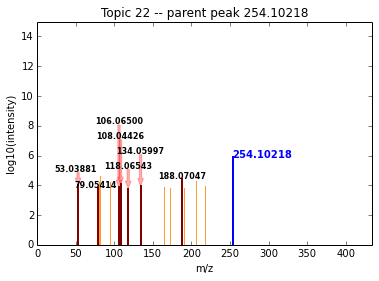

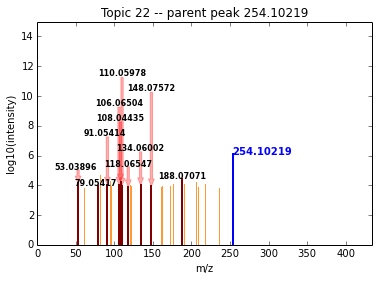

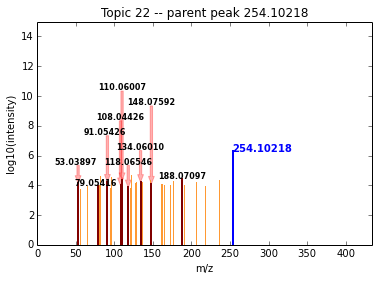

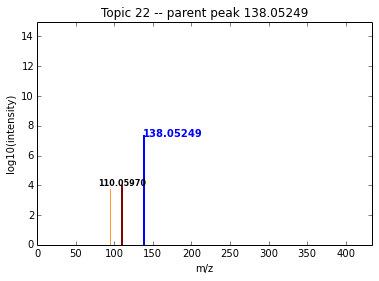

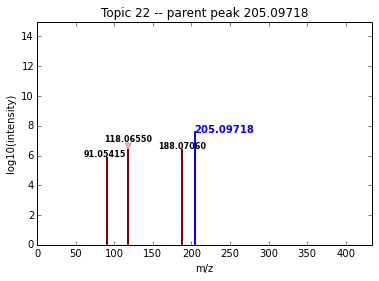

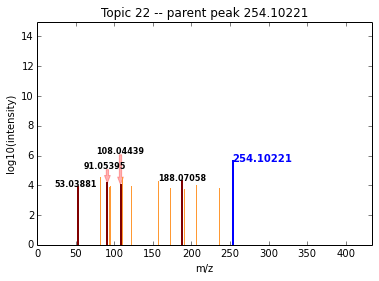

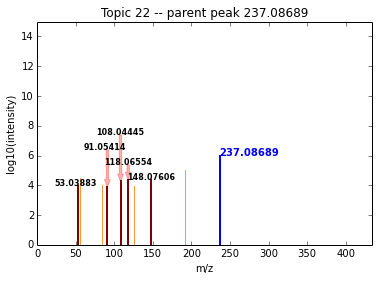

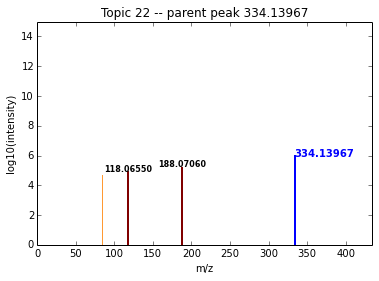

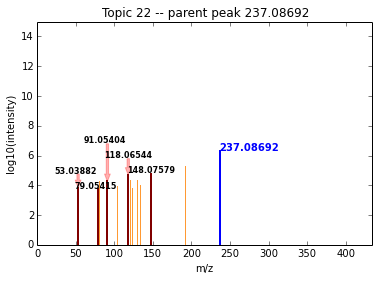

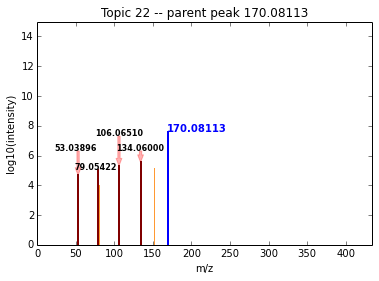

Topic 23

Parent peaks

     peakID	mz		rt		int		prob
1    8078 	205.11832	597.184		9.746e+06	0.818
2    6339 	216.12311	409.811		1.012e+07	0.808
3    6341 	216.12305	385.459		2.965e+06	0.690
4    6781 	180.10187	273.033		1.428e+07	0.668
5    8412 	189.12330	625.833		1.356e+06	0.623
6    6385 	240.12286	437.038		8.992e+05	0.549
7    6779 	180.10186	369.407		1.026e+07	0.517
8    5283 	243.09755	412.921		6.523e+06	0.515
9    9508 	295.14995	687.048		1.306e+06	0.480
10   5995 	200.09176	300.895		3.819e+05	0.417

Fragments

1    fragment_82.065 (0.210)
 peakID  MSnParentPeakID  mz        rt       intensity
 18728   6339             82.06505  406.808   55435.76
 18774   6341             82.06492  390.717   60125.64
 19492   6779             82.06505  368.104  186472.00
 19504   6781             82.06509  271.668   95891.49
 21780   8078             82.06505  598.963  653965.90
2    fragment_112.07583 (0.081)
 peakID  MSnParentPeakID  mz        rt       intensity
 19501   6781             11

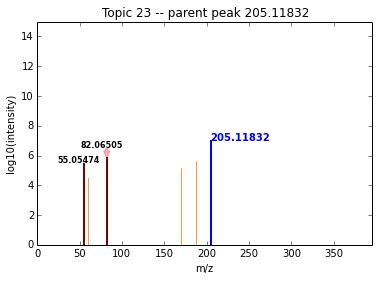

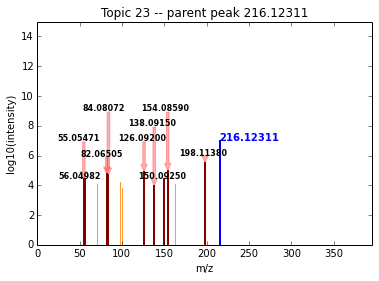

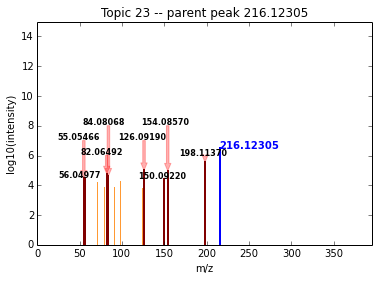

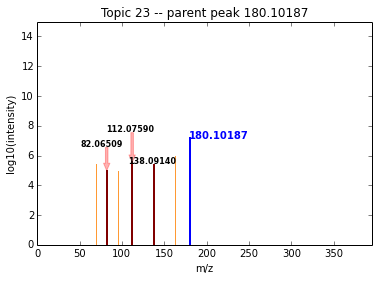

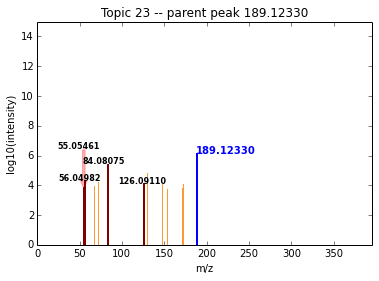

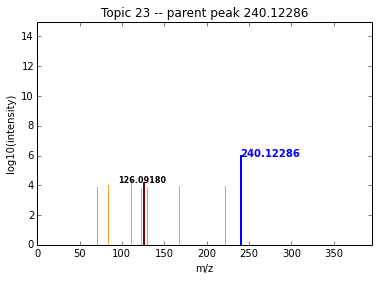

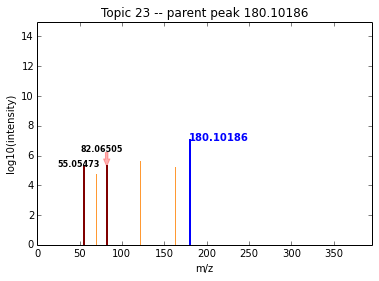

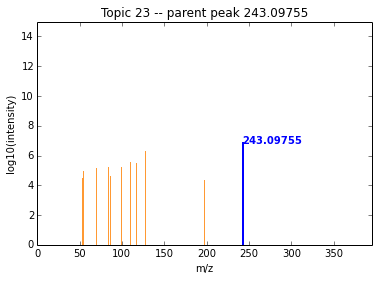

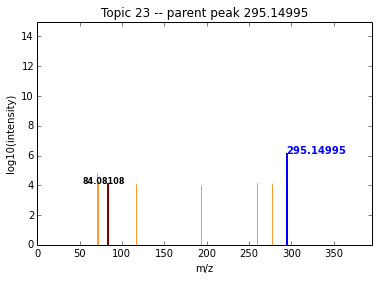

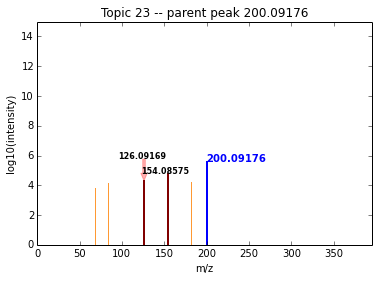

Topic 24

Parent peaks

     peakID	mz		rt		int		prob
1    10530	291.16325	564.091		3.560e+06	0.620
2    11550	173.13970	1200.220		6.650e+06	0.608
3    10486	133.09711	876.985		3.084e+07	0.607
4    10528	291.16318	632.053		6.842e+06	0.537
5    7508 	416.26157	556.072		6.047e+05	0.485
6    7916 	231.13375	578.163		3.483e+07	0.482
7    6344 	227.10254	374.230		1.149e+07	0.480
8    10115	177.08697	876.985		3.853e+05	0.376
9    7249 	372.18873	541.633		1.201e+06	0.321
10   6523 	469.20801	494.747		1.176e+06	0.259

Fragments

1    fragment_116.07114 (0.165)
 peakID  MSnParentPeakID  mz        rt       intensity 
 18803    6344            116.0712  368.191  1110488.00
 20784    7508            116.0712  555.950    10571.74
 21467    7916            116.0710  574.009  6234625.00
 23823   10115            116.0709  874.334    22009.57
 24183   10486            116.0710  876.376  1540141.00
2    fragment_115.08711 (0.083)
 peakID  MSnParentPeakID  mz        rt        intensity 
 19234    6523  

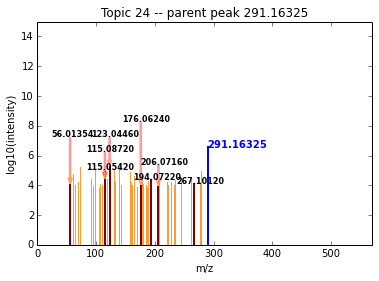

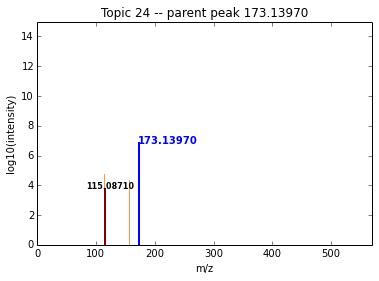

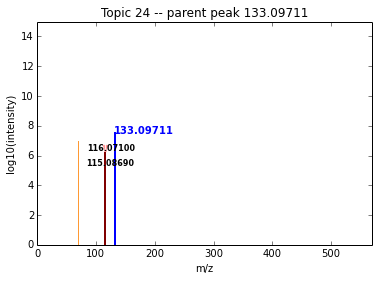

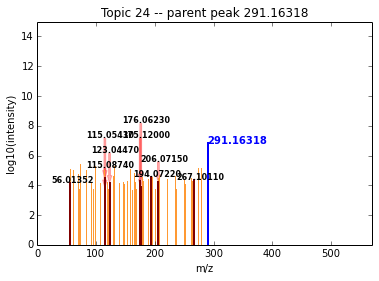

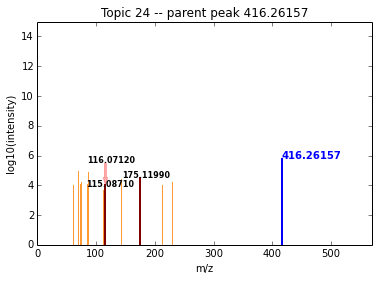

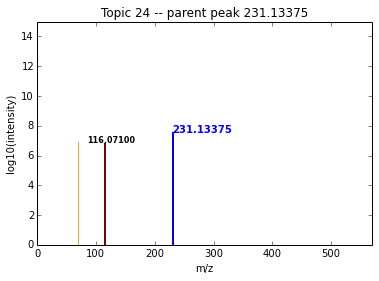

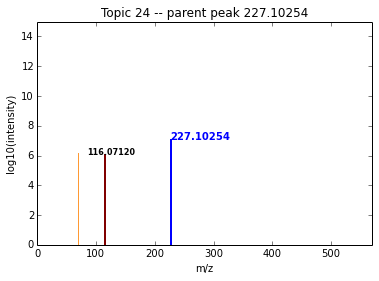

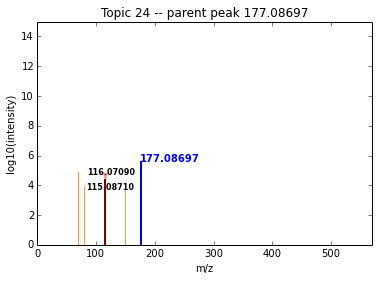

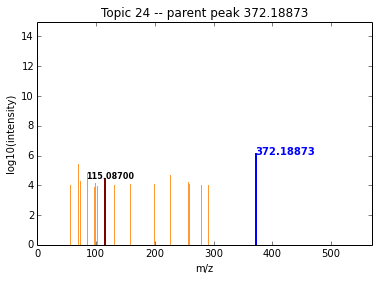

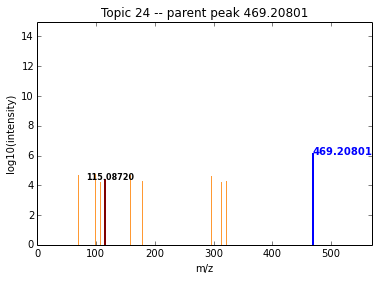

Topic 25

Parent peaks

     peakID	mz		rt		int		prob
1    7094 	465.10293	513.775		9.155e+05	0.607
2    10407	127.03897	699.829		1.688e+06	0.501
3    6291 	186.07611	441.780		1.643e+06	0.480
4    8066 	204.08662	590.713		9.467e+05	0.477
5    10589	244.17650	927.424		5.341e+05	0.476
6    8627 	234.09720	641.423		6.665e+05	0.458
7    7726 	204.08664	547.980		6.168e+06	0.433
8    10470	89.10731	756.994		4.675e+05	0.403
9    9355 	204.08669	668.607		4.030e+05	0.387
10   9901 	369.24965	839.514		3.221e+05	0.296

Fragments

1    fragment_97.02839 (0.343)
 peakID  MSnParentPeakID  mz        rt       intensity
 20160    7094            97.02852  509.774  16686.510
 21730    8066            97.02833  586.884   7724.695
 22431    8627            97.02846  642.333  15622.850
 23187    9355            97.02844  664.936  20495.910
 24048   10407            97.02843  707.304  75975.530
2    fragment_72.04465 (0.144)
 peakID  MSnParentPeakID  mz        rt       intensity
 22438    8627            72

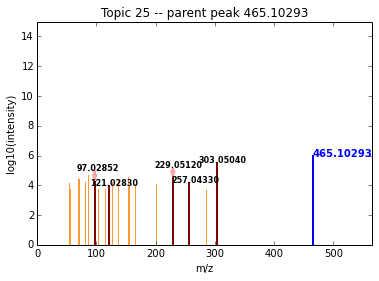

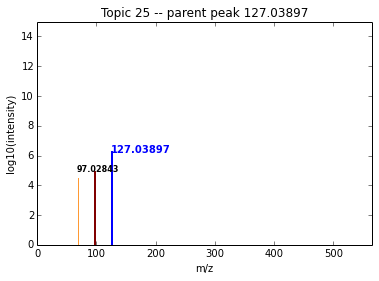

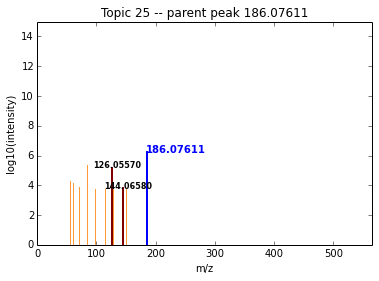

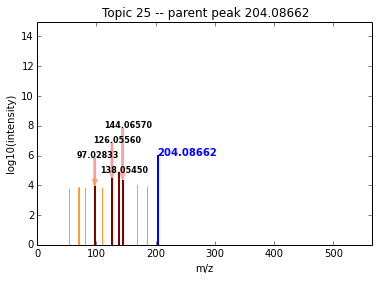

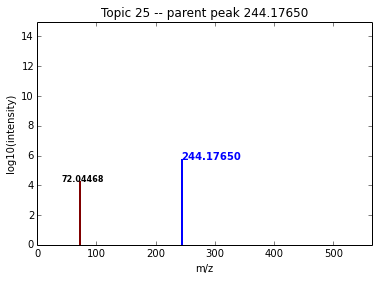

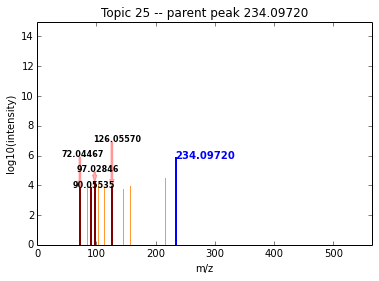

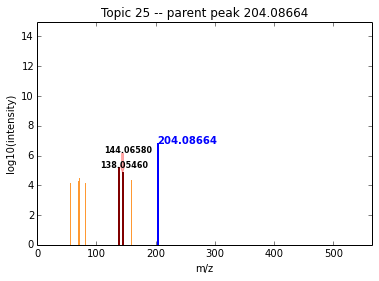

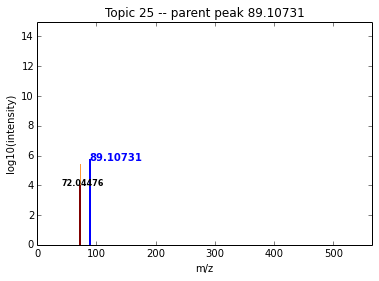

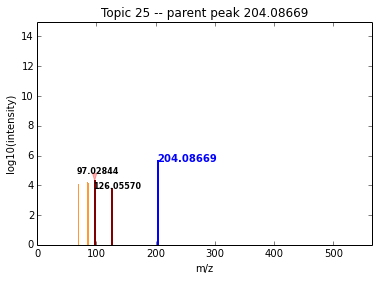

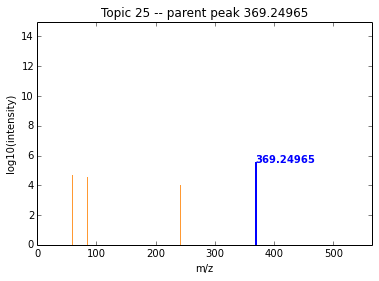

Topic 26

Parent peaks

     peakID	mz		rt		int		prob
1    5592 	230.04813	440.293		2.099e+06	0.709
2    4761 	287.13889	411.438		2.518e+06	0.570
3    5005 	303.13403	414.504		4.038e+06	0.351
4    9071 	365.10546	670.770		2.544e+06	0.324
5    10482	438.21067	674.743		4.207e+05	0.319
6    8845 	238.03790	668.607		4.814e+05	0.247
7    5932 	148.09680	372.653		1.562e+06	0.221
8    10994	357.18441	968.872		3.737e+05	0.219
9    3626 	261.09027	299.240		4.208e+05	0.209
10   5524 	298.09687	412.921		3.007e+07	0.182

Fragments

1    fragment_58.99527 (0.039)
 peakID  MSnParentPeakID  mz         rt       intensity    
 16592   4761             58.995288  412.848   13923.380859
 17398   5592             58.995266  444.353  113800.734375
 22663   8845             58.995330  666.848   16871.190000
2    fragment_61.01085 (0.029)
 peakID  MSnParentPeakID  mz         rt       intensity    
 15674   3626             61.010807  297.504   22282.789062
 17312   5524             61.010926  406.948  120935

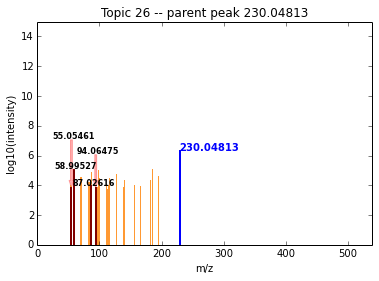

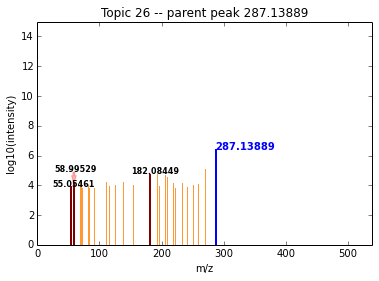

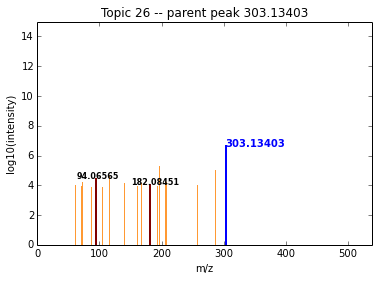

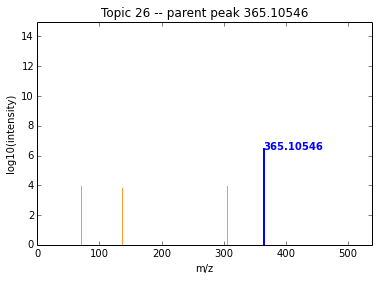

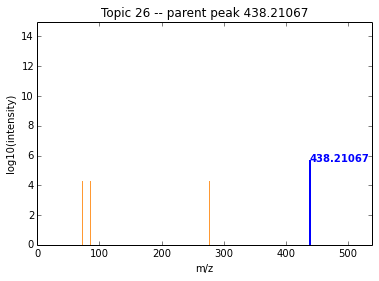

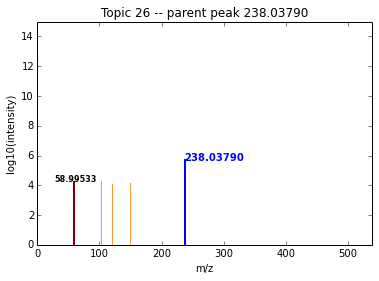

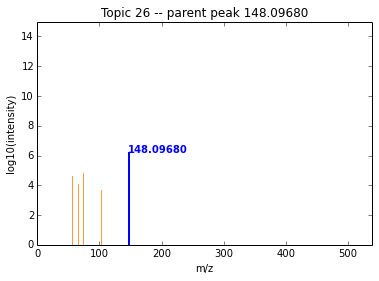

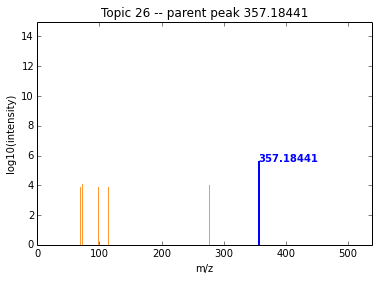

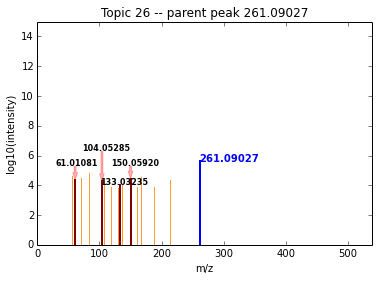

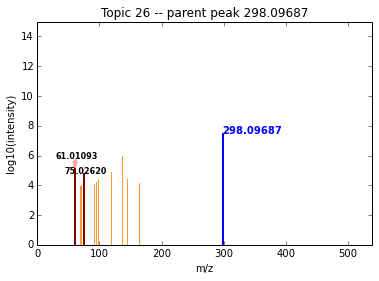

Topic 27

Parent peaks

     peakID	mz		rt		int		prob
1    8586 	150.07606	649.151		5.675e+05	0.577
2    10358	146.11753	776.753		2.813e+07	0.532
3    9087 	146.09237	644.357		2.514e+08	0.507
4    8703 	608.23994	649.151		5.707e+05	0.505
5    10347	273.14431	909.679		2.512e+05	0.498
6    1085 	647.45872	220.295		1.120e+06	0.486
7    3625 	246.16992	244.833		5.421e+05	0.484
8    6286 	174.07613	451.307		3.237e+06	0.457
9    8837 	590.22941	658.950		1.993e+06	0.440
10   7215 	104.07060	403.273		1.792e+07	0.429

Fragments

1    fragment_86.06014 (0.258)
 peakID  MSnParentPeakID  mz        rt       intensity
 18644   6286             86.06019  458.188  265578.50
 22360   8586             86.06007  652.303   14816.82
 22644   8837             86.06008  653.127   21192.74
2    fragment_87.04389 (0.222)
 peakID  MSnParentPeakID  mz        rt       intensity  
 18647    6286            87.04396  458.188    65621.730
 20522    7215            87.04446  419.493    91852.980
 22362    8586       

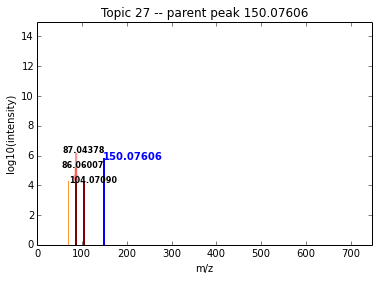

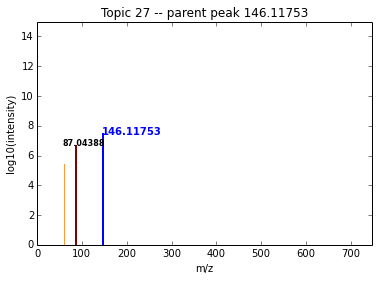

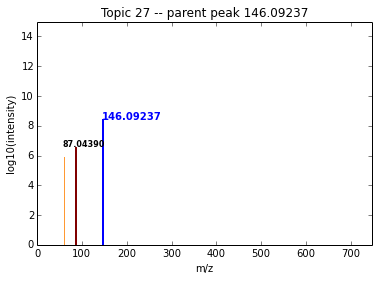

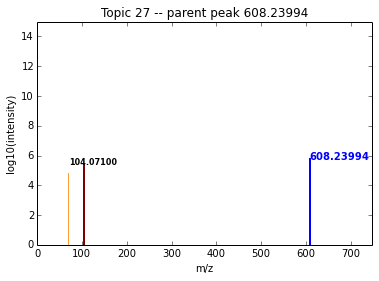

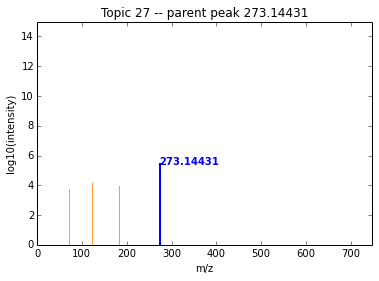

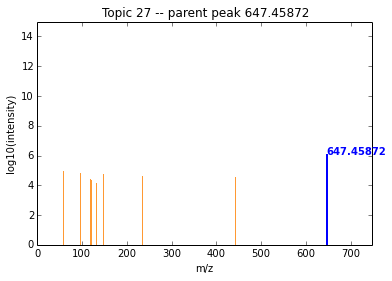

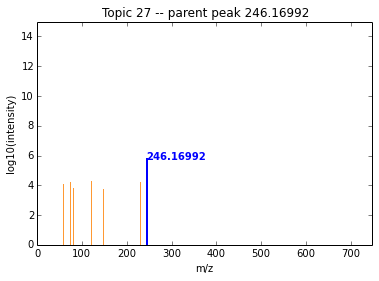

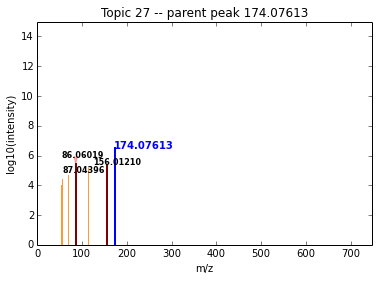

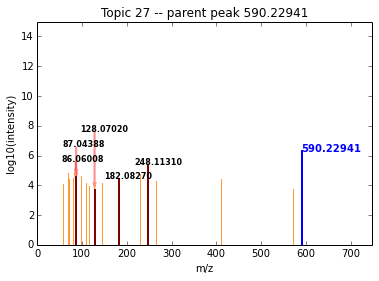

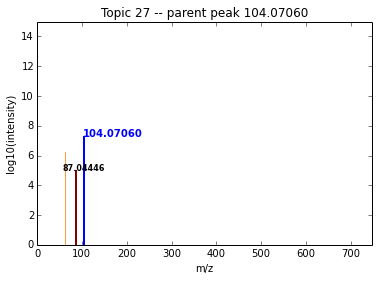

Topic 28

Parent peaks

     peakID	mz		rt		int		prob
1    4366 	210.17000	277.930		5.235e+06	0.849
2    4368 	210.17001	322.471		5.487e+05	0.842
3    7195 	193.14347	277.930		2.849e+07	0.805
4    7706 	119.08965	568.665		1.262e+06	0.798
5    7196 	193.14348	366.198		1.842e+06	0.750
6    4281 	135.10155	369.407		2.382e+06	0.703
7    4108 	251.18519	259.764		8.181e+06	0.632
8    7197 	193.14349	322.471		2.445e+06	0.613
9    4369 	211.03671	390.305		6.783e+05	0.583
10   4420 	117.09101	277.930		2.673e+06	0.501

Fragments

1    fragment_59.04942 (0.309)
 peakID  MSnParentPeakID  mz         rt       intensity     
 15981   4108             59.049479  252.998   226950.609375
 16130   4281             59.049327  347.277   287928.281250
 16142   4366             59.049490  286.599   305187.687500
 16162   4368             59.049477  322.124   106521.601562
 16317   4420             59.049516  288.104    45695.628906
 20439   7195             59.049310  283.003  1872565.000000
 20444   7196   

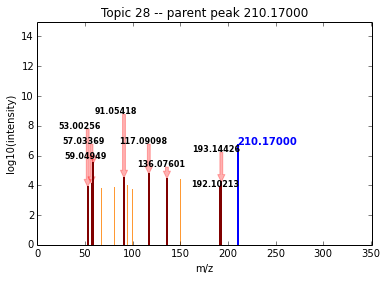

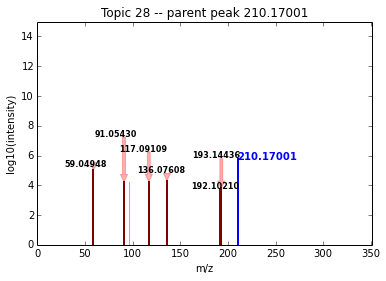

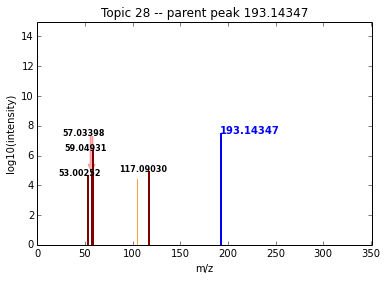

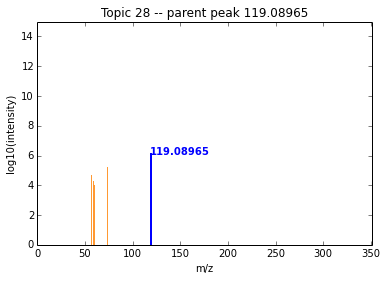

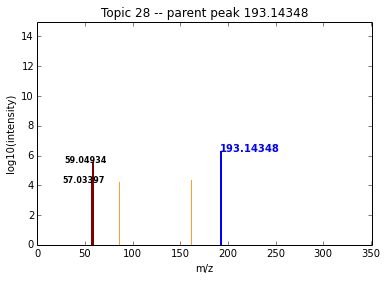

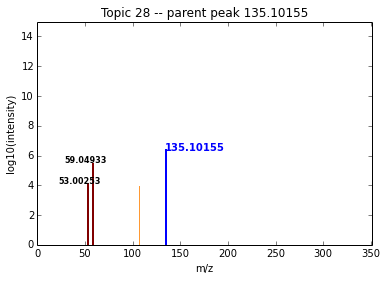

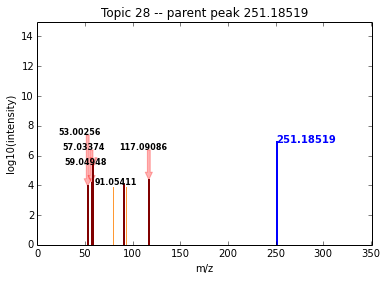

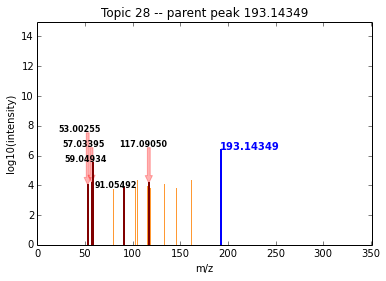

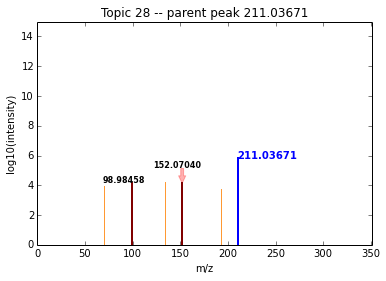

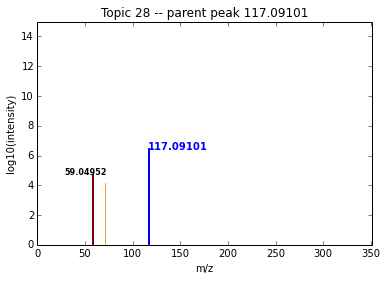

Topic 29

Parent peaks

     peakID	mz		rt		int		prob
1    1882 	538.28041	241.536		1.318e+06	0.990
2    2664 	666.51250	223.606		9.067e+05	0.989
3    2665 	666.51284	269.747		3.837e+05	0.986
4    896  	814.55313	221.946		4.271e+05	0.983
5    10494	166.12262	723.897		2.840e+07	0.979
6    743  	514.31665	205.410		5.434e+05	0.964
7    6764 	152.10694	183.681		2.184e+07	0.964
8    7017 	121.06477	183.681		3.832e+06	0.954
9    12545	180.13824	1097.680		1.671e+06	0.927
10   6755 	152.10700	259.764		3.178e+07	0.914

Fragments

1    fragment_121.06489 (0.185)
 peakID  MSnParentPeakID  mz          rt        intensity    
 13048     743            121.065035   205.149   376312.90625
 13094     896            121.064933   219.893   522078.71875
 13874    1882            121.064909   237.554   715571.12500
 14772    2664            121.064891   218.351   645368.18750
 14780    2665            121.064940   257.859   404342.62500
 19421    6755            121.064900   258.397  7514146.00000
 19456 

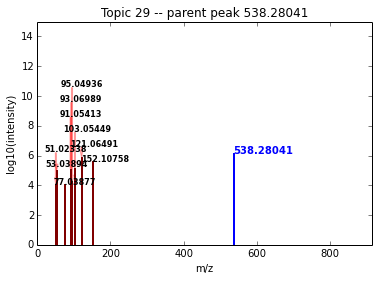

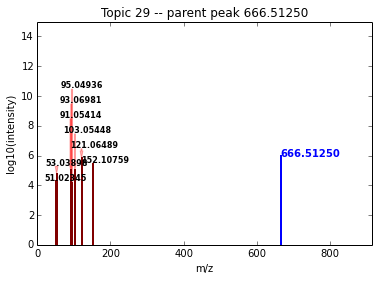

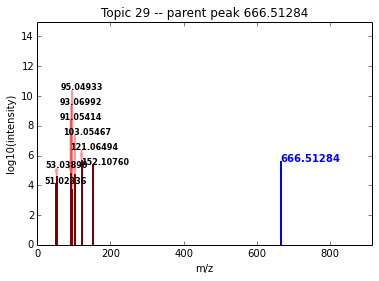

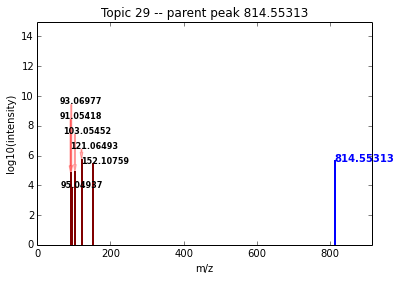

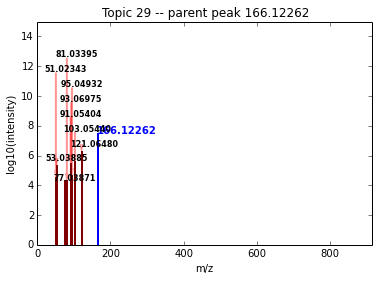

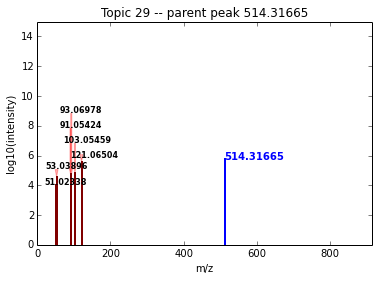

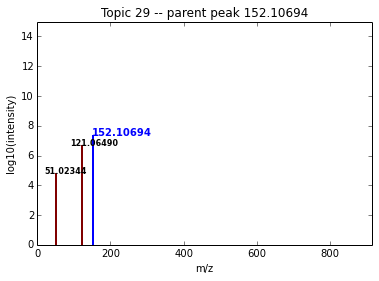

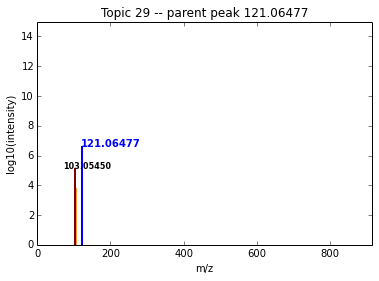

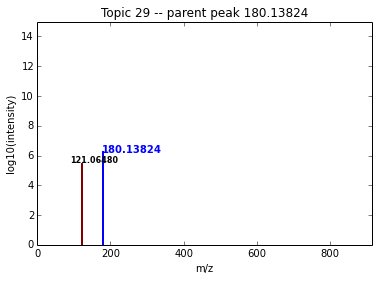

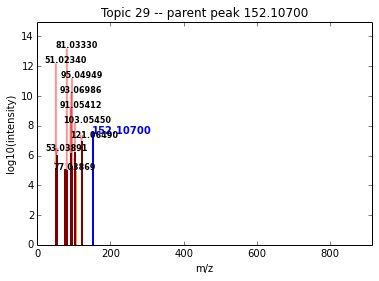

Topic 30

Parent peaks

     peakID	mz		rt		int		prob
1    670  	489.24841	210.369		4.691e+05	0.906
2    2633 	379.21151	223.606		4.963e+06	0.881
3    6284 	163.13286	259.764		4.586e+06	0.647
4    2598 	279.15900	236.531		1.055e+06	0.609
5    1488 	447.27411	236.531		7.450e+05	0.561
6    3737 	391.10004	311.220		7.994e+05	0.556
7    1754 	258.20632	224.227		6.017e+05	0.450
8    7694 	402.15072	560.934		9.338e+05	0.415
9    1527 	433.25846	238.237		9.977e+05	0.401
10   4979 	279.15459	333.702		7.684e+05	0.400

Fragments

1    fragment_57.07007 (0.375)
 peakID  MSnParentPeakID  mz         rt       intensity   
 12964    670             57.070019  211.906  13425.283203
 13513   1488             57.069973  231.289  12297.015625
 13794   1754             57.070148  222.501  27836.250000
 14538   2598             57.070036  228.433  32353.453125
 14692   2633             57.070044  220.571  82621.343750
 15747   3737             57.070069  305.151  19881.636719
 16797   4979             57.0

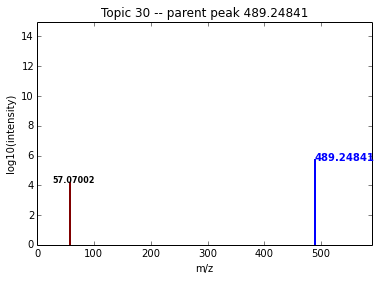

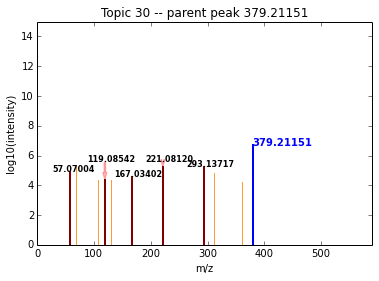

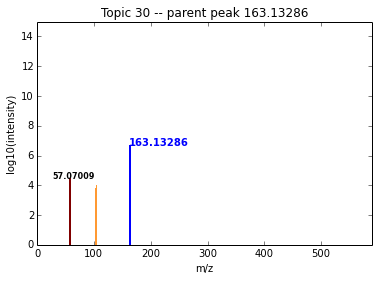

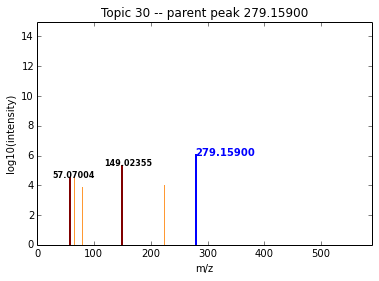

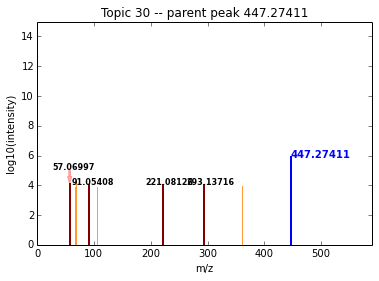

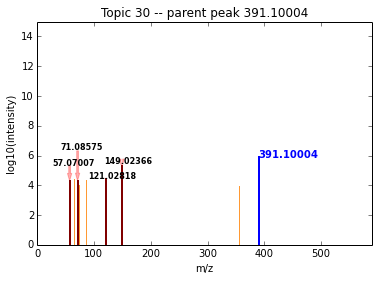

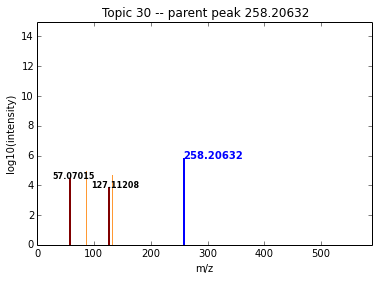

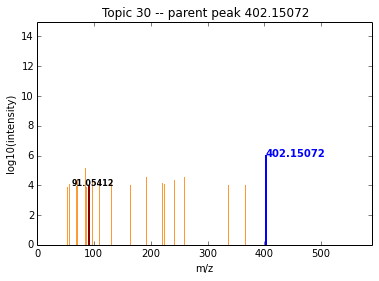

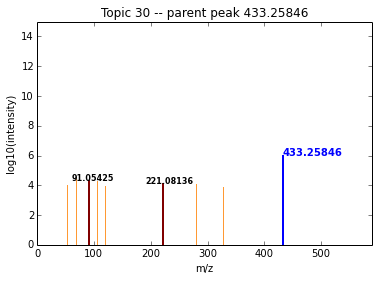

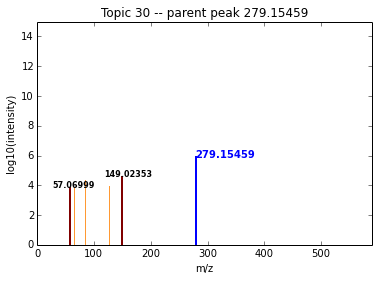

Topic 31

Parent peaks

     peakID	mz		rt		int		prob
1    10897	258.15598	1076.090		3.197e+05	0.742
2    10965	244.14033	1107.850		8.386e+05	0.741
3    10245	134.10046	876.985		1.800e+06	0.726
4    9210 	176.96148	649.151		1.029e+06	0.673
5    2811 	447.24487	290.983		5.433e+05	0.624
6    10627	257.16059	966.056		2.596e+05	0.613
7    10860	176.12221	999.442		2.659e+06	0.568
8    10248	227.15816	882.758		5.381e+05	0.497
9    7720 	176.09174	556.072		3.881e+06	0.497
10   9377 	331.14757	714.479		2.698e+05	0.474

Fragments

1    fragment_98.05999 (0.389)
 peakID  MSnParentPeakID  mz        rt        intensity
 21022    7720            98.06002   556.581  327622.50
 24854   10897            98.05993  1068.840   12004.37
 24939   10965            98.05994  1095.640   10616.89
2    fragment_71.06871 (0.065)
 peakID  MSnParentPeakID  mz        rt       intensity 
 23040    9210            71.06870  645.871    6229.271
 23883   10245            71.06870  886.824  149368.700
 23892   10248    

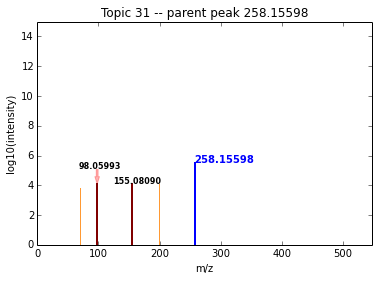

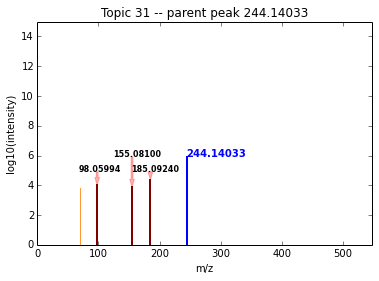

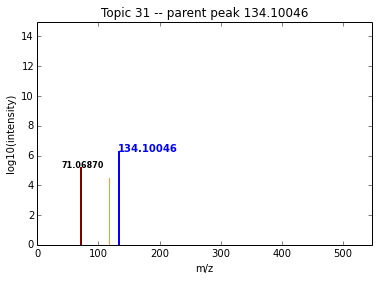

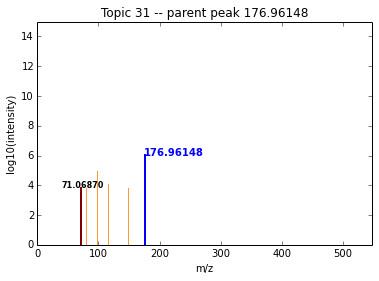

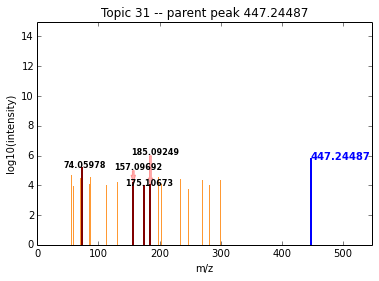

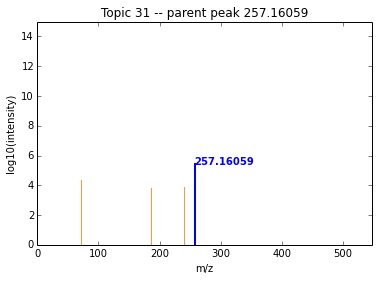

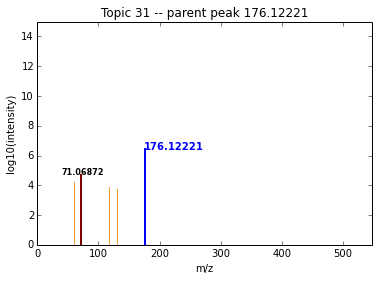

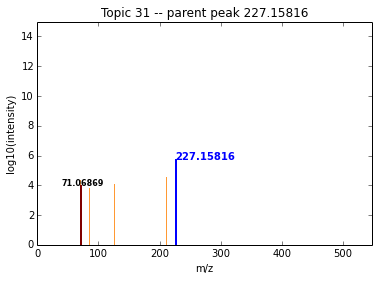

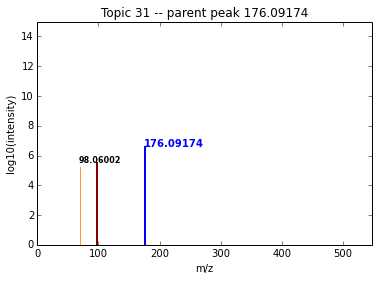

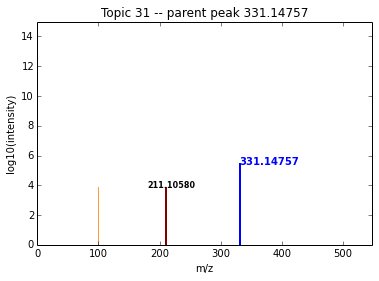

Topic 32

Parent peaks

     peakID	mz		rt		int		prob
1    6167 	265.05841	332.055		2.271e+06	0.983
2    4882 	301.11827	383.864		4.774e+06	0.956
3    6429 	366.07940	493.109		6.089e+05	0.948
4    6512 	252.08650	499.470		8.493e+05	0.642
5    4510 	211.14411	277.930		5.638e+06	0.529
6    4511 	211.14411	323.903		1.831e+06	0.526
7    4641 	309.03714	335.339		5.032e+05	0.479
8    5005 	303.13403	414.504		4.038e+06	0.477
9    10511	251.13887	911.813		6.170e+05	0.262
10   4761 	287.13889	411.438		2.518e+06	0.239

Fragments

1    fragment_206.0825 (0.067)
 peakID  MSnParentPeakID  mz          rt       intensity   
 16583   4761             206.082787  412.848  46105.898438
 16724   4882             206.082386  384.789  19619.781250
 18499   6167             206.082900  329.194  62331.360000
 19172   6512             206.081800  495.784  12027.220000
2    fragment_205.07619 (0.061)
 peakID  MSnParentPeakID  mz          rt       intensity   
 16486   4641             205.076197  334.936   722

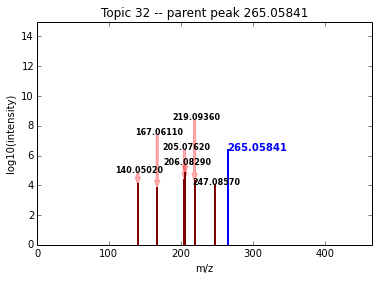

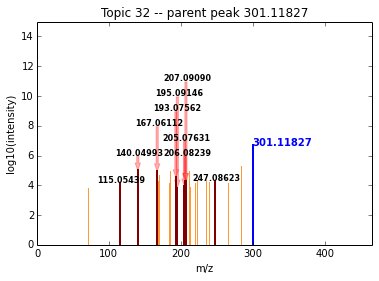

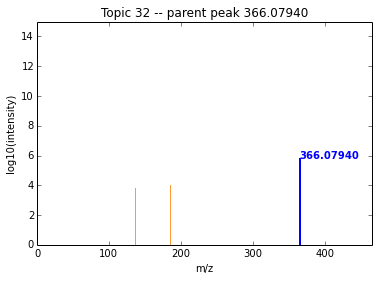

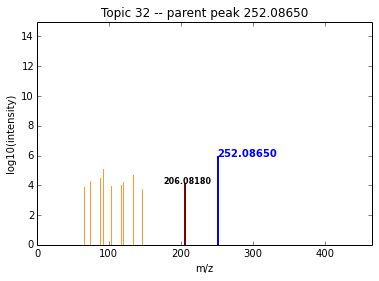

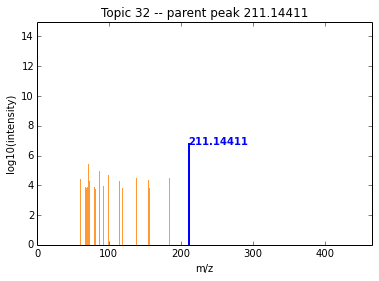

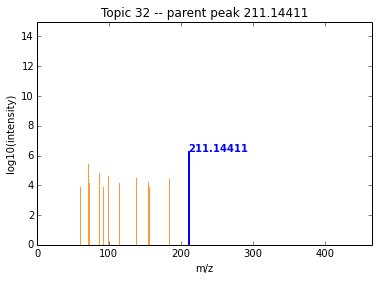

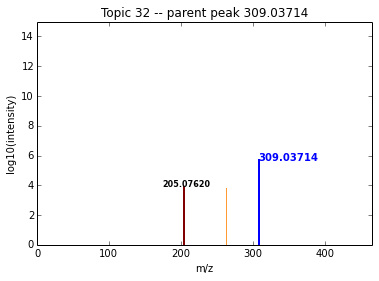

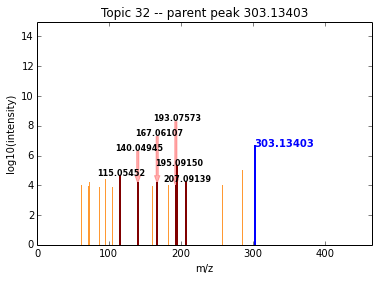

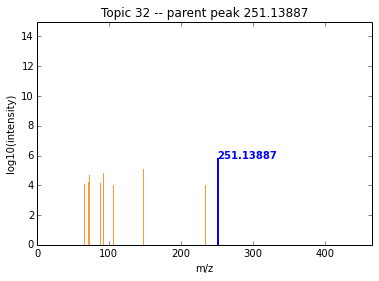

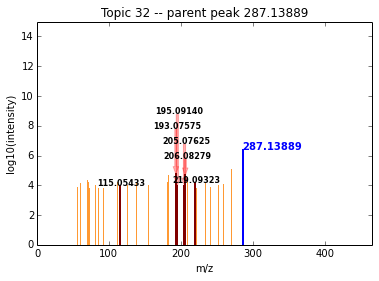

Topic 33

Parent peaks

     peakID	mz		rt		int		prob
1    7185 	145.04957	466.972		7.999e+06	0.795
2    8685 	177.10022	654.090		5.117e+05	0.766
3    10307	163.05996	668.607		2.790e+06	0.679
4    9483 	341.18127	751.107		2.857e+05	0.640
5    9957 	198.09723	696.858		7.646e+06	0.604
6    5125 	479.11858	422.465		9.422e+05	0.569
7    10405	127.03898	669.781		5.552e+06	0.548
8    9341 	504.19253	675.926		8.543e+05	0.547
9    945  	417.26345	203.748		2.925e+06	0.522
10   7161 	163.05996	513.775		1.354e+06	0.498

Fragments

1    fragment_85.02833 (0.284)
 peakID  MSnParentPeakID  mz         rt       intensity    
 16983    5125            85.028449  422.347   51996.148438
 20292    7161            85.028440  506.812   33228.940000
 20373    7185            85.028270  467.330  366473.600000
 23172    9341            85.028370  680.860  179944.900000
 23230    9483            85.028130  750.141   19927.750000
 23630    9957            85.028300  693.757   23766.030000
 23896   10307         

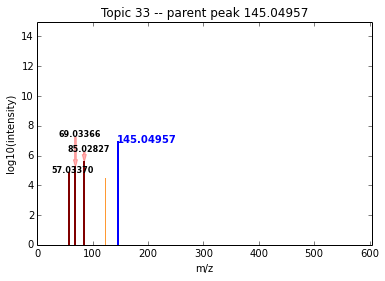

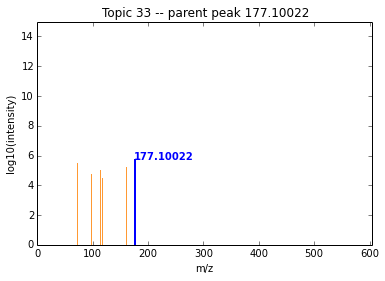

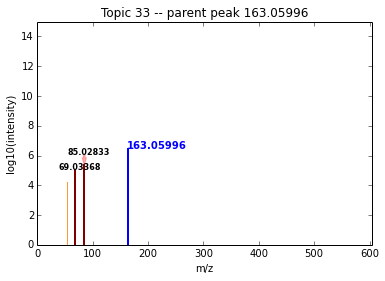

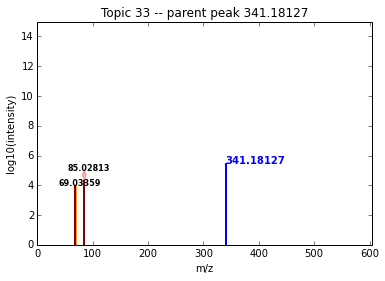

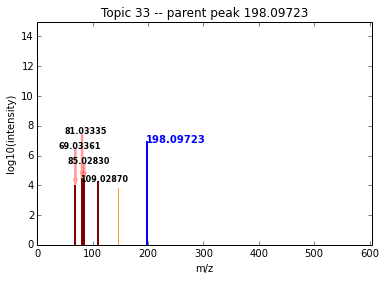

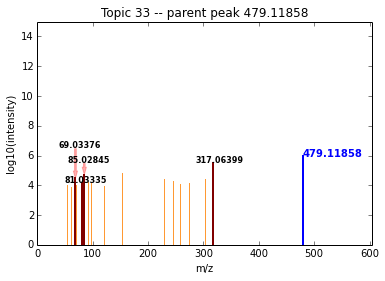

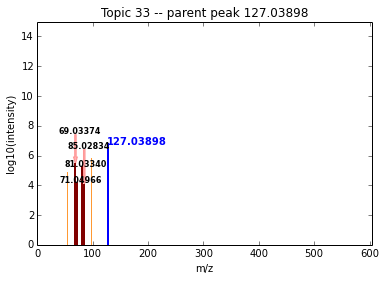

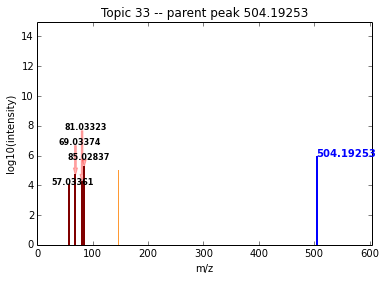

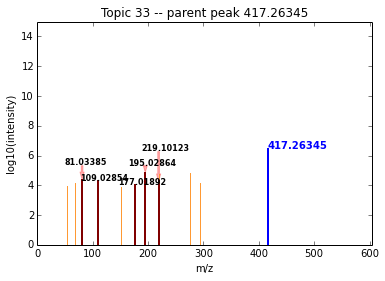

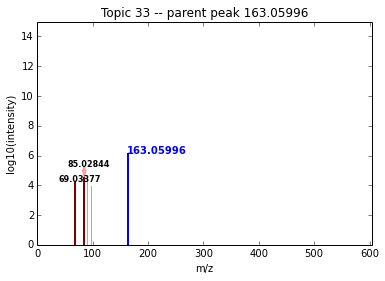

Topic 34

Parent peaks

     peakID	mz		rt		int		prob
1    3566 	181.12228	251.436		4.910e+05	0.974
2    2429 	257.04205	241.536		2.261e+06	0.957
3    2834 	241.17968	239.890		4.509e+05	0.928
4    1555 	324.21702	220.295		4.010e+05	0.911
5    3353 	295.22678	246.483		2.128e+06	0.911
6    1985 	313.23734	243.181		6.437e+05	0.905
7    3282 	213.14851	248.128		2.738e+06	0.902
8    906  	339.25308	216.950		1.582e+06	0.896
9    3459 	241.14337	248.128		4.879e+05	0.885
10   1987 	333.26348	246.483		6.679e+05	0.847

Fragments

1    fragment_67.05455 (0.143)
 peakID  MSnParentPeakID  mz         rt       intensity    
 13100    906             67.054667  214.917  162201.000000
 13899   1985             67.054515  245.247   35293.238281
 13923   1987             67.054588  244.151   43701.730469
 14307   2429             67.054533  237.270    6632.678711
 15008   2834             67.054507  238.792   22760.642578
 15194   3282             67.054513  256.880   17352.630859
 15368   3353          

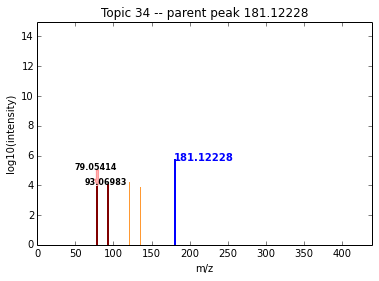

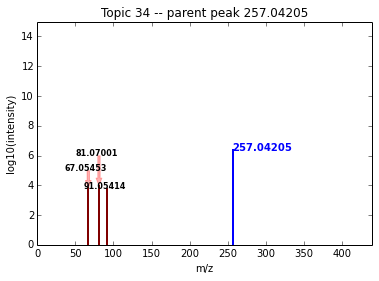

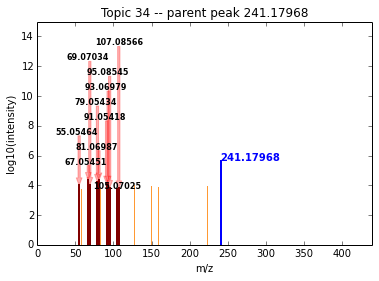

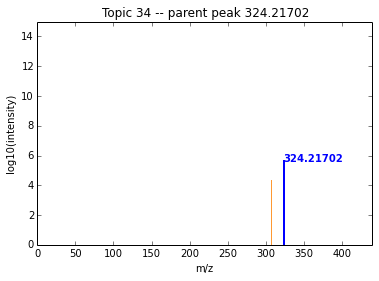

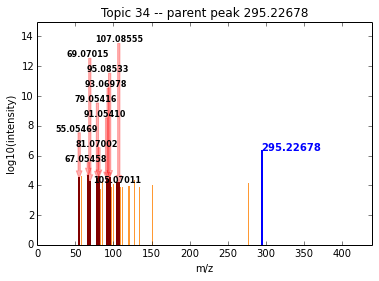

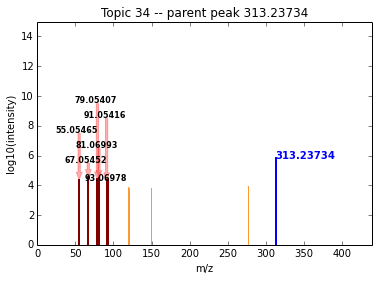

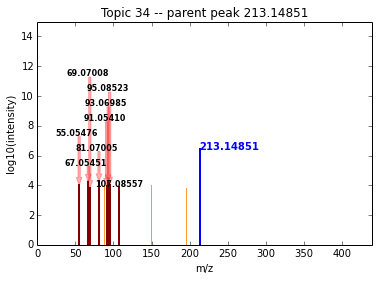

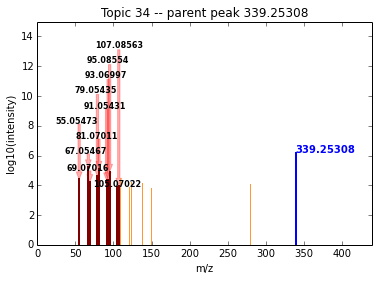

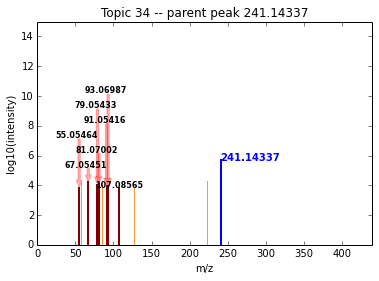

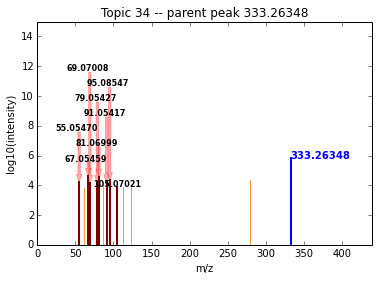

Topic 35

Parent peaks

     peakID	mz		rt		int		prob
1    1938 	417.16740	226.502		1.009e+06	0.966
2    6521 	302.12098	501.043		2.892e+06	0.924
3    10004	202.06858	728.455		2.266e+06	0.920
4    6176 	316.13673	468.549		2.403e+06	0.773
5    10180	194.10233	838.134		6.463e+05	0.602
6    10464	251.16003	636.638		9.815e+05	0.575
7    7131 	248.11261	501.043		6.653e+05	0.501
8    9729 	331.14753	797.174		7.762e+05	0.466
9    6579 	244.08150	502.727		2.463e+06	0.380
10   4709 	306.13360	281.137		2.536e+06	0.314

Fragments

1    fragment_107.04885 (0.142)
 peakID  MSnParentPeakID  mz          rt       intensity  
 16529    4709            107.048855  275.506  6962.987793
 23838   10180            107.048800  846.537  6845.666000
2    fragment_143.03192 (0.070)
 peakID  MSnParentPeakID  mz        rt       intensity
 18540    6176            143.0318  473.844  34160.55 
 19196    6521            143.0324  504.576  42400.40 
 23498    9729            143.0322  793.017  13335.82 
 23717   1000

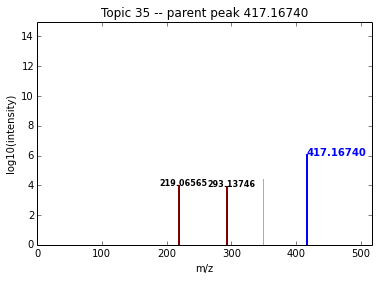

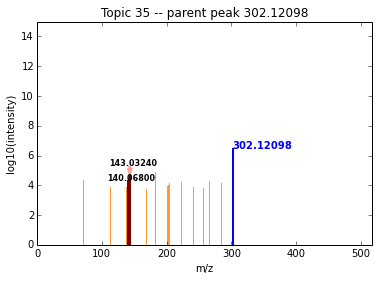

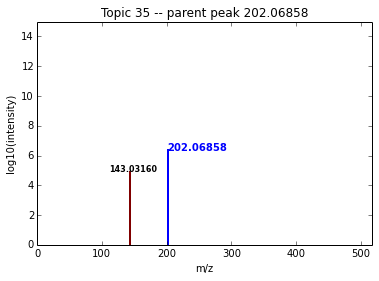

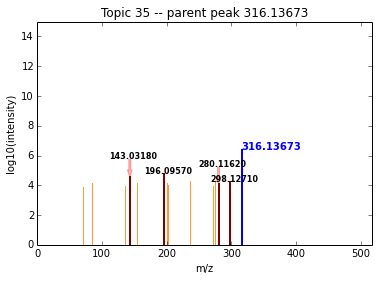

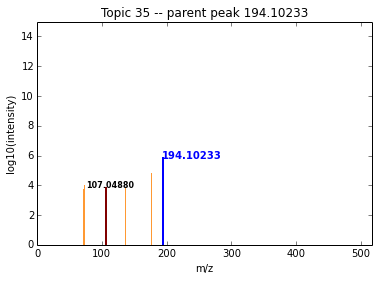

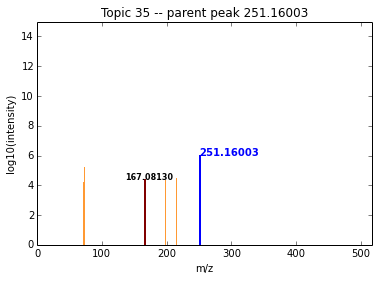

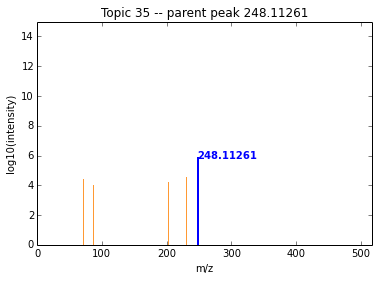

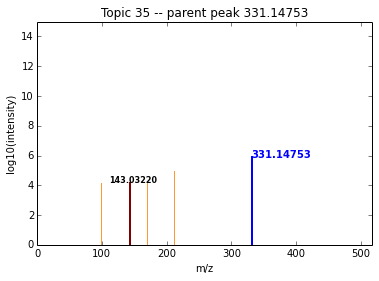

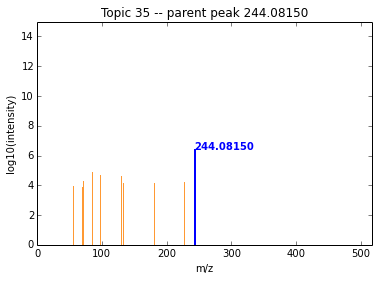

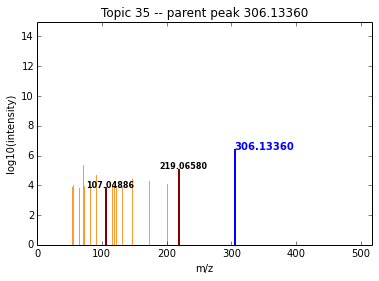

Topic 36

Parent peaks

     peakID	mz		rt		int		prob
1    9223 	846.30842	686.301		3.928e+06	0.982
2    9244 	487.16597	665.330		5.983e+06	0.964
3    8827 	1009.34530	662.160		8.002e+05	0.910
4    8734 	418.15555	655.682		9.298e+05	0.831
5    2335 	256.09666	263.096		9.271e+05	0.705
6    9224 	1008.36142	688.576		1.930e+06	0.694
7    9222 	684.25554	678.367		1.761e+07	0.601
8    9148 	991.33424	689.621		7.546e+05	0.545
9    7108 	146.11755	486.862		2.432e+06	0.545
10   8068 	286.11303	597.184		2.129e+06	0.447

Fragments

1    fragment_73.02851 (0.142)
 peakID  MSnParentPeakID  mz        rt       intensity
 21751   8068             73.02848  591.773   8839.911
 22631   8827             73.02849  657.976  18785.570
 23027   9148             73.02851  686.836   9632.896
 23068   9224             73.02857  696.363  34005.510
2    fragment_85.02833 (0.133)
 peakID  MSnParentPeakID  mz        rt       intensity 
 21748   8068             85.02836  591.773    21115.80
 22553   8734          

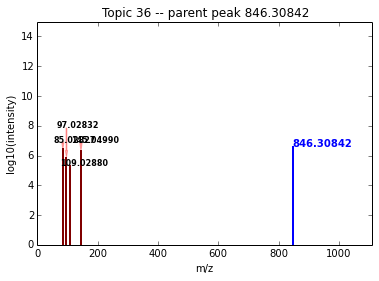

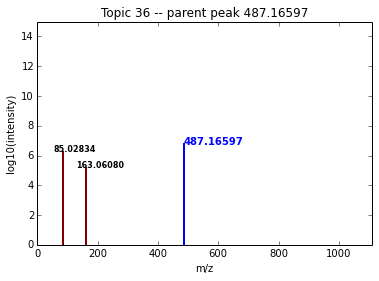

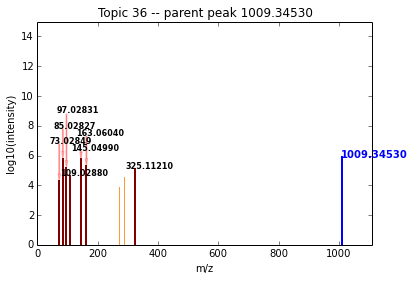

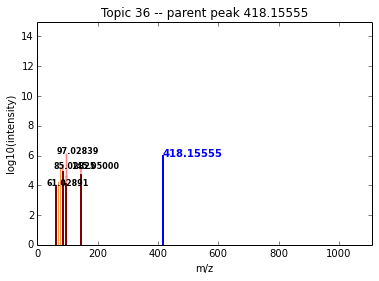

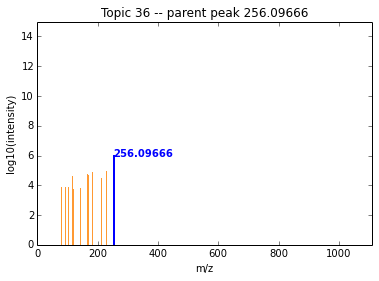

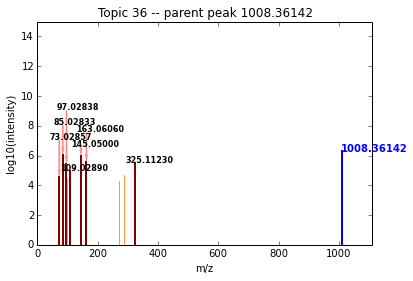

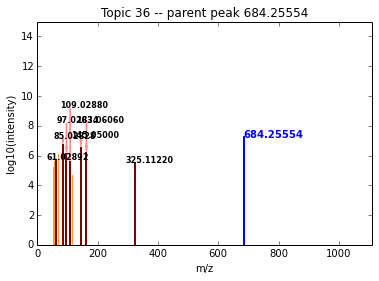

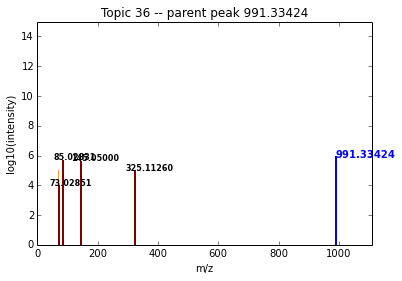

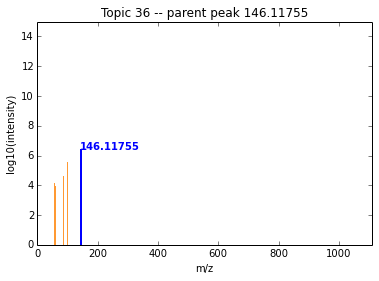

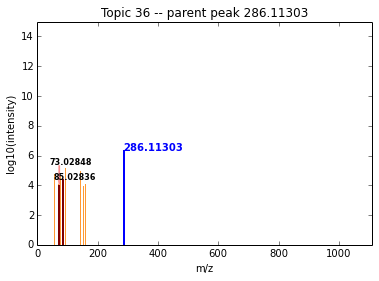

Topic 37

Parent peaks

     peakID	mz		rt		int		prob
1    8886 	272.13516	669.781		5.689e+05	0.916
2    6834 	111.11681	183.681		5.097e+05	0.914
3    800  	378.26370	205.410		1.458e+06	0.900
4    8469 	288.10539	633.586		1.248e+06	0.825
5    7200 	199.16923	196.185		1.062e+06	0.762
6    1386 	394.25876	208.697		5.095e+06	0.733
7    4402 	287.22154	229.964		3.431e+06	0.682
8    7107 	146.11757	274.685		3.829e+07	0.631
9    7419 	304.10025	554.431		8.592e+05	0.594
10   7215 	104.07060	403.273		1.792e+07	0.535

Fragments

1    fragment_69.07013 (0.433)
 peakID  MSnParentPeakID  mz         rt       intensity    
 13085    800             69.070079  203.485    7062.980469
 13486   1386             69.070103  217.510    8741.642578
 16307   4402             69.070185  240.164  122567.015625
 19674   6834             69.070200  176.823   33662.210000
 20188   7107             69.070160  281.408  469170.100000
 20486   7200             69.070100  204.160   54162.250000
 20754   7419          

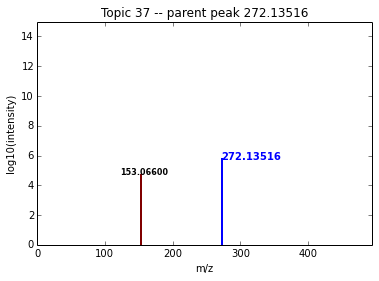

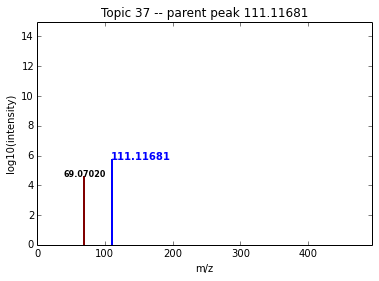

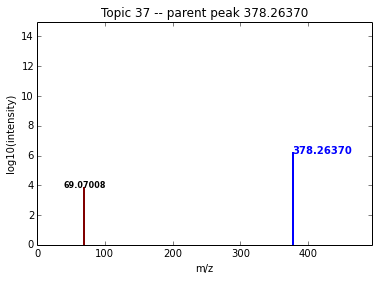

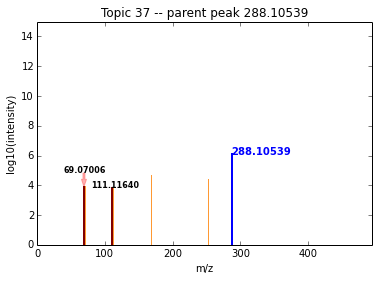

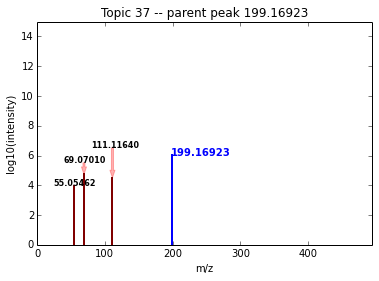

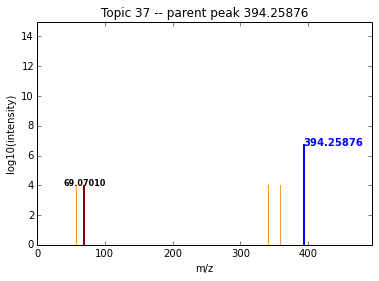

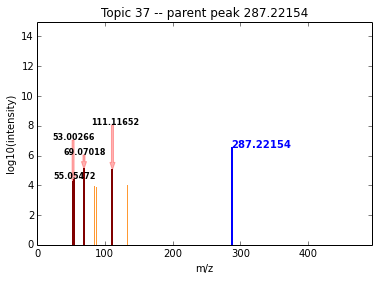

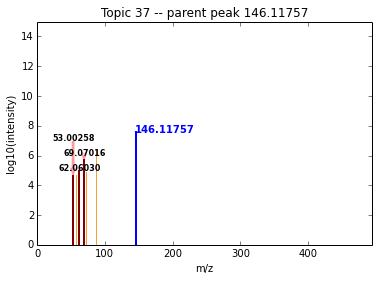

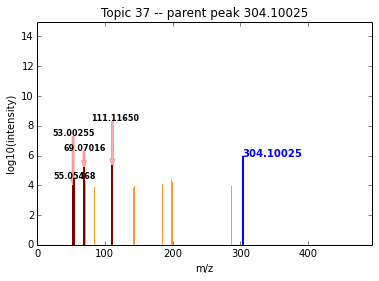

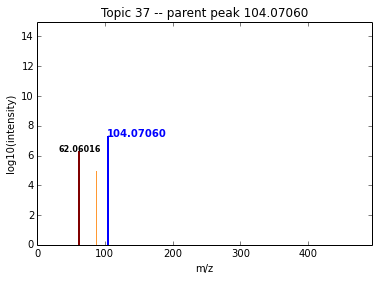

Topic 38

Parent peaks

     peakID	mz		rt		int		prob
1    10532	291.16317	729.738		5.737e+06	0.908
2    10467	306.16862	636.638		2.560e+06	0.893
3    10531	291.16316	593.907		4.721e+06	0.840
4    10503	276.15795	636.638		1.591e+06	0.807
5    10022	363.18438	791.985		1.081e+06	0.795
6    10521	372.18967	636.638		2.905e+06	0.706
7    10522	372.18974	617.886		2.403e+06	0.701
8    6414 	291.08388	465.402		2.522e+07	0.664
9    6523 	469.20801	494.747		1.176e+06	0.597
10   10504	276.15782	595.502		9.881e+05	0.575

Fragments

1    fragment_98.05999 (0.085)
 peakID  MSnParentPeakID  mz        rt       intensity
 19001    6414            98.06002  464.416   46426.80
 19230    6523            98.05997  491.420   58920.72
 23722   10022            98.06017  798.207   47007.54
 24123   10467            98.06005  639.006   91026.58
 24220   10503            98.06005  633.998   42834.98
 24247   10504            98.05998  602.709   24215.68
 24427   10521            98.05994  652.836   54923.62
 24

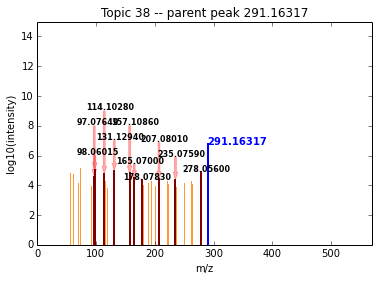

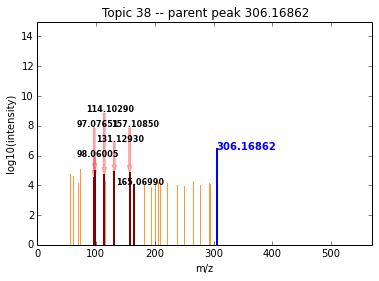

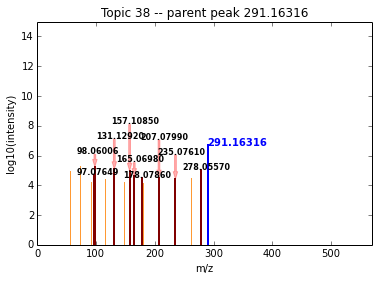

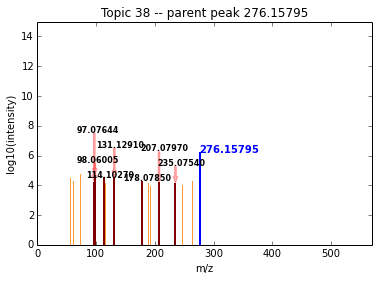

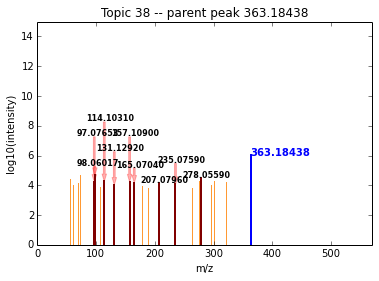

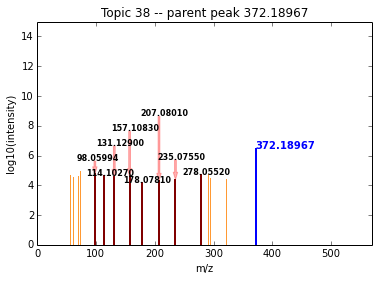

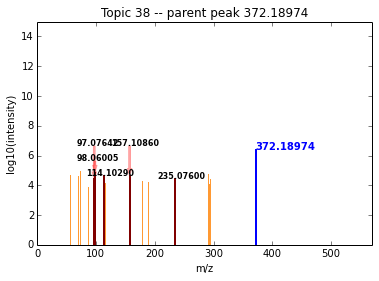

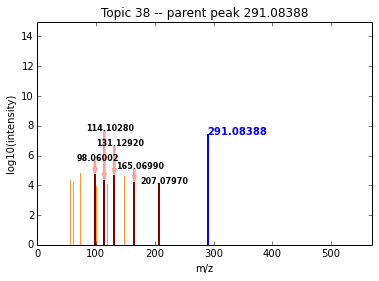

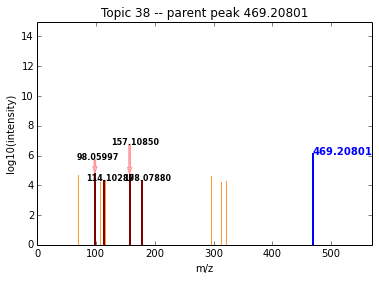

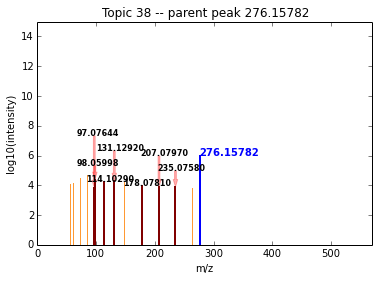

Topic 39

Parent peaks

     peakID	mz		rt		int		prob
1    7114 	157.06078	510.582		3.818e+07	0.988
2    7035 	126.06624	479.488		2.470e+07	0.963
3    6191 	198.08732	479.488		9.729e+05	0.959
4    6785 	195.08766	510.582		1.231e+06	0.919
5    495  	139.05018	187.597		2.665e+05	0.914
6    6603 	242.11342	479.488		1.550e+07	0.892
7    10451	156.07680	668.607		3.111e+06	0.848
8    10449	156.07677	620.990		1.158e+08	0.816
9    6443 	483.22023	479.488		1.048e+06	0.759
10   6888 	143.08151	501.043		7.521e+06	0.722

Fragments

1    fragment_83.06042 (0.163)
 peakID  MSnParentPeakID  mz        rt       intensity 
 18569    6191            83.06043  478.954    45734.14
 19074    6443            83.06039  479.233    41134.05
 19335    6603            83.06052  482.807   250834.60
 19553    6785            83.06043  508.935    22481.62
 19686    6888            83.06034  507.891    13182.40
 20211    7114            83.06044  514.047  2422468.00
 24087   10449            83.06039  627.643  216626

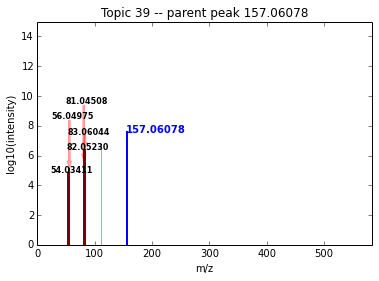

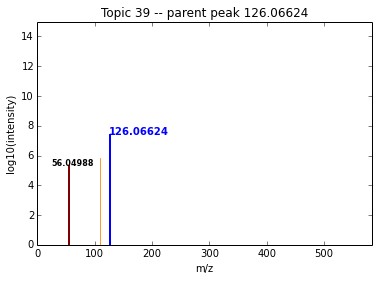

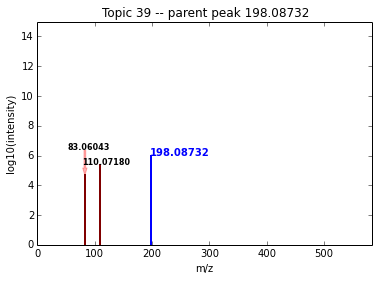

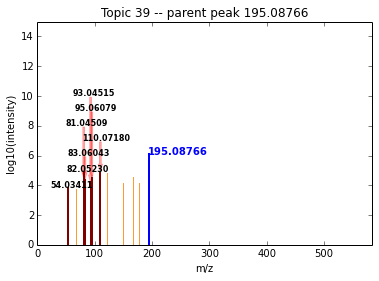

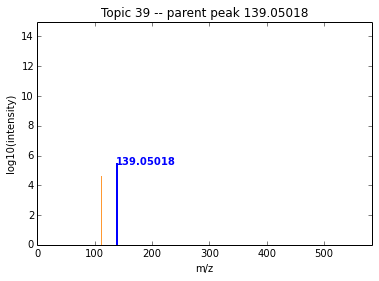

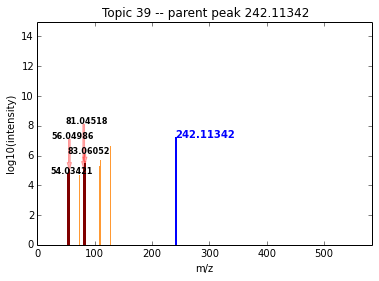

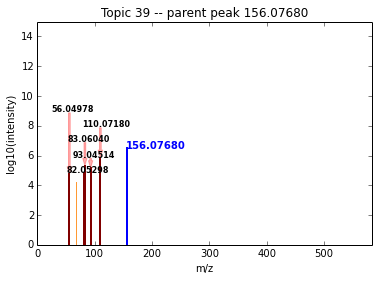

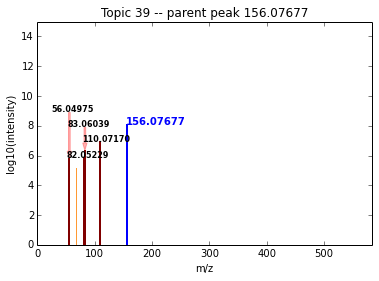

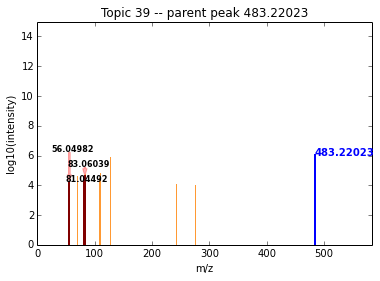

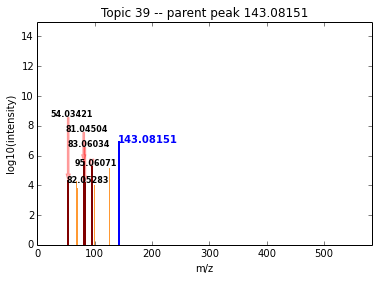

Topic 40

Parent peaks

     peakID	mz		rt		int		prob
1    5733 	124.03935	335.339		4.551e+06	0.914
2    924  	708.51148	220.295		6.086e+05	0.768
3    6824 	529.17571	513.775		1.126e+06	0.630
4    1144 	680.48034	221.946		1.786e+06	0.561
5    1741 	663.45372	221.946		2.136e+06	0.557
6    7700 	81.03351	565.722		6.438e+05	0.487
7    7157 	127.03897	346.733		5.574e+05	0.479
8    7034 	121.06480	515.409		5.223e+05	0.477
9    3885 	105.06974	241.536		7.094e+05	0.465
10   5974 	98.06006	390.305		1.501e+06	0.447

Fragments

1    fragment_53.03889 (0.776)
 peakID  MSnParentPeakID  mz         rt       intensity    
 13301   1144             53.038841  216.680   17510.404297
 13787   1741             53.038900  216.827   28149.849609
 15831   3885             53.039006  239.067    9623.726562
 17831   5733             53.038857  337.263   36673.011719
 18175   5974             53.038917  371.981    9726.995117
 19945   7034             53.038910  510.461   21018.830000
 20285   7157            

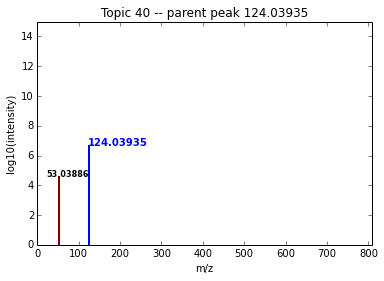

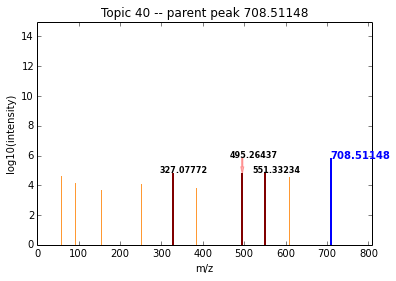

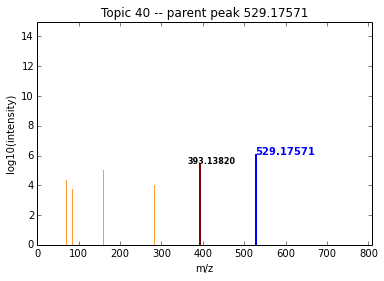

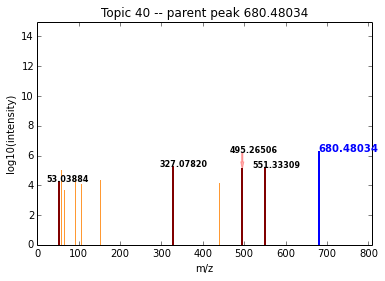

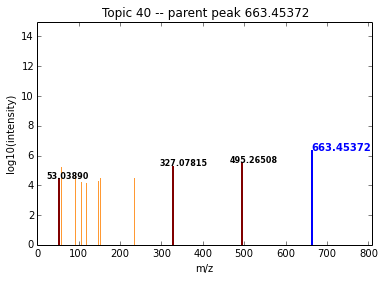

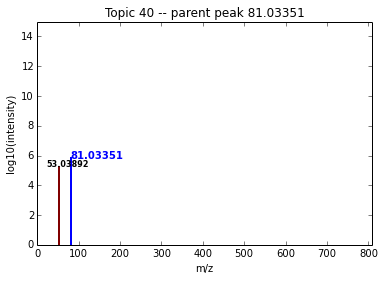

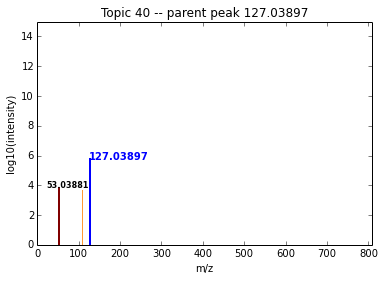

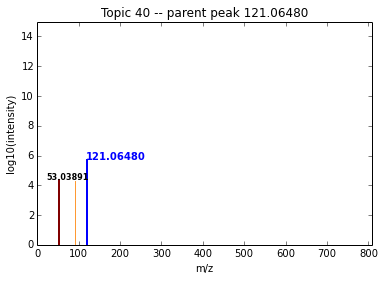

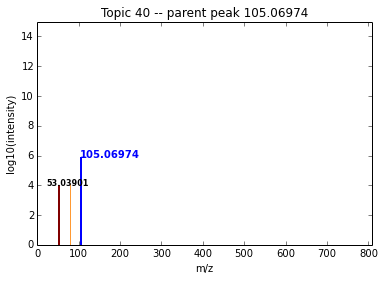

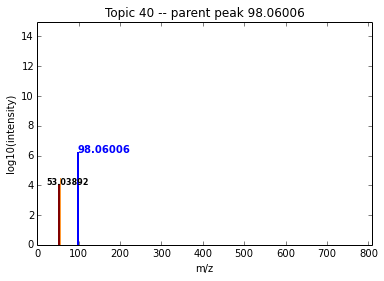

Topic 41

Parent peaks

     peakID	mz		rt		int		prob
1    7174 	280.13888	501.043		6.737e+07	0.961
2    8957 	219.13393	670.770		1.612e+06	0.959
3    9094 	851.26363	685.059		1.015e+06	0.946
4    7701 	84.08074	565.722		1.012e+06	0.928
5    2229 	425.13602	241.536		4.185e+06	0.902
6    10898	203.15030	1065.250		3.887e+05	0.810
7    10381	175.14411	842.825		1.179e+07	0.802
8    10411	189.15968	859.763		5.535e+07	0.792
9    7060 	190.10734	328.784		5.665e+06	0.759
10   11289	413.21290	1051.830		7.377e+05	0.726

Fragments

1    fragment_84.08071 (0.159)
 peakID  MSnParentPeakID  mz        rt        intensity  
 20345    7174            84.08072   512.680   120561.100
 22914    8957            84.08067   667.654   271942.600
 24003   10381            84.08070   847.162  1674367.000
 24050   10411            84.08076   861.865  8671687.000
 24872   10898            84.08067  1071.800     7240.309
 25090   11289            84.08077  1046.990    21906.620
2    fragment_67.05455 (0.096)
 peak

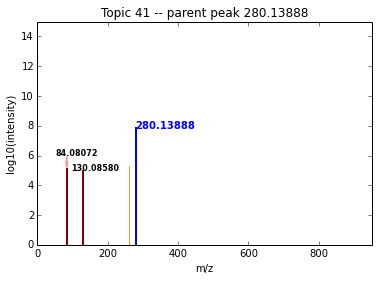

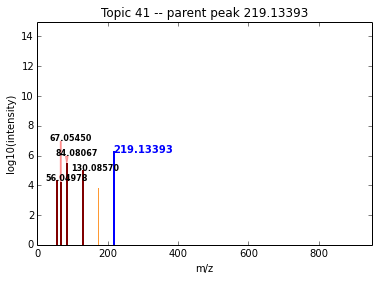

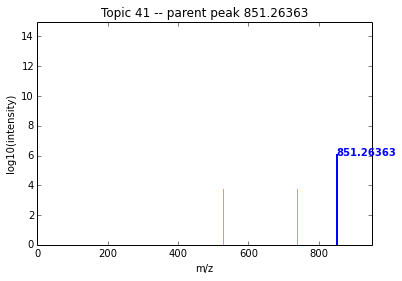

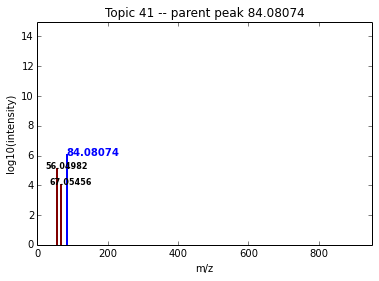

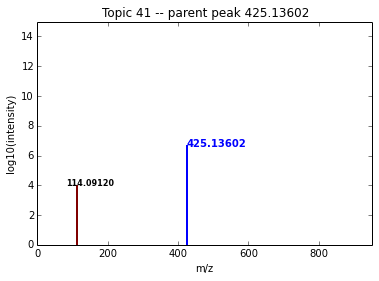

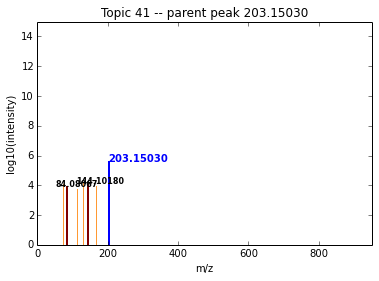

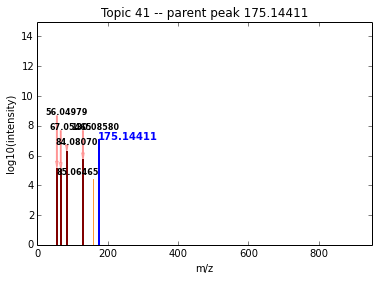

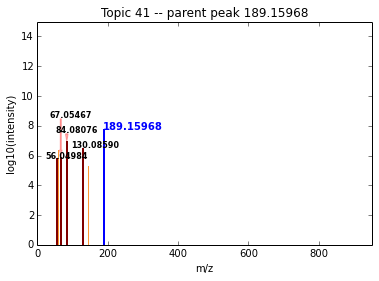

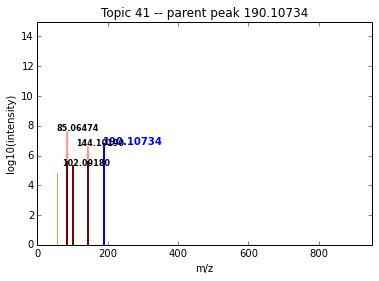

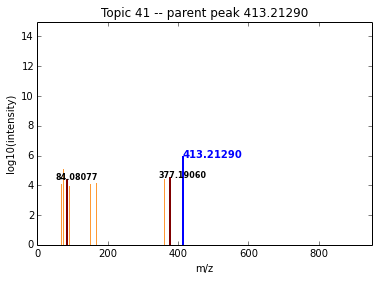

Topic 42

Parent peaks

     peakID	mz		rt		int		prob
1    781  	327.19533	208.697		7.372e+05	0.911
2    977  	408.27431	207.039		8.984e+06	0.904
3    6783 	180.10183	438.661		5.660e+05	0.754
4    5348 	180.08794	443.301		1.570e+06	0.695
5    7787 	296.09899	567.280		1.017e+06	0.562
6    6780 	180.10185	486.862		6.798e+06	0.428
7    7193 	180.08662	465.402		4.349e+06	0.337
8    1870 	331.19034	210.369		7.099e+06	0.320
9    4374 	220.11798	353.265		2.288e+06	0.313
10   927  	265.14325	207.039		2.463e+06	0.260

Fragments

1    fragment_117.07034 (0.099)
 peakID  MSnParentPeakID  mz          rt       intensity   
 13070    781             117.070337  206.497   6944.425781
 13161    927             117.070377  203.344  25399.958984
 17117   5348             117.070162  439.486  14024.274414
 19497   6780             117.070200  488.656  43121.980000
 19518   6783             117.070700  436.917  10946.390000
 20408   7193             117.070400  473.982  11899.110000
2    fragment_115.0543

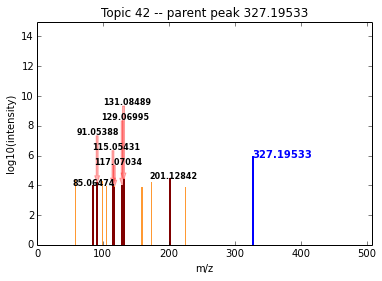

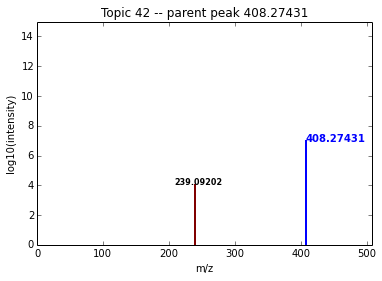

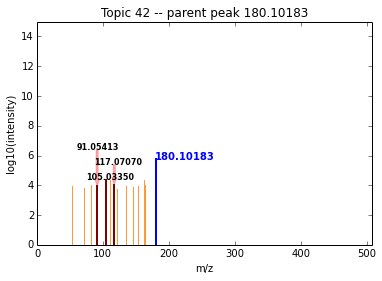

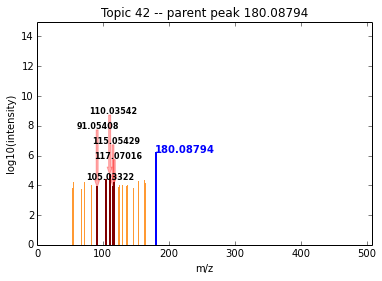

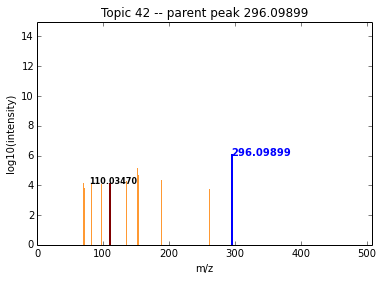

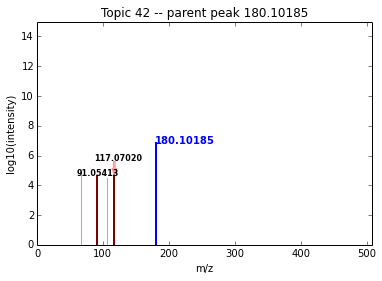

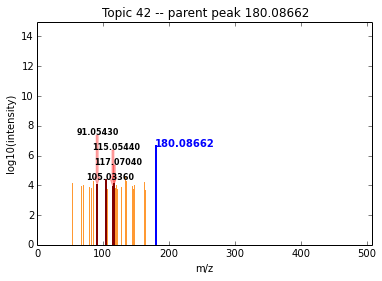

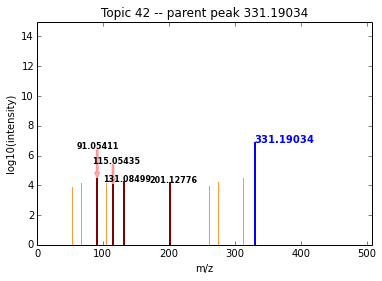

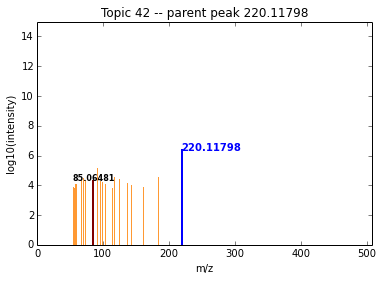

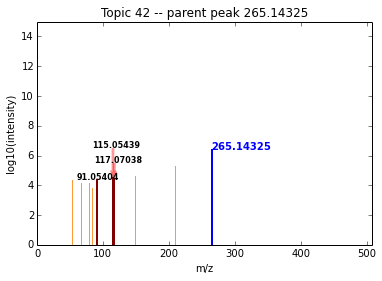

Topic 43

Parent peaks

     peakID	mz		rt		int		prob
1    12752	265.15453	1145.810		4.082e+05	0.977
2    8702 	498.26006	619.436		2.220e+06	0.882
3    2650 	540.27088	263.096		5.566e+06	0.739
4    3579 	369.11816	290.983		4.275e+05	0.738
5    2287 	540.33066	274.685		5.148e+05	0.709
6    8088 	307.17645	565.722		1.986e+06	0.609
7    8204 	307.09988	614.695		1.755e+06	0.544
8    8318 	323.17141	565.722		1.952e+06	0.462
9    6397 	146.08117	471.593		6.029e+06	0.423
10   7625 	260.11272	543.289		1.364e+07	0.245

Fragments

1    fragment_89.03862 (0.102)
 peakID  MSnParentPeakID  mz         rt        intensity    
 14158    2287            89.038674   274.145  333513.281250
 14723    2650            89.038643   271.813  459883.218750
 15623    3579            89.038588   292.200   89281.671875
 21798    8088            89.038580   573.652  147716.100000
 21855    8204            89.038590   612.455   91483.410000
 21964    8318            89.038600   558.501  218118.100000
 22512    8702 

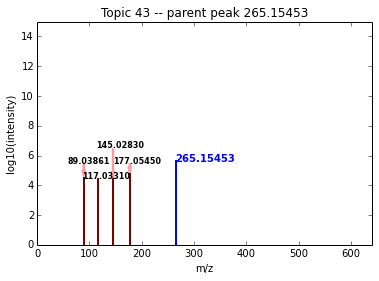

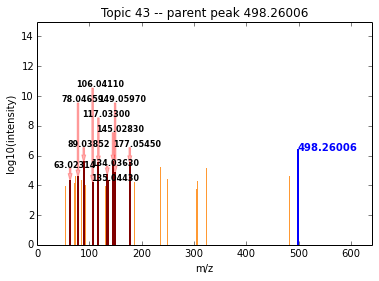

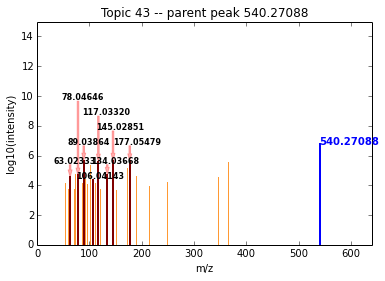

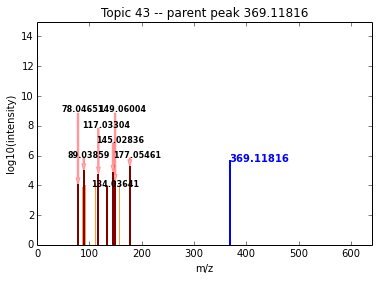

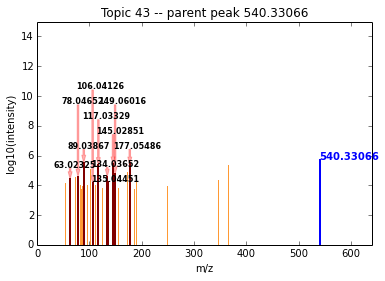

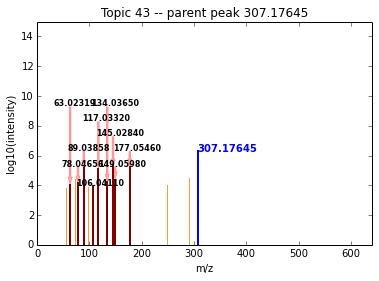

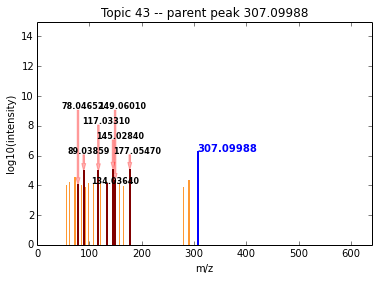

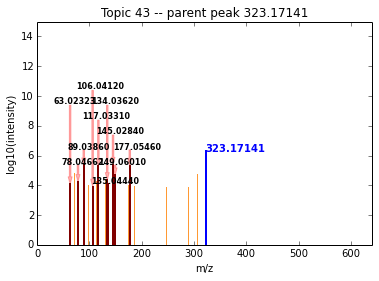

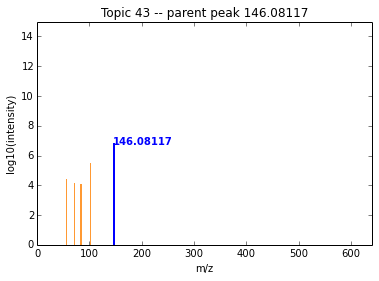

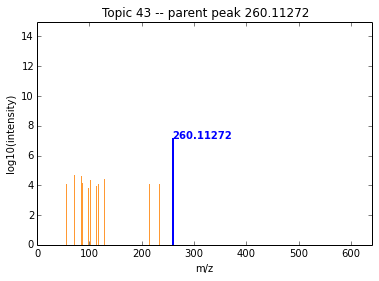

Topic 44

Parent peaks

     peakID	mz		rt		int		prob
1    7241 	236.16836	532.509		4.792e+07	0.976
2    7311 	235.16508	532.509		4.462e+08	0.974
3    7234 	352.24414	531.443		5.502e+06	0.962
4    12207	104.10696	988.951		1.220e+07	0.960
5    12147	76.07570	1027.180		1.509e+06	0.959
6    7762 	118.08616	532.509		1.592e+09	0.949
7    10539	204.14012	929.629		5.989e+05	0.948
8    6283 	160.13321	465.402		1.746e+07	0.933
9    10153	236.14916	864.146		3.279e+05	0.904
10   8559 	420.16289	635.166		7.706e+06	0.843

Fragments

1    fragment_58.06553 (0.324)
 peakID  MSnParentPeakID  mz        rt        intensity   
 18639    6283            58.06561   464.570  9.413883e+05
 20540    7234            58.06554   527.307  1.129891e+05
 20542    7241            58.06554   527.167  1.472402e+06
 20661    7311            58.06557   517.855  1.309686e+05
 21142    7762            58.06555   528.379  1.078854e+08
 22241    8559            58.06548   627.950  1.635345e+04
 25135   12147            58.0

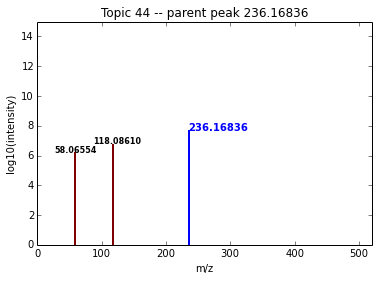

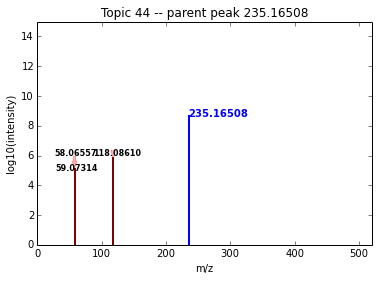

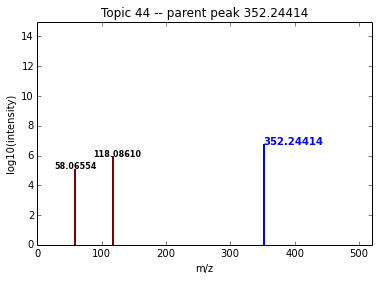

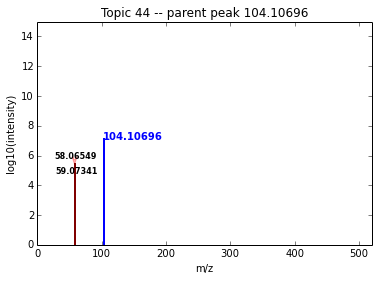

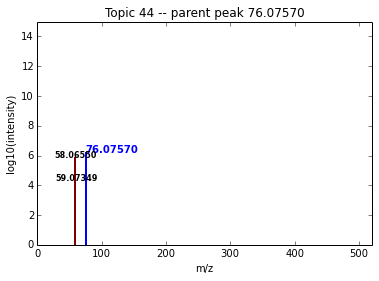

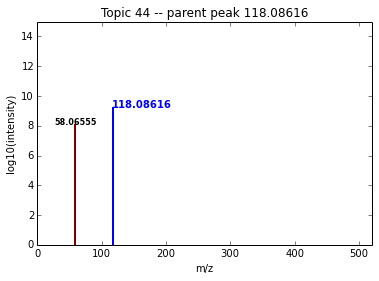

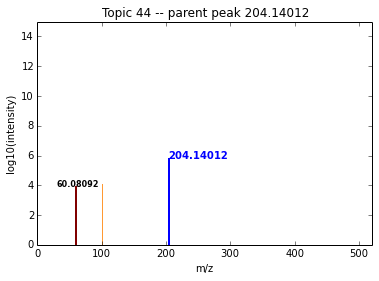

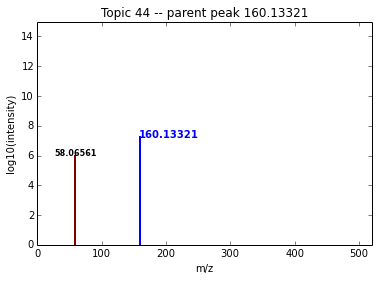

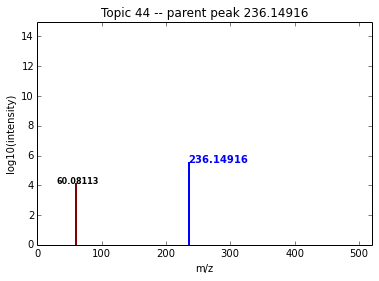

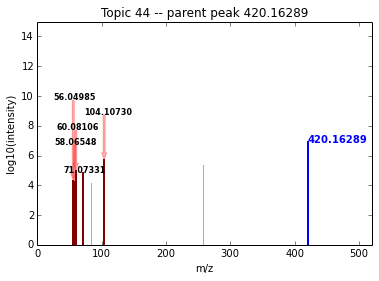

Topic 45

Parent peaks

     peakID	mz		rt		int		prob
1    5896 	162.09132	377.378		4.903e+06	0.928
2    6139 	249.08444	428.854		6.401e+05	0.898
3    7822 	311.12365	570.233		6.113e+05	0.868
4    4202 	218.08116	325.502		4.427e+05	0.811
5    2151 	308.18565	233.227		2.509e+06	0.808
6    5767 	236.09166	349.996		7.211e+05	0.801
7    8845 	238.03790	668.607		4.814e+05	0.729
8    4200 	218.08119	277.930		1.308e+06	0.722
9    5762 	236.09164	380.610		1.328e+06	0.720
10   5897 	162.09133	336.992		4.985e+06	0.656

Fragments

1    fragment_91.05413 (0.123)
 peakID  MSnParentPeakID  mz         rt       intensity    
 14074   2151             91.054072  229.339   98065.476562
 16045   4200             91.054050  275.367   17460.785156
 16111   4202             91.054088  322.399    6007.551758
 17842   5762             91.054252  375.057   36507.812500
 17906   5767             91.054149  357.731   20993.363281
 18069   5896             91.054242  376.427  107004.164062
 18084   5897          

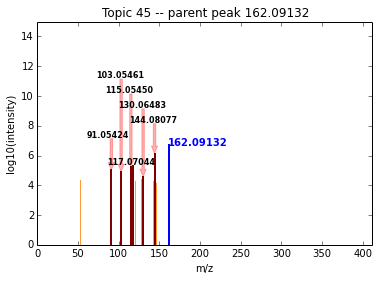

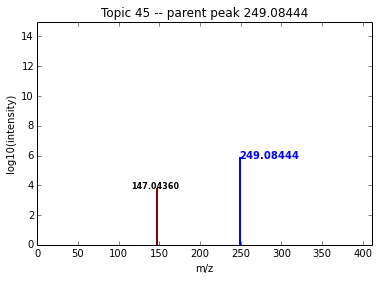

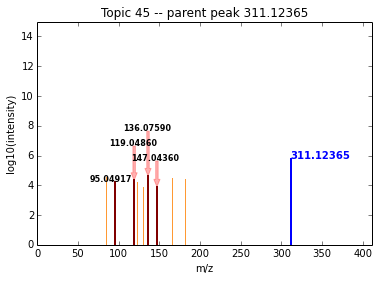

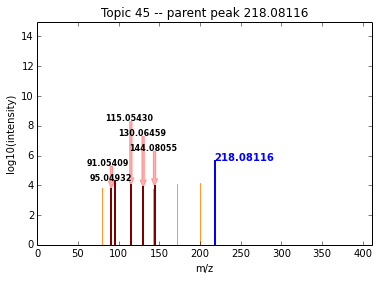

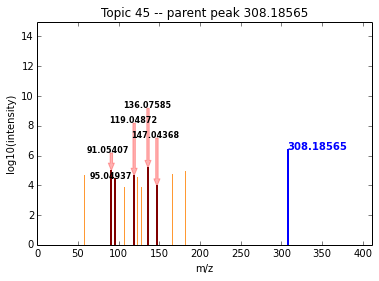

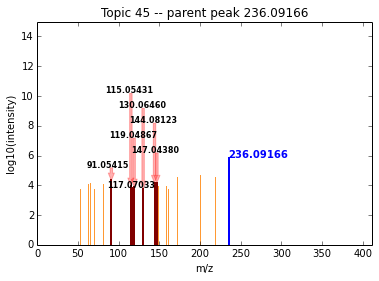

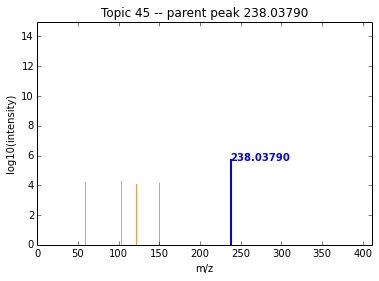

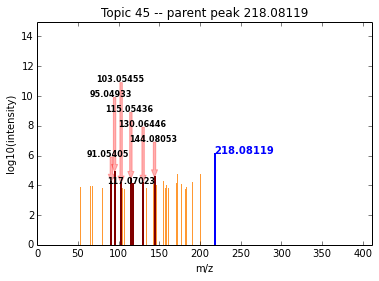

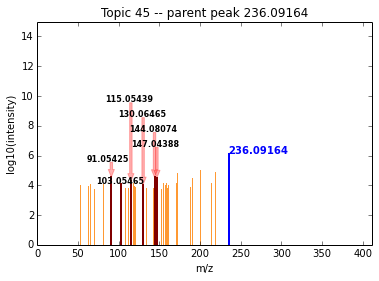

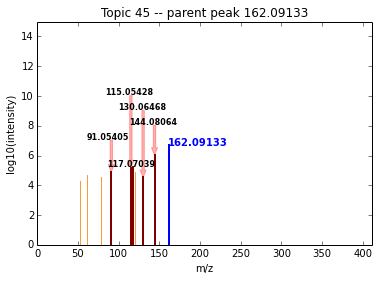

Topic 46

Parent peaks

     peakID	mz		rt		int		prob
1    8582 	546.68913	611.450		1.029e+06	0.742
2    8868 	364.79490	636.638		5.664e+06	0.685
3    8869 	364.79478	611.450		2.669e+06	0.680
4    8577 	374.79834	645.990		1.258e+06	0.563
5    5524 	298.09687	412.921		3.007e+07	0.546
6    8564 	561.69431	619.436		8.725e+05	0.507
7    8576 	374.79834	622.592		5.219e+06	0.480
8    8082 	374.79827	597.184		2.910e+06	0.450
9    5712 	252.10897	440.293		3.172e+07	0.433
10   5361 	282.11954	388.706		5.561e+06	0.415

Fragments

1    fragment_136.06241 (0.180)
 peakID  MSnParentPeakID  mz          rt       intensity   
 17172   5361             136.062283  389.093  1972014.2500
 17311   5524             136.062408  406.948   902816.6875
 17786   5712             136.062379  442.133  9695964.0000
 21785   8082             136.062400  590.594   211645.4000
 22243   8564             136.062400  596.377   284565.7000
 22282   8576             136.062600  615.519   340990.1000
 22303   8577         

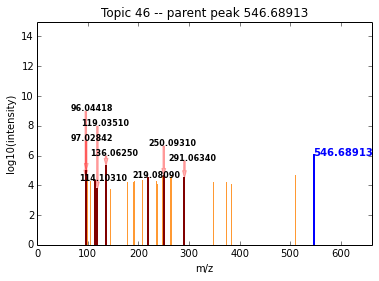

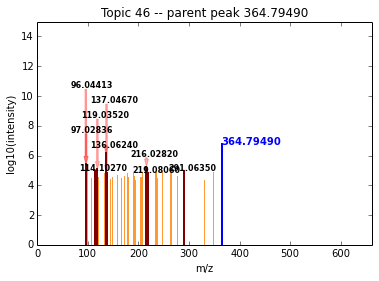

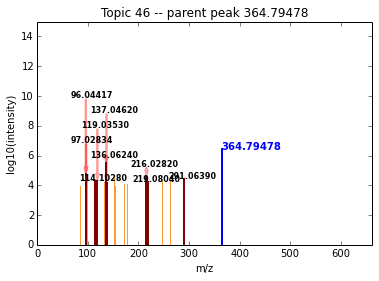

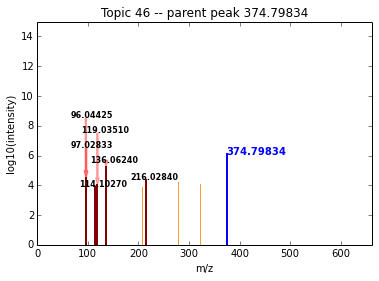

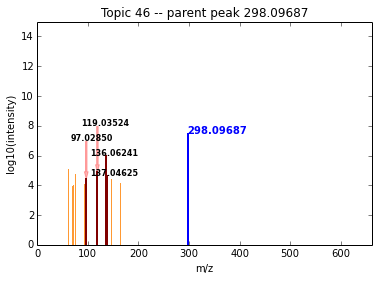

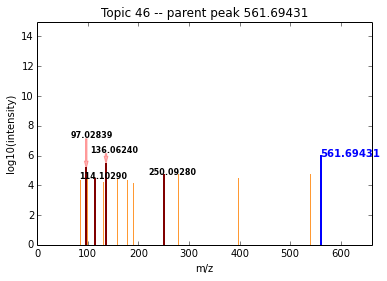

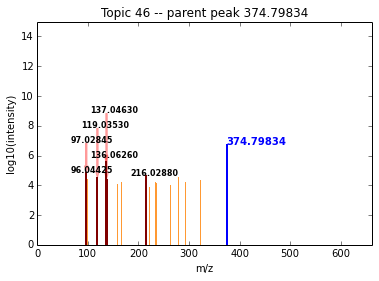

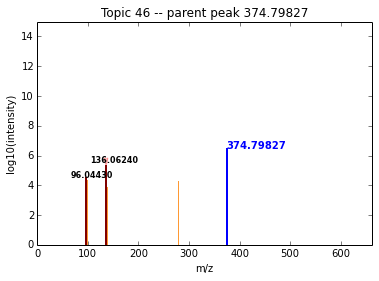

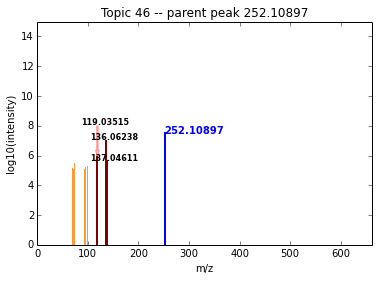

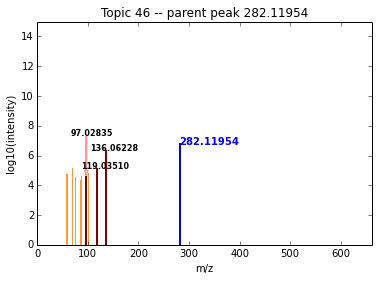

Topic 47

Parent peaks

     peakID	mz		rt		int		prob
1    7089 	294.15452	435.357		3.415e+07	0.614
2    7087 	294.15451	471.593		6.581e+07	0.502
3    7093 	456.20753	509.007		5.460e+06	0.499
4    3171 	553.30974	297.637		6.032e+05	0.484
5    7157 	127.03897	346.733		5.574e+05	0.468
6    6723 	261.14447	459.215		6.398e+05	0.347
7    5734 	127.05023	414.504		2.761e+07	0.324
8    7095 	502.24956	517.032		1.136e+06	0.277
9    1754 	258.20632	224.227		6.017e+05	0.259
10   7088 	294.15460	380.610		1.715e+06	0.259

Fragments

1    fragment_132.10161 (0.144)
 peakID  MSnParentPeakID  mz          rt       intensity     
 13793   1754             132.101714  222.501    51905.898438
 19403   6723             132.101700  456.037    35272.830000
 20087   7087             132.101700  473.479  1147278.000000
 20093   7088             132.101700  392.899    28338.500000
 20113   7089             132.101800  425.956   404550.500000
 20134   7093             132.101500  503.220    56699.730000
 20184  

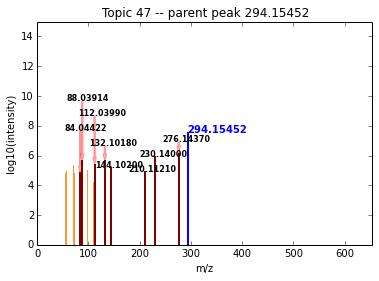

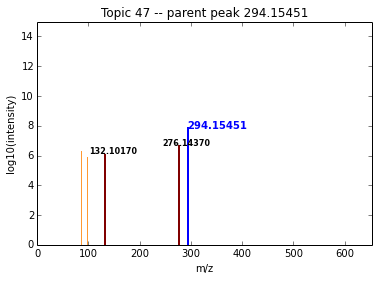

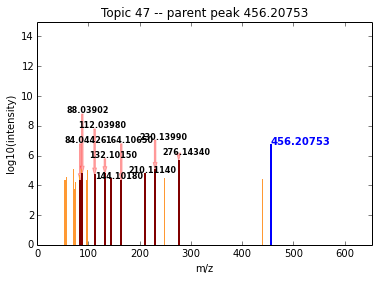

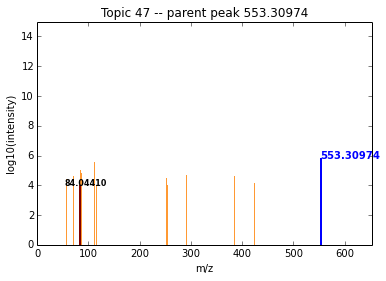

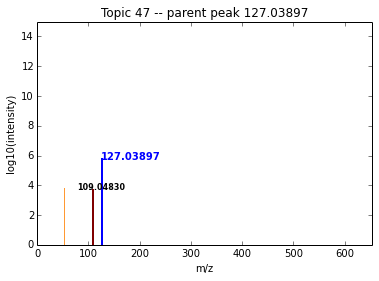

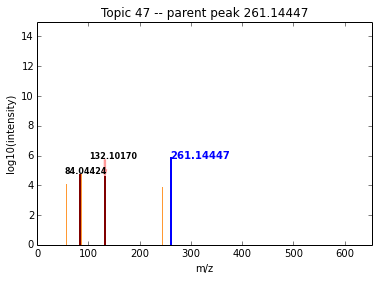

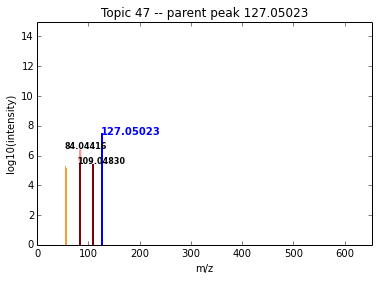

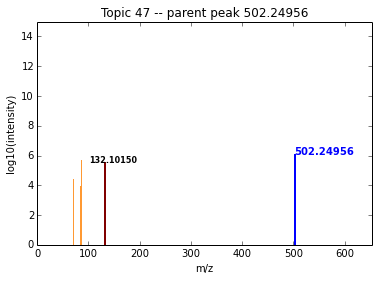

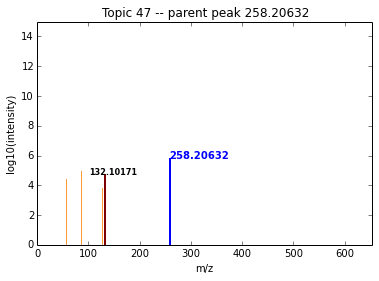

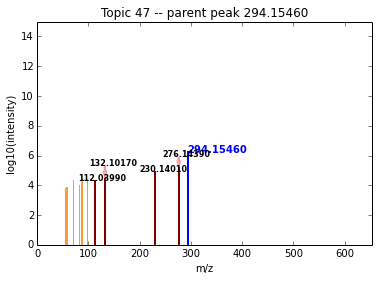

Topic 48

Parent peaks

     peakID	mz		rt		int		prob
1    12288	116.07059	876.985		1.410e+07	0.938
2    12290	116.07060	619.436		1.488e+07	0.937
3    5883 	341.06339	460.808		1.647e+06	0.912
4    5831 	325.08943	460.808		8.356e+05	0.909
5    10863	299.16084	955.415		3.168e+05	0.908
6    5620 	366.09500	444.820		1.363e+06	0.908
7    5093 	435.12642	310.690		2.610e+06	0.904
8    5147 	248.10052	417.639		3.197e+06	0.902
9    3031 	412.12694	289.342		8.161e+05	0.902
10   3761 	158.12879	187.957		7.088e+05	0.531

Fragments

1    fragment_70.06514 (0.996)
 peakID  MSnParentPeakID  mz         rt       intensity     
 15105    3031            70.065116  288.384     8584.920898
 15762    3761            70.065081  181.964   203617.718750
 16960    5093            70.065086  315.590    11913.002930
 17015    5147            70.065113  415.269     9863.178711
 17673    5620            70.065201  453.498    16938.136719
 18022    5831            70.065029  460.550    21301.902344
 18031    5883  

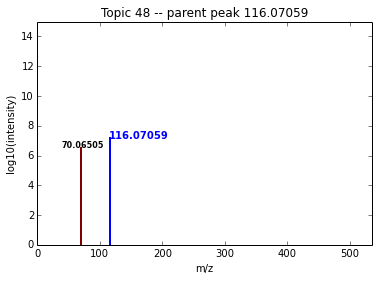

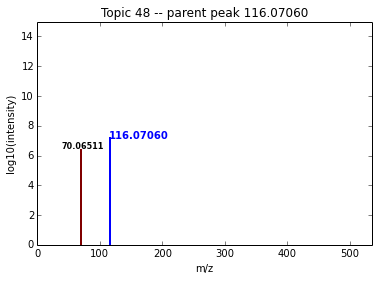

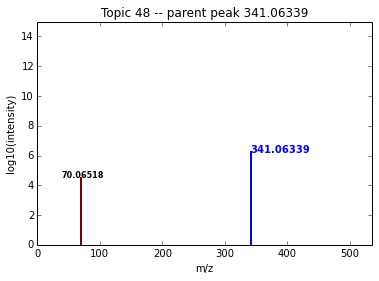

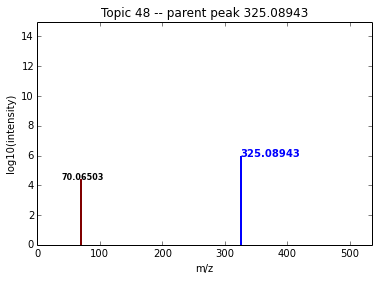

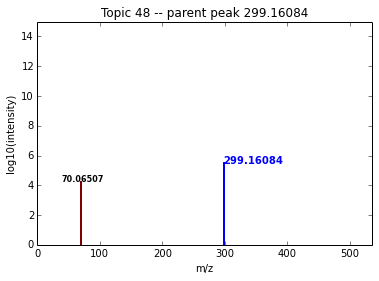

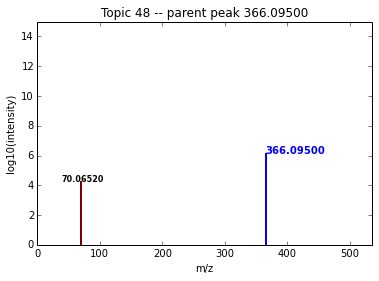

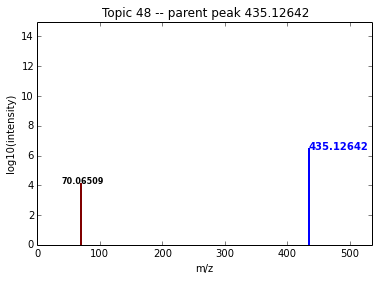

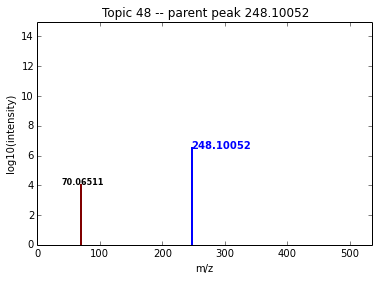

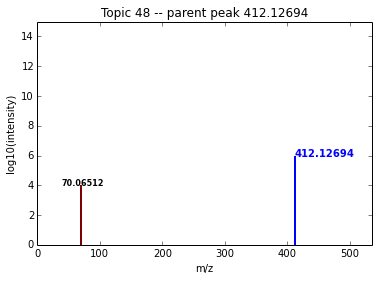

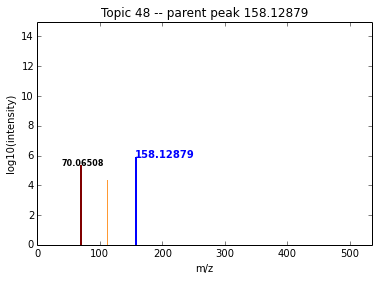

Topic 49

Parent peaks

     peakID	mz		rt		int		prob
1    11228	254.16096	1189.260		1.628e+06	0.627
2    11229	254.16097	1200.590		9.741e+05	0.613
3    8653 	238.09200	624.196		3.603e+06	0.568
4    8884 	220.08152	624.196		4.409e+06	0.567
5    6441 	370.16089	491.538		9.673e+05	0.481
6    11226	254.16094	1153.580		3.362e+06	0.479
7    8342 	268.10247	597.184		7.357e+06	0.448
8    7252 	140.06811	529.173		5.316e+06	0.287
9    5964 	260.11281	422.465		2.050e+06	0.258
10   7770 	138.05488	546.349		4.148e+08	0.242

Fragments

1    fragment_96.04414 (0.353)
 peakID  MSnParentPeakID  mz         rt       intensity     
 18167   5964             96.044022  417.242    19475.689453
 19037   6441             96.044080  489.075    20174.180000
 20578   7252             96.044090  516.493    91522.640000
 21176   7770             96.044240  551.480  1797892.000000
2    fragment_98.05999 (0.085)
 peakID  MSnParentPeakID  mz        rt        intensity 
 19047    6441            98.05998   489.075   

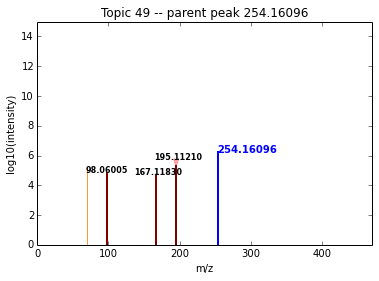

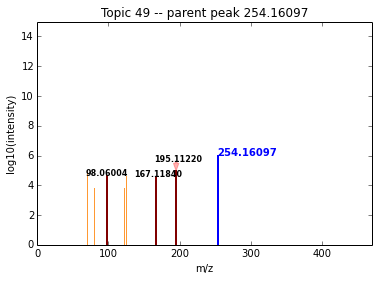

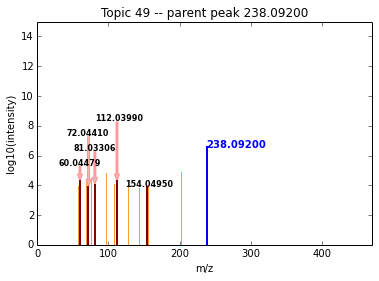

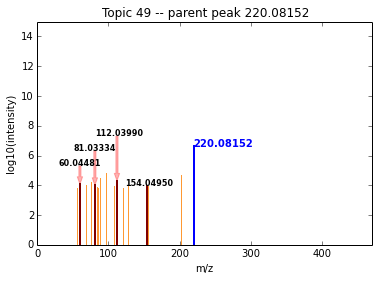

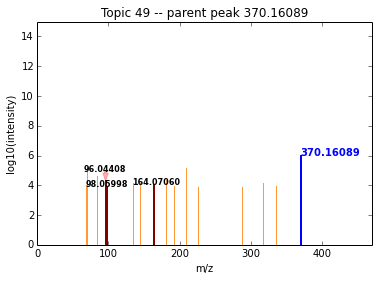

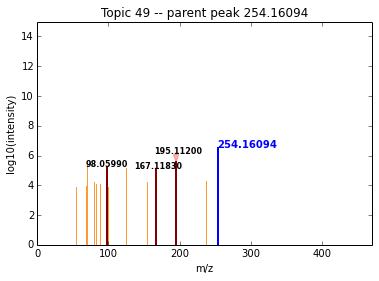

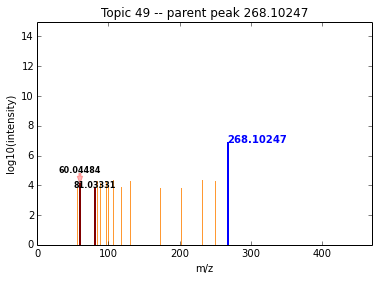

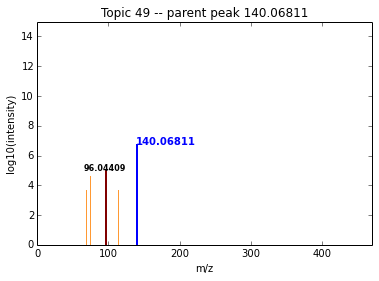

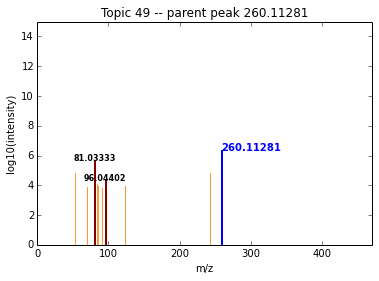

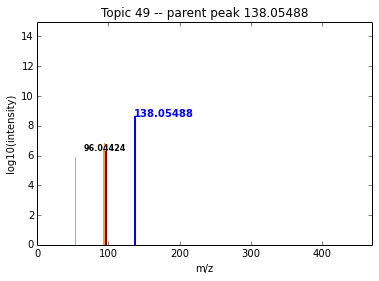

In [12]:
n_parents = 10
n_fragments = 10
plot_lda_fragments(n_parents, n_fragments, fragments_data, fragments_model, fragments_docdf, ms1, ms2)

6. Topics Membership of Fragment Peaks
------------------------------------------

For every parent peak, we visualise the topic membership of its fragment peaks.

Parent peak
 peakID  mz         rt       intensity   
 495     139.05018  187.597  266500.78125
Fragment peaks
 peakID  MSnParentPeakID  mz          rt       intensity    bin_id   
 12900   495              111.055534  186.604  40102.972656  111.0555


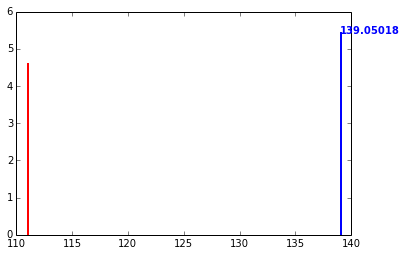

Parent peak
 peakID  mz          rt       intensity   
 534     235.912895  186.196  379896.71875
Fragment peaks
 peakID  MSnParentPeakID  mz          rt       intensity    bin_id   
 12901   534              189.881560  193.955  80397.968750  189.8815
 12902   534               64.927565  193.955  23302.875000   64.9275
 12903   534               62.929507  193.955  23054.621094  62.92941


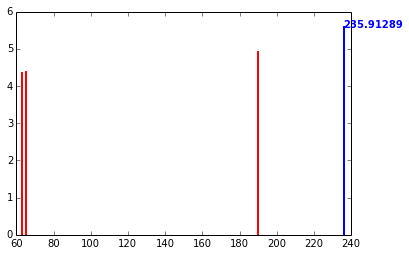

Parent peak
 peakID  mz          rt      intensity  
 590     449.235502  205.41  587774.5625
Fragment peaks
 peakID  MSnParentPeakID  mz          rt       intensity     bin_id    
 12907   590              261.113346  205.005  188174.546875  261.11335
 12908   590              205.048658  205.005  139232.296875  205.04866
 12909   590              195.029556  205.005   60385.199219   195.0292
 12910   590               81.033457  205.005   33689.078125   81.03337
 12911   590              177.055173  205.005   26901.080078  177.05473
 12912   590              109.028767  205.005   20585.994141   109.0288
 12913   590               53.038917  205.005   16738.335938   53.03889
 12914   590               91.054314  205.005   15373.551758   91.05413
 12915   590               55.018211  205.005   10838.811523   55.01824
 12916   590              103.054507  205.005    9888.945312  103.05449
 12917   590               69.070097  205.005    9306.687500   69.07013
 12918   590              2

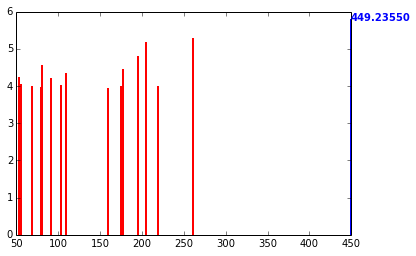

In [34]:
n_rows = ms1.shape[0]
counter = 0
for n in range(n_rows):
  
    if counter >= 3:
        break
    counter += 1
    
    # get the parent peak
    ms1_row = ms1.iloc[[n]]
    print "Parent peak"
    print ms1_row[['peakID', 'mz', 'rt', 'intensity']].to_string(index=False, justify='left')    
    parent_peakid = ms1_row[['peakID']]
    parent_mass = ms1_row[['mz']]
    parent_intensity = ms1_row[['intensity']]
    parent_peakid = np.asscalar(parent_peakid.values)
    parent_mass = np.asscalar(parent_mass.values)
    parent_intensity = np.asscalar(parent_intensity.values)

    # get the fragment peaks of this parent
    ms2_rows = ms2.loc[ms2['MSnParentPeakID']==parent_peakid]
    print "Fragment peaks"    
    print ms2_rows[['peakID', 'MSnParentPeakID', 'mz', 'rt', 'intensity', 'bin_id']].to_string(index=False, justify='left')    
    fragment_peakids = ms2_rows[['peakID']]
    fragment_masses = ms2_rows[['mz']]
    fragment_intensities = ms2_rows[['intensity']]
    
    fig = plt.figure()
    
    # plot the parent peak
    parent_fontspec = {
        'size':'10', 
        'color':'blue', 
        'weight':'bold'
    }
    parent_intensity = np.log10(parent_intensity)
    plt.plot((parent_mass, parent_mass), (0, parent_intensity), linewidth=2.0, color='b')
    x = parent_mass
    y = parent_intensity
    label = "%.5f" % parent_mass
    plt.text(x, y, label, **parent_fontspec)   
    
    # plot the fragment peaks
    fragment_fontspec = {
        'size':'8', 
        'color':'black', 
        'weight':'bold'
    }    
    fragment_masses = fragment_masses.values.ravel().tolist()
    fragment_intensities = fragment_intensities.values.ravel().tolist()
    for j in range(len(fragment_masses)):
        fragment_mass = fragment_masses[j]
        fragment_intensity = np.log10(fragment_intensities[j])
        plt.plot((fragment_mass, fragment_mass), (0, fragment_intensity), linewidth=2.0, color='r')
    
    plt.show()


7. Number of Topics
----------------------

Compute the held-out perplexity on the testing set and plot as the no. of topics is increased ..